In [1]:
from music21 import corpus, graph, stream, note, duration, pitch
import tensorflow as tf
from collections import OrderedDict
from tqdm import tqdm
from IPython import display
import numpy as np
import pickle

In [2]:
paths = corpus.getComposer('bach')

In [130]:
def get_note_to_index_dict(paths):
    
    notes = set()
    
    for path in tqdm(paths):
                
        streamObj = corpus.parse(path)
        
        for el in streamObj.recurse().notes:
            print(el.offset, el.name, el.activeSite.number, el.activeSite.offset)
            try:
                notes.add(el.name)
            except Exception:
                pass

        #gr = graph.plot.HorizontalBarPitchSpaceOffset(streamObj)
        #gr.extractData()
        
        #for note, _, _ in gr.data:
        #    notes.add(note)
    
    note_to_index = {note : ind for ind, note in enumerate(list(notes))}
    
    return note_to_index

In [131]:
note_to_index = get_note_to_index_dict(paths)

  0%|          | 0/433 [00:00<?, ?it/s]

0.0 F 0 0.0
0.0 G 1 1.0
0.5 C 1 1.0
1.0 F 1 1.0
1.5 F 1 1.0
2.0 A 1 1.0
2.5 F 1 1.0
3.0 A 1 1.0
3.5 C 1 1.0
0.0 F 2 5.0
0.25 B- 2 5.0
0.5 A 2 5.0
0.75 G 2 5.0
1.0 F 2 5.0
1.5 G 2 5.0
2.0 A 2 5.0
3.0 A 2 5.0
0.0 F 3 9.0
0.5 G 3 9.0
0.75 A 3 9.0
1.0 B- 3 9.0
1.5 C 3 9.0
1.75 B- 3 9.0
2.0 A 3 9.0
2.5 G 3 9.0
3.0 G 3 9.0
3.5 C 3 9.0
0.0 C 4 13.0
0.5 B 4 13.0
0.75 A 4 13.0
1.0 B 4 13.0
2.0 C 4 13.0
3.0 F 4 13.0
0.0 F 5 17.0
0.5 B- 5 17.0
1.0 A 5 17.0
1.5 G 5 17.0
2.0 F 5 17.0
2.5 C 5 17.0
3.0 F 5 17.0
3.5 C 5 17.0
0.0 C 6 21.0
0.5 A 6 21.0
0.75 F 6 21.0
1.0 C 6 21.0
1.5 C 6 21.0
1.75 C 6 21.0
2.0 A 6 21.0
3.0 F 6 21.0
0.0 G 7 25.0
0.5 C 7 25.0
1.0 F 7 25.0
1.5 F 7 25.0
2.0 A 7 25.0
2.5 F 7 25.0
3.0 A 7 25.0
3.5 C 7 25.0
0.0 F 8 29.0
0.25 B- 8 29.0
0.5 A 8 29.0
0.75 G 8 29.0
1.0 F 8 29.0
1.5 G 8 29.0
2.0 A 8 29.0
3.0 A 8 29.0
0.0 F 9 33.0
0.5 G 9 33.0
0.75 A 9 33.0
1.0 B- 9 33.0
1.5 C 9 33.0
1.75 B- 9 33.0
2.0 A 9 33.0
2.5 G 9 33.0
3.0 G 9 33.0
3.5 C 9 33.0
0.0 C 10 37.0
0.5 B 10 37.0
0.75 A

  0%|          | 2/433 [00:00<01:58,  3.65it/s]

1.5 C 17 65.0
2.0 B- 17 65.0
3.0 C 17 65.0
0.0 F 18 69.0
2.0 D 18 69.0
2.5 F 18 69.0
3.0 A 18 69.0
0.0 B- 19 73.0
0.5 D 19 73.0
1.0 F 19 73.0
2.0 G 19 73.0
3.0 A 19 73.0
3.5 D 19 73.0
0.0 B 20 77.0
1.0 C 20 77.0
2.0 F 20 77.0
0.0 D 1 0.0
2.0 F 1 0.0
0.0 D 2 4.0
1.0 D 2 4.0
2.0 D 2 4.0
3.0 D 2 4.0
0.0 E- 3 8.0
2.0 D 3 8.0
0.0 C 4 12.0
2.0 C 4 12.0
0.0 B- 5 16.0
0.0 D 6 20.0
2.0 F 6 20.0
0.0 C 7 24.0
1.0 C 7 24.0
2.0 C 7 24.0
3.0 G 7 24.0
0.0 B- 8 28.0
2.0 A 8 28.0
0.0 G 9 32.0
0.0 D 10 36.0
2.0 F 10 36.0
0.0 D 11 40.0
1.0 D 11 40.0
2.0 D 11 40.0
3.0 D 11 40.0
0.0 E- 12 44.0
2.0 D 12 44.0
0.0 C 13 48.0
2.0 C 13 48.0
0.0 B- 14 52.0
0.0 D 15 56.0
2.0 F 15 56.0
0.0 C 16 60.0
1.0 C 16 60.0
2.0 C 16 60.0
3.0 C 16 60.0
0.0 C 17 64.0
2.0 G 17 64.0
3.0 A 17 64.0
0.0 B- 18 68.0
2.0 A 18 68.0
0.0 G 19 72.0
0.0 G 20 76.0
0.0 G 21 80.0
0.0 G 22 84.0
0.0 G 1 0.0
2.0 F 1 0.0
0.0 F 2 4.0
1.0 F# 2 4.0
2.0 G 2 4.0
3.0 A 2 4.0
0.0 G 3 8.0
1.0 F 3 8.0
3.0 G 3 8.0
0.0 G 4 12.0
2.0 F 4 12.0
0.0 F 5 16.0
0.0 

  1%|          | 3/433 [00:00<01:40,  4.27it/s]

0.0 A 0 0.0
0.0 A 1 1.0
1.0 F 1 1.0
2.0 G 1 1.0
3.0 A 1 1.0
0.0 F 2 5.0
1.0 E 2 5.0
2.0 D 2 5.0
3.0 A 2 5.0
0.0 A 3 9.0
1.0 G 3 9.0
2.0 C 3 9.0
3.0 A 3 9.0
0.0 F 4 13.0
1.0 G 4 13.0
2.0 A 4 13.0
0.0 A 4 16.0
0.0 C 5 17.0
1.0 D 5 17.0
1.5 E 5 17.0
2.0 F 5 17.0
3.0 E 5 17.0
0.0 D 6 21.0
1.0 C# 6 21.0
2.0 D 6 21.0
3.0 D 6 21.0
0.0 E 7 25.0
1.0 D 7 25.0
2.0 C 7 25.0
3.0 B 7 25.0
0.0 A 8 29.0
1.0 B 8 29.0
2.0 A 8 29.0
0.0 D 8 32.0
0.0 C 9 33.0
1.0 B 9 33.0
2.0 C 9 33.0
3.0 A 9 33.0
0.0 A 10 37.0
1.0 G 10 37.0
2.0 F 10 37.0
3.0 A 10 37.0
0.0 B- 11 41.0
1.0 A 11 41.0
1.5 G 11 41.0
2.0 F 11 41.0
3.0 G 11 41.0
0.0 F 12 45.0
1.0 E 12 45.0
2.0 D 12 45.0
0.0 F 0 0.0
0.0 E 1 1.0
1.0 D 1 1.0
2.0 D 1 1.0
3.0 D 1 1.0
0.0 D 2 5.0
1.0 C# 2 5.0
2.0 A 2 5.0
3.0 F 2 5.0
0.0 F 3 9.0
1.0 G 3 9.0
1.5 F 3 9.0
2.0 E 3 9.0
3.0 F 3 9.0
0.0 D 4 13.0
1.0 D 4 13.0
2.0 C# 4 13.0
0.0 D 4 16.0
0.0 E 5 17.0
1.0 G 5 17.0
2.0 A 5 17.0
3.0 G 5 17.0
0.0 F 6 21.0
0.5 G 6 21.0
1.0 A 6 21.0
2.0 A 6 21.0
3.0 G 6 21.0
0.0 G 7 25

  1%|          | 5/433 [00:00<01:20,  5.30it/s]

 11 41.0
2.5 B- 11 41.0
3.0 A- 11 41.0
0.0 G 12 45.0
1.0 G 12 45.0
1.5 F 12 45.0
2.0 E 12 45.0
0.0 C 0 0.0
0.0 B 1 1.0
1.0 C 1 1.0
2.0 A- 1 1.0
3.0 E- 1 1.0
3.5 F 1 1.0
0.0 G 2 5.0
1.0 G 2 5.0
2.0 C 2 5.0
3.0 C 2 5.0
0.0 G 3 9.0
0.5 A- 3 9.0
1.0 B- 3 9.0
2.0 D 3 9.0
3.0 E- 3 9.0
0.0 A- 4 13.0
1.0 A- 4 13.0
2.0 G 4 13.0
0.0 C 4 16.0
0.0 G 5 17.0
1.0 F 5 17.0
2.0 E- 5 17.0
3.0 F 5 17.0
3.5 G 5 17.0
0.0 A- 6 21.0
1.0 G 6 21.0
2.0 C 6 21.0
3.0 F 6 21.0
0.0 B- 7 25.0
1.0 A 7 25.0
2.0 G 7 25.0
3.0 C 7 25.0
3.5 D 7 25.0
0.0 E- 8 29.0
1.0 D 8 29.0
2.0 G 8 29.0
0.0 F 8 32.0
0.5 E- 8 32.0
0.0 D 9 33.0
1.0 C 9 33.0
2.0 B- 9 33.0
3.0 C 9 33.0
3.5 B- 9 33.0
0.0 A- 10 37.0
1.0 B- 10 37.0
2.0 E- 10 37.0
3.0 E 10 37.0
0.0 F 11 41.0
1.0 G 11 41.0
2.0 A- 11 41.0
2.5 G 11 41.0
3.0 F 11 41.0
0.0 G 12 45.0
1.0 G 12 45.0
2.0 C 12 45.0
0.0 F# 0 0.0
0.5 G 0 0.0
0.0 A 1 1.0
1.0 B 1 1.0
2.0 A 1 1.0
3.0 D 1 1.0
0.0 D 2 5.0
1.0 C# 2 5.0
2.0 D 2 5.0
3.0 D 2 5.0
0.0 C# 3 9.0
1.0 B 3 9.0
2.0 E 3 9.0
3.0 D 3 9.0
3.5 

  1%|▏         | 6/433 [00:01<01:14,  5.76it/s]

0.0 A 0 0.0
0.5 B 0 0.0
0.0 C# 1 1.0
1.0 D 1 1.0
2.0 E 1 1.0
3.0 D 1 1.0
0.0 C# 2 5.0
1.0 B 2 5.0
2.0 C# 2 5.0
3.0 C# 2 5.0
0.0 C# 3 9.0
1.0 B 3 9.0
1.5 C# 3 9.0
2.0 D 3 9.0
2.5 C# 3 9.0
3.0 B 3 9.0
0.0 A 4 13.0
1.0 B 4 13.0
2.0 A 4 13.0
0.0 A 4 16.0
0.0 B 5 17.0
1.0 C# 5 17.0
2.0 D 5 17.0
3.0 C# 5 17.0
0.0 B 6 21.0
1.0 C# 6 21.0
2.0 B 6 21.0
3.0 B 6 21.0
0.0 C# 7 25.0
1.0 D 7 25.0
2.0 E 7 25.0
3.0 D 7 25.0
0.0 C# 8 29.0
1.0 B 8 29.0
2.0 C# 8 29.0
3.0 C# 8 29.0
0.0 C# 9 33.0
1.0 B 9 33.0
1.5 C# 9 33.0
2.0 D 9 33.0
2.5 C# 9 33.0
3.0 B 9 33.0
0.0 A 10 37.0
0.5 F# 10 37.0
1.0 G# 10 37.0
2.0 A 10 37.0
0.0 E 0 0.0
0.0 A 1 1.0
1.0 A 1 1.0
2.0 G# 1 1.0
3.0 F# 1 1.0
3.5 G# 1 1.0
0.0 A 2 5.0
1.0 G# 2 5.0
2.0 A 2 5.0
3.0 E 2 5.0
0.0 F# 3 9.0
1.0 F# 3 9.0
1.5 E 3 9.0
2.0 D 3 9.0
3.0 E 3 9.0
0.0 E 4 13.0
0.5 A 4 13.0
1.5 G# 4 13.0
2.0 E 4 13.0
0.0 E 4 16.0
0.0 E 5 17.0
1.0 E 5 17.0
2.0 D 5 17.0
2.5 E 5 17.0
3.0 F# 5 17.0
0.0 F# 6 21.0
0.5 E 6 21.0
1.0 E 6 21.0
1.5 D 6 21.0
1.75 C# 6 21.0
2.0 D 6 2

  2%|▏         | 7/433 [00:01<01:32,  4.58it/s]

 F# 9 33.0
0.0 B 9 34.0
0.5 A 9 34.0
1.0 G# 9 34.0
1.5 E 9 34.0
2.0 A 9 34.0
2.5 G 9 34.0
0.0 F# 10 37.0
0.5 E 10 37.0
1.0 D 10 37.0
1.5 C# 10 37.0
2.0 B 10 37.0
2.5 A# 10 37.0
3.0 B 10 37.0
0.0 F# 11 41.0
1.0 A# 11 41.0
2.0 B 11 41.0
2.5 C# 11 41.0
3.0 D 11 41.0
3.5 D# 11 41.0
0.0 E 12 45.0
0.5 F# 12 45.0
1.0 G 12 45.0
1.5 G# 12 45.0
2.0 A 12 45.0
2.5 A# 12 45.0
3.0 B 12 45.0
3.5 G 12 45.0
0.0 E 13 49.0
0.5 C# 13 49.0
1.0 F# 13 49.0
1.5 F# 13 49.0
2.0 B 13 49.0
0.0 D 1 0.0
1.0 D 1 0.0
2.0 E 1 0.0
0.0 F# 2 3.0
1.5 G# 2 3.0
2.0 A 2 3.0
0.0 A 3 6.0
2.0 G# 3 6.0
0.0 A 4 9.0
2.0 F# 4 9.0
0.0 G 5 12.0
2.0 F# 5 12.0
0.0 E 6 15.0
2.0 D 6 15.0
0.0 E 7 18.0
0.0 D 8 21.0
0.0 E 9 24.0
1.0 E 9 24.0
2.0 F# 9 24.0
0.0 G 10 27.0
2.0 G 10 27.0
0.0 F# 11 30.0
1.5 E 11 30.0
2.0 F# 11 30.0
0.0 E 12 33.0
0.0 F# 13 36.0
1.0 F# 13 36.0
2.0 F# 13 36.0
0.0 G 14 39.0
1.5 A 14 39.0
2.0 B 14 39.0
0.0 B 15 42.0
2.0 A# 15 42.0
0.0 B 16 45.0
0.0 C# 16 47.0
0.0 D 17 48.0
1.0 F# 17 48.0
0.0 G 18 51.0
2.0 F# 18 51.0
0

  2%|▏         | 9/433 [00:01<01:28,  4.78it/s]

0.0 B 0 0.0
0.5 C# 0 0.0
0.0 D 1 1.0
1.0 C# 1 1.0
2.0 B 1 1.0
3.0 B 1 1.0
3.5 C# 1 1.0
0.0 D 2 5.0
1.0 C# 2 5.0
2.0 B 2 5.0
3.0 F# 2 5.0
0.0 E 3 9.0
1.0 D 3 9.0
2.0 C# 3 9.0
3.0 C# 3 9.0
0.0 D 4 13.0
1.0 D 4 13.0
2.0 E 4 13.0
3.0 E 4 13.0
0.0 F# 5 17.0
1.0 F# 5 17.0
2.0 E 5 17.0
3.0 D 5 17.0
0.0 C# 6 21.0
2.0 B 6 21.0
3.0 F# 6 21.0
0.0 E 7 25.0
1.0 D 7 25.0
2.0 C# 7 25.0
3.0 F# 7 25.0
0.0 E 8 29.0
1.0 D 8 29.0
2.0 C# 8 29.0
3.0 C# 8 29.0
0.0 D 9 33.0
1.0 D 9 33.0
2.0 E 9 33.0
3.0 E 9 33.0
0.0 F# 10 37.0
1.0 F# 10 37.0
2.0 E 10 37.0
3.0 D 10 37.0
0.0 C# 11 41.0
2.0 B 11 41.0
0.0 F# 0 0.0
0.0 B 1 1.0
1.0 A# 1 1.0
2.0 F# 1 1.0
3.0 F# 1 1.0
0.0 B 2 5.0
1.0 A# 2 5.0
2.0 F# 2 5.0
3.0 F# 2 5.0
3.5 G 2 5.0
0.0 A 3 9.0
1.0 F# 3 9.0
2.0 F# 3 9.0
3.0 F# 3 9.0
0.0 F# 4 13.0
1.0 F# 4 13.0
2.0 B 4 13.0
3.0 A 4 13.0
0.0 A 5 17.0
1.0 A 5 17.0
1.5 B 5 17.0
2.0 C# 5 17.0
3.0 F# 5 17.0
0.0 F# 6 21.0
1.5 E 6 21.0
2.0 D 6 21.0
3.0 B 6 21.0
0.0 B 7 25.0
0.5 A# 7 25.0
1.0 B 7 25.0
2.0 A# 7 25.0
3.0 B 7 25.0


  2%|▏         | 10/433 [00:02<01:41,  4.18it/s]

7 25.0
1.0 G 7 25.0
2.0 C 7 25.0
3.0 C 7 25.0
0.0 G 8 29.0
1.0 D 8 29.0
1.5 E 8 29.0
2.0 F# 8 29.0
2.5 G# 8 29.0
3.0 A 8 29.0
0.0 E 9 33.0
0.5 D 9 33.0
1.0 C 9 33.0
1.5 D 9 33.0
2.0 E 9 33.0
0.0 A 10 37.0
3.0 A 10 37.0
3.5 G 10 37.0
0.0 F# 11 41.0
0.5 E 11 41.0
1.0 F# 11 41.0
1.5 D 11 41.0
2.0 G 11 41.0
2.5 A 11 41.0
3.0 G 11 41.0
3.5 F# 11 41.0
0.0 E 12 45.0
0.5 F# 12 45.0
1.0 E 12 45.0
1.5 D 12 45.0
2.0 C 12 45.0
2.5 A 12 45.0
3.0 D 12 45.0
0.0 G 13 49.0
3.0 C 13 49.0
0.0 C 14 53.0
1.0 B 14 53.0
2.0 A 14 53.0
3.0 G 14 53.0
0.0 F 15 57.0
0.5 E 15 57.0
1.0 F 15 57.0
2.0 E 15 57.0
3.0 A 15 57.0
0.0 E 16 61.0
1.0 F 16 61.0
2.0 C 16 61.0
2.5 D 16 61.0
3.0 E 16 61.0
3.5 F 16 61.0
0.0 G 17 65.0
1.0 G 17 65.0
2.0 C 17 65.0
3.0 C 17 65.0
0.0 G 18 69.0
1.0 D 18 69.0
1.5 E 18 69.0
2.0 F# 18 69.0
2.5 G# 18 69.0
3.0 A 18 69.0
0.0 E 19 73.0
0.5 D 19 73.0
1.0 C 19 73.0
1.5 D 19 73.0
2.0 E 19 73.0
0.0 A 20 77.0
0.0 G 0 0.0
0.5 A 0 0.0
0.0 B 1 1.0
1.0 C 1 1.0
2.0 D 1 1.0
3.0 C 1 1.0
0.0 B 2 5.0
1.0 A

  3%|▎         | 11/433 [00:02<01:40,  4.18it/s]

 E 6 21.0
3.0 F# 6 21.0
0.0 G 7 25.0
1.0 F 7 25.0
2.0 E 7 25.0
3.0 E 7 25.0
3.5 F# 7 25.0
0.0 G 8 29.0
1.5 F# 8 29.0
1.75 E 8 29.0
2.0 D# 8 29.0
3.0 E 8 29.0
0.0 D 9 33.0
0.5 E 9 33.0
1.0 F# 9 33.0
1.5 G 9 33.0
2.0 A 9 33.0
2.5 G 9 33.0
3.5 F# 9 33.0
0.0 E 10 37.0
0.5 D 10 37.0
1.0 E 10 37.0
1.5 D 10 37.0
2.0 D 10 37.0
0.0 B 0 0.0
0.5 C 0 0.0
0.0 D 1 1.0
1.0 E 1 1.0
2.0 A 1 1.0
3.0 A 1 1.0
0.0 D 2 5.0
1.0 D 2 5.0
2.0 D 2 5.0
3.0 E 2 5.0
0.0 D 3 9.0
1.0 D 3 9.0
2.0 E 3 9.0
2.5 D 3 9.0
3.0 D 3 9.0
3.5 C 3 9.0
0.0 B 4 13.0
1.0 E 4 13.0
1.5 D 4 13.0
1.75 C 4 13.0
2.0 B 4 13.0
0.0 B 4 16.0
0.0 A 5 17.0
1.0 G 5 17.0
2.0 G 5 17.0
3.0 G# 5 17.0
0.0 A 6 21.0
1.0 D 6 21.0
2.0 C 6 21.0
3.0 A 6 21.0
0.0 D 7 25.0
1.0 C 7 25.0
2.0 B 7 25.0
3.0 C 7 25.0
3.5 D 7 25.0
0.0 E 8 29.0
1.0 E 8 29.0
2.0 F# 8 29.0
3.0 G 8 29.0
3.5 A 8 29.0
0.0 B 9 33.0
0.5 C 9 33.0
1.0 D 9 33.0
1.5 G 9 33.0
2.0 F# 9 33.0
2.5 G 9 33.0
2.75 F# 9 33.0
3.0 E 9 33.0
3.5 F# 9 33.0
0.0 G 10 37.0
1.5 F# 10 37.0
2.0 B 10 37.0
0.0 G 0 

  3%|▎         | 13/433 [00:02<01:21,  5.16it/s]

 25.0
2.5 B 7 25.0
3.0 C 7 25.0
3.5 D 7 25.0
0.0 E 8 29.0
0.5 D 8 29.0
1.0 C 8 29.0
1.5 D 8 29.0
2.0 G 8 29.0
3.0 G 8 29.0
0.0 F# 9 33.0
1.0 F 9 33.0
2.0 E 9 33.0
3.0 D 9 33.0
0.0 C 10 37.0
0.5 F 10 37.0
1.0 D 10 37.0
1.5 E 10 37.0
2.0 A 10 37.0
3.0 D 10 37.0
3.5 C 10 37.0
0.0 B 11 41.0
1.0 A 11 41.0
2.0 G# 11 41.0
3.0 A 11 41.0
0.0 E 12 45.0
0.5 D 12 45.0
1.0 C 12 45.0
2.0 B 12 45.0
3.0 E 12 45.0
3.5 F# 12 45.0
0.0 G 13 49.0
1.0 F# 13 49.0
1.5 E 13 49.0
2.0 D# 13 49.0
2.5 E 13 49.0
3.0 C# 13 49.0
3.5 D# 13 49.0
0.0 E 14 53.0
0.5 B 14 53.0
1.0 C 14 53.0
1.5 D 14 53.0
2.0 G 14 53.0
0.0 B 0 0.0
0.0 B 1 1.0
1.0 A# 1 1.0
2.0 B 1 1.0
3.0 C# 1 1.0
0.0 D 2 5.0
1.0 C# 2 5.0
2.0 B 2 5.0
3.0 B 2 5.0
0.0 C# 3 9.0
1.0 C# 3 9.0
2.0 F# 3 9.0
3.0 E 3 9.0
0.0 D 4 13.0
2.0 C# 4 13.0
0.0 F# 4 16.0
0.0 E 5 17.0
1.0 D 5 17.0
2.0 C# 5 17.0
2.5 D 5 17.0
3.0 E 5 17.0
0.0 D 6 21.0
1.0 C# 6 21.0
2.0 B 6 21.0
3.0 D 6 21.0
0.0 C# 7 25.0
1.0 B 7 25.0
2.0 A 7 25.0
2.5 G# 7 25.0
3.0 F# 7 25.0
3.5 G# 7 25.0
0.0 A 8 

  3%|▎         | 14/433 [00:02<01:24,  4.96it/s]

0.0 B- 0 0.0
0.0 B- 1 1.0
1.0 G 1 1.0
1.5 A 1 1.0
2.0 B- 1 1.0
2.5 C 1 1.0
3.0 D 1 1.0
0.0 C 2 5.0
1.0 C 2 5.0
2.0 B- 2 5.0
3.0 B- 2 5.0
0.0 A 3 9.0
1.0 G 3 9.0
1.5 A 3 9.0
2.0 B- 3 9.0
3.0 C 3 9.0
3.5 B- 3 9.0
0.0 A 4 13.0
2.0 G 4 13.0
0.0 C 4 16.0
0.0 D 5 17.0
1.0 D 5 17.0
2.0 A 5 17.0
2.5 B- 5 17.0
3.0 C 5 17.0
0.0 B- 6 21.0
1.0 B- 6 21.0
2.0 A 6 21.0
3.0 B- 6 21.0
0.0 C 7 25.0
1.0 G 7 25.0
1.5 A 7 25.0
2.0 B- 7 25.0
3.0 A 7 25.0
0.0 G 8 29.0
1.0 G 8 29.0
2.0 F 8 29.0
3.0 B- 8 29.0
0.0 A 9 33.0
1.0 G 9 33.0
1.5 A 9 33.0
2.0 B- 9 33.0
3.0 C 9 33.0
3.5 B- 9 33.0
0.0 A 10 37.0
2.0 G 10 37.0
0.0 G 0 0.0
0.0 F 1 1.0
1.0 E- 1 1.0
2.0 D 1 1.0
3.0 D 1 1.0
0.0 E- 2 5.0
1.0 E- 2 5.0
1.25 D 2 5.0
1.5 E- 2 5.0
2.0 D 2 5.0
3.0 D 2 5.0
0.0 D 3 9.0
0.5 C 3 9.0
1.0 B- 3 9.0
1.5 A 3 9.0
2.0 G 3 9.0
3.0 G 3 9.0
3.5 F 3 9.0
0.0 E- 4 13.0
1.0 D 4 13.0
1.5 C 4 13.0
2.0 B- 4 13.0
0.0 F 4 16.0
0.0 F 5 17.0
1.0 F 5 17.0
2.0 C 5 17.0
3.5 A 5 17.0
0.0 A 6 21.0
0.5 G 6 21.0
0.75 F# 6 21.0
1.0 G 6 21.0
2.0 F# 

  3%|▎         | 15/433 [00:02<01:14,  5.62it/s]


1.5 C 4 12.0
2.0 B 4 12.0
0.0 D 5 16.0
1.0 D 5 16.0
2.0 D 5 16.0
0.0 B 6 20.0
0.5 A 6 20.0
1.0 G# 6 20.0
1.5 B 6 20.0
2.0 A 6 20.0
0.0 D 7 24.0
0.5 E 7 24.0
1.0 F# 7 24.0
2.0 F# 7 24.0
2.5 E 7 24.0
3.0 D 7 24.0
3.5 C# 7 24.0
0.0 B 8 28.0
1.0 A 8 28.0
2.0 A 8 28.0
0.0 C 9 32.0
1.0 D 9 32.0
2.0 D 9 32.0
3.0 D 9 32.0
0.0 E 10 36.0
1.0 D 10 36.0
1.5 C 10 36.0
2.0 B 10 36.0
0.0 G 1 0.0
0.5 F# 1 0.0
1.0 E 1 0.0
1.5 G 1 0.0
2.0 F# 1 0.0
2.5 E 1 0.0
3.0 D 1 0.0
3.5 F# 1 0.0
0.0 E 2 4.0
0.5 D 2 4.0
1.0 C 2 4.0
1.5 D 2 4.0
2.0 G 2 4.0
0.0 C 3 8.0
0.5 B 3 8.0
1.0 A 3 8.0
1.5 C 3 8.0
2.0 B 3 8.0
2.5 A 3 8.0
3.0 G 3 8.0
3.5 B 3 8.0
0.0 C 4 12.0
0.5 A 4 12.0
1.0 D 4 12.0
2.0 G 4 12.0
0.0 F# 5 16.0
0.5 E 5 16.0
1.0 D 5 16.0
1.5 F# 5 16.0
2.0 G 5 16.0
0.0 G# 6 20.0
0.5 F# 6 20.0
1.0 E 6 20.0
1.5 G# 6 20.0
2.0 A 6 20.0
0.0 F# 7 24.0
0.5 E 7 24.0
1.0 D 7 24.0
1.5 F# 7 24.0
2.0 G 7 24.0
2.5 A 7 24.0
3.0 B 7 24.0
3.5 A 7 24.0
0.0 G 8 28.0
0.5 E 8 28.0
1.0 A 8 28.0
2.0 D 8 28.0
0.0 A 9 32.0
0.5 B 9 32.0
1

  4%|▎         | 16/433 [00:03<01:27,  4.79it/s]

 G# 9 33.0
0.5 A 9 33.0
1.0 B 9 33.0
2.0 B 9 33.0
2.5 A 9 33.0
3.0 A 9 33.0
3.5 G# 9 33.0
0.0 F# 10 37.0
0.5 E# 10 37.0
1.0 F# 10 37.0
2.0 E# 10 37.0
3.0 E# 10 37.0
0.0 F# 11 41.0
1.0 E 11 41.0
1.5 D 11 41.0
2.0 C# 11 41.0
2.5 D 11 41.0
3.0 E 11 41.0
0.0 F# 12 45.0
0.5 G# 12 45.0
1.0 A 12 45.0
2.0 A 12 45.0
3.0 G# 12 45.0
0.0 E 13 49.0
0.0 E 0 0.0
0.0 E 1 1.0
0.5 D 1 1.0
1.0 D 1 1.0
2.0 C# 1 1.0
3.0 C# 1 1.0
0.0 B 2 5.0
0.5 A 2 5.0
1.0 E 2 5.0
2.0 E 2 5.0
3.0 B 2 5.0
3.5 C# 2 5.0
0.0 D 3 9.0
1.0 E 3 9.0
2.0 F# 3 9.0
3.0 E 3 9.0
0.0 E 4 13.0
3.0 E 4 13.0
0.0 E 5 17.0
0.5 D 5 17.0
1.0 D 5 17.0
2.0 C# 5 17.0
3.0 C# 5 17.0
0.0 B 6 21.0
0.5 A 6 21.0
1.0 E 6 21.0
2.0 E 6 21.0
3.0 B 6 21.0
3.5 C# 6 21.0
0.0 D 7 25.0
1.0 E 7 25.0
2.0 F# 7 25.0
3.0 E 7 25.0
0.0 E 8 29.0
3.0 F# 8 29.0
0.0 E 9 33.0
1.0 E 9 33.0
2.0 E 9 33.0
3.0 D 9 33.0
0.0 C# 10 37.0
1.0 D# 10 37.0
2.0 G# 10 37.0
3.0 C# 10 37.0
0.0 C# 11 41.0
1.0 B 11 41.0
2.0 A 11 41.0
3.0 B 11 41.0
0.0 A 12 45.0
0.5 B 12 45.0
1.0 C# 12 45.0
1.

  4%|▍         | 18/433 [00:03<01:10,  5.86it/s]

 D 5 17.0
2.0 A 5 17.0
3.0 A# 5 17.0
0.0 B 6 21.0
0.5 G 6 21.0
1.0 A 6 21.0
2.0 D 6 21.0
3.0 G 6 21.0
3.5 F# 6 21.0
0.0 E 7 25.0
0.5 D 7 25.0
1.0 C 7 25.0
1.5 B 7 25.0
2.0 C 7 25.0
2.5 D 7 25.0
3.0 E 7 25.0
0.0 F# 8 29.0
0.5 G# 8 29.0
1.0 A 8 29.0
2.0 E 8 29.0
3.0 G 8 29.0
0.0 F# 9 33.0
1.0 E 9 33.0
1.5 F# 9 33.0
2.0 G 9 33.0
3.0 C 9 33.0
0.0 C# 10 37.0
1.0 D 10 37.0
2.0 G 10 37.0
0.0 G 0 0.0
0.0 A 1 2.0
2.0 C 1 2.0
0.0 B 2 6.0
2.0 A 2 6.0
0.0 C 3 10.0
2.0 A 3 10.0
0.0 G 4 14.0
2.0 D 4 14.0
0.0 D 5 18.0
2.0 D 5 18.0
0.0 E 6 22.0
3.0 C 6 22.0
0.0 D 7 26.0
2.0 C 7 26.0
0.0 B 8 30.0
2.0 C 9 34.0
0.0 C 10 38.0
2.0 C 10 38.0
0.0 B 11 42.0
2.0 A 11 42.0
0.0 C 12 46.0
2.0 A 12 46.0
3.5 G 12 46.0
0.0 G 13 50.0
2.0 D 13 50.0
0.0 D 14 54.0
2.0 D 14 54.0
0.0 E 15 58.0
3.0 C 15 58.0
0.0 D 16 62.0
2.0 C 16 62.0
3.5 B 16 62.0
0.0 B 17 66.0
0.0 E 18 70.0
1.5 D 18 70.0
2.0 C 18 70.0
3.5 B 18 70.0
0.0 A 19 74.0
2.0 B 19 74.0
0.0 C 20 78.0
0.0 E 0 0.0
0.0 E 1 2.0
1.0 D 1 2.0
2.0 D 1 2.0
0.0 D 2 6.0
2.0 

  4%|▍         | 19/433 [00:04<02:45,  2.50it/s]

0.0 B- 0 0.0
0.0 F 1 1.0
1.5 E- 1 1.0
2.0 D 1 1.0
3.0 G 1 1.0
0.0 F 2 5.0
1.0 A 2 5.0
2.0 B- 2 5.0
3.0 B- 2 5.0
0.0 F 3 9.0
1.0 B- 3 9.0
2.0 B- 3 9.0
2.5 A 3 9.0
3.0 B- 3 9.0
3.5 C 3 9.0
0.0 F 4 13.0
1.0 E- 4 13.0
2.0 D 4 13.0
3.0 B- 4 13.0
0.0 F 5 17.0
1.5 E- 5 17.0
2.0 D 5 17.0
3.0 G 5 17.0
0.0 F 6 21.0
1.0 A 6 21.0
2.0 B- 6 21.0
3.0 B- 6 21.0
0.0 F 7 25.0
1.0 B- 7 25.0
2.0 B- 7 25.0
2.5 A 7 25.0
3.0 B- 7 25.0
3.5 C 7 25.0
0.0 F 8 29.0
1.0 E- 8 29.0
2.0 D 8 29.0
3.0 B- 8 29.0
3.5 A- 8 29.0
0.0 G 9 33.0
1.0 G 9 33.0
2.0 A 9 33.0
2.5 B- 9 33.0
3.0 A 9 33.0
3.5 G 9 33.0
0.0 F 10 37.0
1.0 F 10 37.0
2.0 G 10 37.0
2.5 A 10 37.0
3.0 B- 10 37.0
3.5 D 10 37.0
0.0 E 11 41.0
1.0 F 11 41.0
1.5 G 11 41.0
2.0 A 11 41.0
2.5 F 11 41.0
3.0 D 11 41.0
3.5 G 11 41.0
0.0 C 12 45.0
0.5 D 12 45.0
1.0 C 12 45.0
1.5 B- 12 45.0
2.0 A 12 45.0
3.0 B- 12 45.0
0.0 E- 13 49.0
1.0 B- 13 49.0
2.0 A 13 49.0
2.5 G 13 49.0
3.0 F 13 49.0
0.0 F 14 53.0
0.5 G 14 53.0
0.75 A 14 53.0
1.0 A 14 53.0
1.75 B- 14 53.0
2.0 B- 14 

  5%|▍         | 20/433 [00:04<02:15,  3.06it/s]

F# 13 49.0
3.0 E 13 49.0
0.0 G 14 53.0
1.0 E 14 53.0
2.0 D 14 53.0
3.0 A 14 53.0
0.0 A 15 57.0
1.0 A 15 57.0
2.0 B 15 57.0
3.0 G 15 57.0
0.0 A 16 61.0
1.0 G 16 61.0
2.0 F# 16 61.0
0.0 F# 0 0.0
0.0 F# 1 1.0
1.0 G# 1 1.0
2.0 C# 1 1.0
3.0 A 1 1.0
0.0 E 2 5.0
0.5 F# 2 5.0
1.0 G 2 5.0
2.0 F# 2 5.0
3.0 F# 2 5.0
0.0 G 3 9.0
1.0 F# 3 9.0
1.5 E 3 9.0
2.0 D 3 9.0
2.5 E 3 9.0
3.0 F# 3 9.0
0.0 F# 4 13.0
1.0 E 4 13.0
2.0 D 4 13.0
3.0 D 4 13.0
0.0 E 5 17.0
1.0 C# 5 17.0
2.0 D 5 17.0
3.0 E 5 17.0
0.0 D 6 21.0
1.0 D 6 21.0
2.0 E 6 21.0
3.0 E 6 21.0
0.0 F# 7 25.0
1.0 F# 7 25.0
2.0 G 7 25.0
2.5 F# 7 25.0
3.0 E 7 25.0
0.0 F# 8 29.0
0.5 D# 8 29.0
1.0 E 8 29.0
2.0 D# 8 29.0
3.0 B 8 29.0
0.0 C# 9 33.0
1.0 B 9 33.0
1.5 C# 9 33.0
2.0 D 9 33.0
3.0 C# 9 33.0
3.5 D 9 33.0
0.0 E 10 37.0
0.5 D 10 37.0
1.0 C# 10 37.0
2.0 A 10 37.0
3.0 E 10 37.0
0.0 F# 11 41.0
1.0 F# 11 41.0
2.0 G 11 41.0
3.0 B 11 41.0
0.0 F# 12 45.0
1.0 E 12 45.0
2.0 D# 12 45.0
3.0 E 12 45.0
0.0 D 13 49.0
1.0 E 13 49.0
2.0 D 13 49.0
3.0 C# 13 49.0


  5%|▍         | 21/433 [00:05<02:25,  2.84it/s]

 D 17 48.0
0.0 A 18 51.0
1.0 A 18 51.0
2.0 E 18 51.0
0.0 D 19 54.0
1.0 G 19 54.0
2.0 D 19 54.0
0.0 E 20 57.0
1.0 C# 20 57.0
2.0 A 20 57.0
0.0 F# 21 60.0
1.5 F# 21 60.0
2.0 F# 21 60.0
2.5 D# 21 60.0
0.0 E 22 63.0
0.0 F# 23 66.0
1.5 D 23 66.0
2.0 C# 23 66.0
2.5 B 23 66.0
0.0 A 24 69.0
1.0 C# 24 69.0
2.0 D 24 69.0
0.0 C# 25 72.0
0.0 C# 26 75.0
1.0 E 26 75.0
2.0 A 26 75.0
0.0 A 27 78.0
1.0 A 27 78.0
2.0 A 27 78.0
2.5 D 27 78.0
0.0 D 28 81.0
1.0 C# 28 81.0
2.0 A 28 81.0
0.0 D 1 0.0
1.0 D 1 0.0
2.0 C# 1 0.0
0.0 D 2 3.0
1.5 C# 2 3.0
2.0 B 2 3.0
0.0 A 3 6.0
1.0 A 3 6.0
2.0 G 3 6.0
0.0 F# 4 9.0
1.0 E 4 9.0
2.0 D 4 9.0
0.0 A 5 12.0
1.0 A 5 12.0
2.0 D 5 12.0
0.0 D 6 15.0
1.0 D 6 15.0
2.0 C# 6 15.0
0.0 D 7 18.0
1.5 C# 7 18.0
2.0 B 7 18.0
0.0 A 8 21.0
1.0 A 8 21.0
2.0 G 8 21.0
0.0 F# 9 24.0
1.0 E 9 24.0
2.0 D 9 24.0
0.0 A 10 27.0
1.0 A 10 27.0
2.0 D 10 27.0
0.0 D 11 30.0
1.0 D 11 30.0
2.0 C# 11 30.0
0.0 D 12 33.0
1.5 C# 12 33.0
2.0 B 12 33.0
0.0 A 13 36.0
1.0 A 13 36.0
2.0 G 13 36.0
0.0 F# 14 39.0


  5%|▌         | 22/433 [00:05<02:09,  3.18it/s]

 B 12 45.0
0.5 C 12 45.0
1.0 D 12 45.0
1.5 E 12 45.0
2.0 F# 12 45.0
3.5 E 12 45.0
0.0 D# 13 49.0
1.0 E 13 49.0
3.0 D 13 49.0
3.5 C# 13 49.0
0.0 D 14 53.0
0.5 E 14 53.0
1.0 F# 14 53.0
3.0 G# 14 53.0
3.5 A# 14 53.0
0.0 B 15 57.0
0.0 B 16 61.0
1.0 A# 16 61.0
1.5 G# 16 61.0
2.0 A# 16 61.0
0.0 G 0 0.0
0.5 A 0 0.0
0.0 B 1 1.0
1.0 B 1 1.0
2.0 A 1 1.0
0.0 G 2 5.0
0.5 A 2 5.0
1.0 B 2 5.0
2.0 A 2 5.0
3.0 B 2 5.0
0.0 B 3 9.0
3.0 A 3 9.0
0.0 E 4 13.0
1.0 A 4 13.0
2.5 B 4 13.0
3.0 C# 4 13.0
3.5 D 4 13.0
0.0 E 5 17.0
0.5 D 5 17.0
1.0 C# 5 17.0
2.0 B 5 17.0
3.0 B 5 17.0
0.0 A 6 21.0
0.0 D 6 24.0
0.5 E 6 24.0
0.0 F# 7 25.0
1.0 B 7 25.0
3.0 A 7 25.0
0.0 B 8 29.0
0.5 C# 8 29.0
1.0 D 8 29.0
2.0 G 8 29.0
2.5 A 8 29.0
3.0 B 8 29.0
0.0 B 9 33.0
0.5 C# 9 33.0
1.0 D 9 33.0
2.0 C# 9 33.0
2.5 D# 9 33.0
3.0 E 9 33.0
0.0 D# 10 37.0
3.0 B 10 37.0
0.0 B 11 41.0
1.0 B 11 41.0
1.5 C 11 41.0
2.0 D 11 41.0
2.5 E 11 41.0
3.0 F# 11 41.0
0.0 G 12 45.0
1.0 G 12 45.0
2.0 D 12 45.0
2.5 E 12 45.0
3.0 F# 12 45.0
0.0 F# 13 49.0

  6%|▌         | 24/433 [00:05<01:26,  4.71it/s]

18.0
1.0 A 7 18.0
2.0 A 7 18.0
0.0 D 8 21.0
0.0 G 9 24.0
1.0 G 9 24.0
2.0 F# 9 24.0
0.0 G 10 27.0
1.5 A 10 27.0
2.0 B- 10 27.0
0.0 E- 11 30.0
1.0 F 11 30.0
2.0 F 11 30.0
0.0 B- 12 33.0
0.0 B- 13 36.0
1.0 E- 13 36.0
2.0 F 13 36.0
0.0 F# 14 39.0
2.0 G 14 39.0
0.0 C 15 42.0
1.0 D 15 42.0
2.0 D 15 42.0
0.0 G 16 45.0
0.0 D 1 0.0
2.0 D 1 0.0
4.0 D 1 0.0
0.0 C# 2 6.0
3.0 B 2 6.0
4.0 A 2 6.0
0.0 B 3 12.0
2.0 G 3 12.0
4.0 F# 3 12.0
5.0 E 3 12.0
0.0 E 4 18.0
4.0 D 4 18.0
0.0 A 5 24.0
2.0 A 5 24.0
4.0 F# 5 24.0
0.0 B 6 30.0
3.0 C# 6 30.0
4.0 D 6 30.0
0.0 D 7 36.0
1.0 E 7 36.0
2.0 E 7 36.0
5.0 F# 7 36.0
0.0 F# 8 42.0
0.0 F# 9 48.0
2.0 F# 9 48.0
4.0 G 9 48.0
0.0 A 10 54.0
2.0 F# 10 54.0
0.0 B 11 60.0
2.0 A# 11 60.0
4.0 B 11 60.0
0.0 C# 12 66.0
2.0 A# 12 66.0
0.0 D 13 72.0
2.0 C# 13 72.0
4.0 B 13 72.0
0.0 A# 14 78.0
3.0 F# 14 78.0
4.0 B 14 78.0
0.0 C# 15 84.0
1.0 D 15 84.0
2.0 A# 15 84.0
5.0 B 15 84.0
0.0 B 16 90.0
0.0 F# 1 0.0
2.0 F# 1 0.0
4.0 E# 1 0.0
5.0 F# 1 0.0
0.0 G# 2 6.0
2.0 E# 2 6.0
4.0 F# 

  6%|▌         | 25/433 [00:05<01:24,  4.83it/s]

 G# 3 8.0
0.0 A# 4 12.0
1.0 B 4 12.0
2.0 B 4 12.0
3.0 A# 4 12.0
0.0 F# 5 16.0
2.0 G# 5 16.0
2.5 A 5 16.0
3.0 B 5 16.0
0.0 B 6 20.0
1.0 A 6 20.0
2.5 G# 6 20.0
3.5 F# 6 20.0
0.0 E 7 24.0
2.0 D# 7 24.0
3.0 C# 7 24.0
0.0 C# 8 28.0
0.5 D# 8 28.0
1.0 E 8 28.0
2.0 B 8 28.0
3.0 B 8 28.0
0.0 C# 9 32.0
1.0 D# 9 32.0
2.0 B 9 32.0
0.0 E 10 36.0
1.0 E 10 36.0
2.0 E 10 36.0
3.5 E 10 36.0
0.0 A 11 40.0
0.5 F# 11 40.0
1.0 G# 11 40.0
2.0 G# 11 40.0
0.0 G# 12 44.0
1.0 G# 12 44.0
2.0 G# 12 44.0
2.5 F# 12 44.0
3.0 E 12 44.0
0.0 E 13 48.0
1.0 D# 13 48.0
2.0 B 13 48.0
0.0 E 1 0.0
1.0 E 1 0.0
2.0 E 1 0.0
2.5 D# 1 0.0
2.75 C# 1 0.0
3.0 F# 1 0.0
0.0 F# 2 4.0
0.5 D# 2 4.0
1.0 B 2 4.0
1.5 B 2 4.0
2.0 B 2 4.0
0.0 F# 3 8.0
1.0 E 3 8.0
1.5 D# 3 8.0
2.0 C# 3 8.0
3.0 D# 3 8.0
3.5 E 3 8.0
0.0 F# 4 12.0
1.0 F# 4 12.0
2.0 G# 4 12.0
3.0 F# 4 12.0
3.5 E 4 12.0
0.0 D# 5 16.0
2.0 E 5 16.0
3.0 E 5 16.0
0.0 E 6 20.0
0.5 C# 6 20.0
1.0 F# 6 20.0
2.5 D# 6 20.0
3.0 E 6 20.0
3.5 F# 6 20.0
0.0 B 7 24.0
2.0 B 7 24.0
2.5 A 7 24.0
3.0

  6%|▌         | 26/433 [00:05<01:15,  5.41it/s]

 G 1 1.0
0.5 A 1 1.0
1.0 B 1 1.0
1.5 C# 1 1.0
2.0 D 1 1.0
3.0 C# 1 1.0
0.0 B 2 5.0
1.0 F# 2 5.0
2.0 B 2 5.0
3.0 B 2 5.0
3.5 A 2 5.0
0.0 G 3 9.0
1.0 F# 3 9.0
1.5 E 3 9.0
2.0 F# 3 9.0
0.0 B 4 13.0
3.0 F# 4 13.0
0.0 B 5 17.0
1.0 A 5 17.0
1.5 G 5 17.0
2.0 F# 5 17.0
3.0 G 5 17.0
0.0 C 6 21.0
0.5 D 6 21.0
1.0 E 6 21.0
2.0 A 6 21.0
3.0 B 6 21.0
0.0 E 7 25.0
2.0 G 7 25.0
3.0 D# 7 25.0
0.0 E 8 29.0
0.5 D 8 29.0
1.0 C# 8 29.0
2.0 B 8 29.0
0.0 G 9 33.0
1.0 C 9 33.0
2.0 B 9 33.0
3.0 E 9 33.0
3.5 D 9 33.0
0.0 C 10 37.0
0.5 B 10 37.0
1.0 C 10 37.0
1.5 D 10 37.0
2.0 G 10 37.0
3.0 A 10 37.0
0.0 B 11 41.0
1.0 C 11 41.0
2.0 G 11 41.0
2.5 F# 11 41.0
3.0 E 11 41.0
0.0 A 12 45.0
0.5 C 12 45.0
1.0 B 12 45.0
2.0 E 12 45.0
0.0 A 0 0.0
0.0 A 1 1.0
1.0 A 1 1.0
2.0 G# 1 1.0
3.0 A 1 1.0
3.5 B 1 1.0
0.0 C 2 5.0
1.0 B 2 5.0
2.0 A 2 5.0
3.0 C 2 5.0
0.0 D 3 9.0
1.0 D 3 9.0
2.0 E 3 9.0
3.0 C 3 9.0
0.0 D 4 13.0
2.0 E 4 13.0
3.0 E 4 13.0
0.0 E 5 17.0
1.0 D 5 17.0
2.0 E 5 17.0
2.5 D 5 17.0
3.0 C 5 17.0
0.0 D 6 21.0
0.5 C

  6%|▌         | 27/433 [00:06<01:34,  4.31it/s]

G 19 73.0
0.0 G 20 77.0
1.5 F 20 77.0
2.0 E 20 77.0
0.0 G 21 81.0
0.5 A 21 81.0
1.0 B 21 81.0
2.0 E 21 81.0
3.0 D 21 81.0
0.0 A 22 85.0
1.5 G# 22 85.0
2.0 A 22 85.0
0.0 E 23 89.0
0.5 D 23 89.0
1.0 C 23 89.0
1.5 D 23 89.0
2.0 E 23 89.0
2.5 D 23 89.0
3.0 E 23 89.0
0.0 D 24 93.0
3.0 B 24 93.0
0.0 C 25 97.0
0.5 D 25 97.0
0.75 E 25 97.0
1.0 F 25 97.0
2.0 E 25 97.0
3.5 F 25 97.0
3.75 G 25 97.0
0.0 A 26 101.0
1.5 G 26 101.0
1.75 F 26 101.0
2.0 E 26 101.0
0.0 E 27 105.0
0.0 C 0 0.0
0.0 C 1 1.0
1.0 B 1 1.0
1.5 A 1 1.0
2.0 B 1 1.0
3.0 C 1 1.0
3.5 D 1 1.0
0.0 E 2 5.0
1.0 E 2 5.0
1.5 D 2 5.0
2.0 C 2 5.0
3.0 C 2 5.0
0.0 B 3 9.0
1.0 B 3 9.0
2.0 C 3 9.0
3.0 C 3 9.0
0.0 C 4 13.0
1.0 B 4 13.0
1.5 A 4 13.0
2.0 B 4 13.0
3.0 B 4 13.0
0.0 C 5 17.0
1.0 D 5 17.0
1.5 C 5 17.0
2.0 B 5 17.0
3.0 C 5 17.0
3.5 B 5 17.0
0.0 A 6 21.0
1.0 E 6 21.0
2.0 C 6 21.0
3.0 C 6 21.0
3.5 D 6 21.0
0.0 E 7 25.0
0.5 D 7 25.0
1.0 C 7 25.0
1.5 B 7 25.0
2.0 A 7 25.0
2.5 B 7 25.0
3.0 C 7 25.0
3.5 D 7 25.0
0.0 E 8 29.0
1.0 D 8 29.0
1.2

  6%|▋         | 28/433 [00:06<01:31,  4.45it/s]

0.0 F 0 0.0
0.0 F 1 1.0
1.0 F 1 1.0
2.0 E 1 1.0
3.0 C 1 1.0
0.0 D 2 5.0
1.0 E 2 5.0
2.0 F 2 5.0
3.0 F 2 5.0
0.0 E 3 9.0
1.0 D 3 9.0
2.0 C 3 9.0
3.0 B- 3 9.0
0.0 A 4 13.0
1.0 G 4 13.0
2.0 A 4 13.0
0.0 A 4 16.0
0.0 G 5 17.0
1.0 A 5 17.0
1.5 B 5 17.0
2.0 C 5 17.0
3.0 D 5 17.0
0.0 C 6 21.0
1.0 B 6 21.0
2.0 C 6 21.0
3.0 C 6 21.0
0.0 D 7 25.0
1.0 E 7 25.0
2.0 F 7 25.0
3.0 E 7 25.0
0.0 D 8 29.0
1.0 D 8 29.0
2.0 C 8 29.0
0.0 C 8 32.0
0.0 B- 9 33.0
1.0 A 9 33.0
2.0 D 9 33.0
3.0 C 9 33.0
0.0 B- 10 37.0
1.0 A 10 37.0
2.0 G 10 37.0
3.0 G 10 37.0
0.0 A 11 41.0
1.0 B 11 41.0
2.0 C 11 41.0
3.0 D 11 41.0
0.0 C 12 45.0
1.0 B 12 45.0
2.0 C 12 45.0
0.0 A 0 0.0
0.0 A 1 1.0
1.0 A 1 1.0
2.0 G 1 1.0
3.0 A 1 1.0
3.5 G 1 1.0
0.0 F 2 5.0
1.0 G 2 5.0
2.0 A 2 5.0
3.0 A 2 5.0
0.0 G 3 9.0
0.5 F 3 9.0
1.0 F 3 9.0
1.5 G 3 9.0
2.0 G 3 9.0
2.5 A 3 9.0
3.0 D 3 9.0
3.5 E 3 9.0
0.0 F 4 13.0
1.0 E 4 13.0
1.5 D 4 13.0
2.0 C# 4 13.0
0.0 D 4 16.0
0.0 D 5 17.0
0.5 C 5 17.0
1.0 C 5 17.0
2.0 C 5 17.0
2.5 F 5 17.0
3.0 F 5 17.0
0.

  7%|▋         | 29/433 [00:06<01:41,  3.98it/s]

0.0 D 0 0.0
0.0 D 1 1.0
0.5 G 1 1.0
1.0 F# 1 1.0
1.5 G 1 1.0
2.0 D 1 1.0
2.5 C 1 1.0
3.0 D 1 1.0
3.5 B 1 1.0
0.0 C 2 5.0
3.0 E 2 5.0
0.0 D 3 9.0
1.0 D 3 9.0
2.0 D 3 9.0
2.5 C 3 9.0
3.0 B 3 9.0
3.5 A 3 9.0
0.0 G 4 13.0
0.5 A 4 13.0
0.75 B 4 13.0
1.0 C 4 13.0
2.0 B 4 13.0
3.0 B 4 13.0
0.0 C 5 17.0
0.5 D 5 17.0
1.0 C 5 17.0
1.5 B 5 17.0
2.0 A 5 17.0
2.5 G 5 17.0
3.0 A 5 17.0
0.0 G 6 21.0
3.0 D 6 21.0
0.0 D 7 25.0
1.0 E 7 25.0
2.0 A 7 25.0
3.0 B 7 25.0
0.0 C# 8 29.0
0.5 D 8 29.0
1.5 C# 8 29.0
2.0 D 8 29.0
3.0 A 8 29.0
3.5 B 8 29.0
3.75 C 8 29.0
0.0 B 9 33.0
0.5 A 9 33.0
1.0 B 9 33.0
1.5 C 9 33.0
2.0 D 9 33.0
3.0 B 9 33.0
0.0 C 10 37.0
3.0 B 10 37.0
3.5 C# 10 37.0
3.75 D 10 37.0
0.0 C# 11 41.0
0.5 B 11 41.0
1.0 C# 11 41.0
1.5 D 11 41.0
2.0 E 11 41.0
3.0 C# 11 41.0
0.0 D 12 45.0
3.0 B 12 45.0
0.0 C 13 49.0
1.0 G 13 49.0
2.0 C 13 49.0
3.0 B 13 49.0
0.0 B 14 53.0
3.0 D 14 53.0
3.5 C 14 53.0
0.0 B 15 57.0
1.0 C 15 57.0
1.5 D 15 57.0
2.0 E 15 57.0
2.5 F# 15 57.0
2.75 G 15 57.0
3.0 F# 15 57.0
0.0

  7%|▋         | 30/433 [00:06<01:25,  4.71it/s]

0.0 D 0 0.0
0.0 B- 1 1.0
1.0 C 1 1.0
2.0 D 1 1.0
2.5 E- 1 1.0
3.0 F 1 1.0
0.0 E- 2 5.0
2.0 D 2 5.0
3.0 D 2 5.0
3.5 E- 2 5.0
0.0 F 3 9.0
1.0 F 3 9.0
2.0 C 3 9.0
3.0 D 3 9.0
0.0 B- 4 13.0
2.0 A 4 13.0
0.0 F 4 16.0
0.0 B- 5 17.0
1.0 C 5 17.0
2.0 D 5 17.0
3.0 D 5 17.0
3.5 E- 5 17.0
0.0 C 6 21.0
3.0 D 6 21.0
0.0 B- 7 25.0
1.0 C 7 25.0
2.0 D 7 25.0
2.5 E- 7 25.0
3.0 F 7 25.0
0.0 E- 8 29.0
2.0 D 8 29.0
0.0 D 8 32.0
0.5 E- 8 32.0
0.0 F 9 33.0
1.0 F 9 33.0
2.0 C 9 33.0
3.0 D 9 33.0
0.0 B- 10 37.0
2.0 A 10 37.0
3.0 F 10 37.0
0.0 B- 11 41.0
1.0 C 11 41.0
2.0 D 11 41.0
3.0 E- 11 41.0
0.0 D 12 45.0
1.0 C 12 45.0
2.0 B- 12 45.0
0.0 B- 0 0.0
0.0 G 1 1.0
1.0 A 1 1.0
2.0 B- 1 1.0
3.0 F 1 1.0
0.0 G 2 5.0
1.0 F 2 5.0
2.0 F 2 5.0
3.0 F 2 5.0
3.5 E- 2 5.0
0.0 D 3 9.0
0.5 E- 3 9.0
1.0 F 3 9.0
1.5 G 3 9.0
2.0 A 3 9.0
3.0 A 3 9.0
0.0 G 4 13.0
2.0 C 4 13.0
0.0 D 4 16.0
0.0 D 5 17.0
1.0 F 5 17.0
2.0 F 5 17.0
3.0 F 5 17.0
0.0 F 6 21.0
3.0 A 6 21.0
0.0 G 7 25.0
1.0 F 7 25.0
2.0 F 7 25.0
3.0 G 7 25.0
0.0 G 8 29.0


  7%|▋         | 31/433 [00:07<01:30,  4.42it/s]

 D 15 43.0
0.0 C 16 46.0
0.0 G 0 0.0
0.0 G 1 1.0
2.0 G 1 1.0
2.5 F 1 1.0
0.0 E 2 4.0
1.5 F 2 4.0
2.0 G 2 4.0
0.0 E 3 7.0
1.0 C 3 7.0
2.0 B 3 7.0
0.0 G 4 10.0
2.0 G 4 10.0
0.0 G 5 13.0
2.0 G 5 13.0
0.0 F 6 16.0
1.0 E 6 16.0
2.0 E 6 16.0
0.0 A 7 19.0
1.0 G 7 19.0
1.5 F 7 19.0
2.0 C 7 19.0
0.0 B 8 22.0
2.0 E 8 22.0
2.5 F# 8 22.0
0.0 G 9 25.0
2.0 G 9 25.0
0.0 G# 10 28.0
2.0 A 10 28.0
0.0 A 11 31.0
1.0 G 11 31.0
1.5 F 11 31.0
2.0 G 11 31.0
0.0 G 12 34.0
2.0 G 12 34.0
0.0 G 13 37.0
1.5 F 13 37.0
2.0 G 13 37.0
0.0 A 14 40.0
1.0 G 14 40.0
2.0 C 14 40.0
0.0 C 15 43.0
1.0 B 15 43.0
1.5 A 15 43.0
2.0 G 15 43.0
0.0 G 16 46.0
0.0 E 0 0.0
0.0 E 1 1.0
2.0 D 1 1.0
0.0 C 2 4.0
2.0 C 2 4.0
0.0 C 3 7.0
1.0 G 3 7.0
2.0 G 3 7.0
0.0 E 4 10.0
2.0 C 4 10.0
0.0 C 5 13.0
2.0 B 5 13.0
2.5 A 5 13.0
0.0 B 6 16.0
2.0 C 6 16.0
0.0 C 7 19.0
1.5 B 7 19.0
2.0 G 7 19.0
0.0 G 8 22.0
2.0 C 8 22.0
0.0 B 9 25.0
2.0 C 9 25.0
0.0 B 10 28.0
2.0 C 10 28.0
0.0 C 11 31.0
1.0 B 11 31.0
1.5 C 11 31.0
2.0 D 11 31.0
0.0 E 12 34.0
2.0

  7%|▋         | 32/433 [00:07<01:38,  4.05it/s]

0.0 F# 0 0.0
0.5 G 0 0.0
0.0 A 1 1.0
1.0 B 1 1.0
2.0 A 1 1.0
3.0 G 1 1.0
3.5 F# 1 1.0
0.0 F# 2 5.0
3.0 A 2 5.0
0.0 B 3 9.0
1.0 C# 3 9.0
2.0 D 3 9.0
3.0 D 3 9.0
3.5 C# 3 9.0
0.0 C# 4 13.0
2.0 B 4 13.0
0.0 E 4 16.0
0.5 D 4 16.0
0.0 C# 5 17.0
1.0 D 5 17.0
1.5 C# 5 17.0
2.0 B 5 17.0
3.5 A 5 17.0
0.0 A 6 21.0
3.0 A 6 21.0
0.0 B 7 25.0
1.0 C# 7 25.0
2.0 D 7 25.0
3.5 D 7 25.0
0.0 C# 8 29.0
0.0 A 8 32.0
0.0 A 9 33.0
1.0 B 9 33.0
2.0 A 9 33.0
3.0 G 9 33.0
3.5 F# 9 33.0
0.0 F# 10 37.0
3.0 A 10 37.0
0.0 B 11 41.0
0.5 C# 11 41.0
1.0 D 11 41.0
2.0 D 11 41.0
3.0 C# 11 41.0
0.0 D 12 45.0
0.0 D 0 0.0
0.5 C# 0 0.0
0.0 D 1 1.0
1.0 D 1 1.0
2.0 D 1 1.0
2.5 C# 1 1.0
2.75 B 1 1.0
3.0 C# 1 1.0
0.0 D 2 5.0
3.0 F# 2 5.0
0.0 G# 3 9.0
1.0 A# 3 9.0
2.0 B 3 9.0
3.0 F# 3 9.0
0.0 F# 4 13.0
1.5 E 4 13.0
2.0 D 4 13.0
0.0 E 4 16.0
0.0 E 5 17.0
1.0 F# 5 17.0
2.0 F# 5 17.0
2.5 D 5 17.0
3.0 E 5 17.0
0.0 E 6 21.0
3.0 E 6 21.0
0.0 E 7 25.0
0.5 F# 7 25.0
1.0 G# 7 25.0
2.0 A 7 25.0
3.0 E 7 25.0
0.0 E 8 29.0
0.0 E 8 32.0
0.0 F

  8%|▊         | 33/433 [00:07<01:39,  4.02it/s]

0.0 E 0 0.0
0.0 A 1 1.0
1.0 G 1 1.0
2.0 F 1 1.0
3.0 E 1 1.0
0.0 D 2 5.0
2.0 E 2 5.0
3.0 B 2 5.0
0.0 C 3 9.0
1.0 C 3 9.0
2.0 B 3 9.0
3.0 B 3 9.0
0.0 A 4 13.0
3.0 E 4 13.0
0.0 A 5 17.0
1.0 G 5 17.0
2.0 F 5 17.0
3.0 E 5 17.0
0.0 D 6 21.0
2.0 E 6 21.0
3.0 B 6 21.0
0.0 C 7 25.0
1.0 C 7 25.0
2.0 B 7 25.0
3.0 B 7 25.0
0.0 A 8 29.0
3.0 C 8 29.0
0.0 B 9 33.0
0.5 A 9 33.0
1.0 G 9 33.0
2.0 A 9 33.0
3.0 B 9 33.0
0.0 C 10 37.0
2.0 C 10 37.0
3.0 G 10 37.0
0.0 A 11 41.0
1.0 G 11 41.0
2.0 F 11 41.0
3.0 F 11 41.0
0.0 E 12 45.0
3.0 C 12 45.0
0.0 B 13 49.0
0.5 C 13 49.0
1.0 D 13 49.0
2.0 C 13 49.0
3.0 B 13 49.0
0.0 A 14 53.0
2.0 B 14 53.0
3.0 E 14 53.0
0.0 F 15 57.0
1.0 E 15 57.0
2.0 D 15 57.0
3.0 G 15 57.0
0.0 E 16 61.0
0.0 C 0 0.0
0.5 D 0 0.0
0.0 E 1 1.0
0.5 F 1 1.0
1.0 E 1 1.0
1.5 D 1 1.0
2.0 C 1 1.0
2.5 D 1 1.0
3.0 E 1 1.0
0.0 A 2 5.0
2.0 B 2 5.0
3.0 E 2 5.0
0.0 E 3 9.0
1.0 A 3 9.0
2.0 A 3 9.0
3.0 G# 3 9.0
0.0 E 4 13.0
3.0 C 4 13.0
3.5 D 4 13.0
0.0 E 5 17.0
0.5 F 5 17.0
1.0 E 5 17.0
1.5 D 5 17.0
2.0 

  8%|▊         | 34/433 [00:07<01:38,  4.04it/s]

0.0 B 0 0.0
0.5 A 0 0.0
0.0 G 1 1.0
0.5 E 1 1.0
1.0 C# 1 1.0
1.5 F# 1 1.0
2.0 B 1 1.0
2.5 F# 1 1.0
3.0 B 1 1.0
3.25 A# 1 1.0
3.5 B 1 1.0
0.0 F# 2 5.0
3.0 F# 2 5.0
0.0 B 3 9.0
0.5 E 3 9.0
1.0 D 3 9.0
1.5 C# 3 9.0
2.0 F# 3 9.0
2.5 D 3 9.0
3.0 C# 3 9.0
3.5 B 3 9.0
0.0 F# 4 13.0
3.0 F# 4 13.0
3.5 E 4 13.0
0.0 D 5 17.0
0.5 B 5 17.0
1.0 A 5 17.0
1.5 G 5 17.0
2.0 F# 5 17.0
2.5 E 5 17.0
3.0 D 5 17.0
3.5 D 5 17.0
0.0 C# 6 21.0
0.5 D 6 21.0
1.0 C# 6 21.0
1.5 B 6 21.0
2.0 A# 6 21.0
2.5 B 6 21.0
3.0 C# 6 21.0
3.5 A 6 21.0
0.0 A 7 25.0
0.5 D 7 25.0
1.0 C# 7 25.0
1.5 B 7 25.0
2.0 A 7 25.0
2.5 G 7 25.0
3.0 F# 7 25.0
3.5 D 7 25.0
0.0 B 8 29.0
0.5 G 8 29.0
1.0 E 8 29.0
1.5 A 8 29.0
2.0 F# 8 29.0
3.0 A 8 29.0
0.0 A 9 33.0
0.5 E 9 33.0
1.0 F# 9 33.0
1.5 A 9 33.0
2.0 C# 9 33.0
2.5 E 9 33.0
3.0 D 9 33.0
3.5 F# 9 33.0
0.0 B 10 37.0
0.5 A 10 37.0
1.0 B 10 37.0
1.5 G# 10 37.0
2.0 A 10 37.0
3.0 B 10 37.0
0.0 A# 11 41.0
0.5 B 11 41.0
1.0 C# 11 41.0
1.5 A# 11 41.0
2.0 D 11 41.0
2.5 F# 11 41.0
3.0 B 11 41.0
0.0 B

  8%|▊         | 36/433 [00:08<01:34,  4.20it/s]

39.0
2.0 C 14 39.0
0.0 G 15 42.0
0.0 G 16 45.0
1.0 F 16 45.0
1.5 E 16 45.0
2.0 F 16 45.0
2.5 D 16 45.0
0.0 E 17 48.0
1.0 B 17 48.0
2.0 C 17 48.0
0.0 G 18 51.0
1.0 G 18 51.0
2.0 C 18 51.0
0.0 E 0 0.0
0.5 F# 0 0.0
0.0 G# 1 1.0
1.0 A 1 1.0
2.0 B 1 1.0
3.0 B 1 1.0
0.0 A 2 5.0
1.0 G# 2 5.0
2.0 F# 2 5.0
3.0 B 2 5.0
0.0 C# 3 9.0
1.0 D# 3 9.0
2.0 E 3 9.0
3.0 D# 3 9.0
3.5 C# 3 9.0
0.0 C# 4 13.0
2.0 B 4 13.0
3.0 E 4 13.0
3.5 F# 4 13.0
0.0 G# 5 17.0
1.0 A 5 17.0
2.0 B 5 17.0
3.0 B 5 17.0
0.0 A 6 21.0
1.0 G# 6 21.0
2.0 F# 6 21.0
3.0 B 6 21.0
0.0 C# 7 25.0
1.0 D# 7 25.0
2.0 E 7 25.0
3.0 D# 7 25.0
3.5 C# 7 25.0
0.0 C# 8 29.0
2.0 B 8 29.0
3.0 B 8 29.0
0.0 E 9 33.0
1.0 D# 9 33.0
2.0 C# 9 33.0
3.0 B 9 33.0
0.0 A 10 37.0
1.0 G# 10 37.0
2.0 F# 10 37.0
3.0 B 10 37.0
0.0 A 11 41.0
1.0 G# 11 41.0
2.0 F# 11 41.0
2.5 G# 11 41.0
3.0 A 11 41.0
0.0 G# 12 45.0
1.0 F# 12 45.0
2.0 E 12 45.0
0.0 B 0 0.0
0.0 E 1 1.0
1.0 E 1 1.0
1.5 D# 1 1.0
2.0 E 1 1.0
3.0 E 1 1.0
0.0 B 2 5.0
1.0 B 2 5.0
1.5 C# 2 5.0
2.0 D# 2 5.0
3.0

  9%|▊         | 37/433 [00:08<01:26,  4.57it/s]

0.0 G 0 0.0
0.5 A 0 0.0
0.0 B- 1 1.0
1.0 B 1 1.0
2.0 C 1 1.0
3.0 D 1 1.0
0.0 C 2 5.0
1.0 B 2 5.0
2.0 C 2 5.0
3.0 C 2 5.0
0.0 B- 3 9.0
0.5 A 3 9.0
1.0 G 3 9.0
1.5 A 3 9.0
2.0 B- 3 9.0
2.5 C 3 9.0
3.0 D 3 9.0
0.0 C 4 13.0
0.5 B- 4 13.0
1.0 C 4 13.0
2.0 B- 4 13.0
0.0 C 4 16.0
0.0 D 5 17.0
1.0 C 5 17.0
1.5 B- 5 17.0
2.0 A 5 17.0
3.0 B- 5 17.0
0.0 C 6 21.0
0.5 B- 6 21.0
1.0 A 6 21.0
2.0 G 6 21.0
3.0 G 6 21.0
0.0 C 7 25.0
1.0 B 7 25.0
2.0 C 7 25.0
3.0 D 7 25.0
3.5 C 7 25.0
0.0 B- 8 29.0
0.5 A 8 29.0
1.0 G 8 29.0
2.0 F 8 29.0
3.0 F 8 29.0
0.0 B- 9 33.0
1.0 C 9 33.0
2.0 D 9 33.0
3.0 C 9 33.0
3.5 B- 9 33.0
0.0 A 10 37.0
0.5 G 10 37.0
1.0 A 10 37.0
2.0 G 10 37.0
0.0 D 0 0.0
0.0 G 1 1.0
1.0 G 1 1.0
2.0 G 1 1.0
3.0 G 1 1.0
0.0 E- 2 5.0
1.0 D 2 5.0
2.0 C 2 5.0
3.0 G 2 5.0
3.5 A 2 5.0
0.0 B- 3 9.0
0.5 B- 3 9.0
1.5 C 3 9.0
2.0 D 3 9.0
2.5 E- 3 9.0
3.0 F 3 9.0
3.5 G 3 9.0
0.0 A 4 13.0
0.5 B- 4 13.0
1.5 A 4 13.0
2.0 F 4 13.0
0.0 F 4 16.0
0.5 E- 4 16.0
0.0 D 5 17.0
0.5 E 5 17.0
1.0 F 5 17.0
1.5 G 5 17.0

  9%|▉         | 38/433 [00:08<01:32,  4.29it/s]

0.0 E- 1 0.0
1.0 G 1 0.0
2.0 B- 1 0.0
3.5 B- 1 0.0
0.0 B- 2 4.0
1.0 B- 2 4.0
2.0 C 2 4.0
0.0 B- 3 8.0
3.0 B- 3 8.0
0.0 E- 4 12.0
1.0 B- 4 12.0
2.0 E- 4 12.0
2.5 F 4 12.0
3.0 G 4 12.0
0.0 F 5 16.0
1.0 E- 5 16.0
2.0 D 5 16.0
3.0 C 5 16.0
0.0 B- 6 20.0
3.0 B- 6 20.0
0.0 E- 7 24.0
1.0 B- 7 24.0
2.0 C 7 24.0
3.0 G 7 24.0
0.0 A- 8 28.0
0.5 G 8 28.0
1.0 F 8 28.0
2.0 E- 8 28.0
0.0 B- 8 31.0
0.0 B- 9 32.0
1.5 A- 9 32.0
2.0 G 9 32.0
3.0 F 9 32.0
0.0 E- 10 36.0
3.0 B- 10 36.0
0.0 B- 11 40.0
1.5 A- 11 40.0
2.0 G 11 40.0
3.0 F 11 40.0
0.0 E- 12 44.0
3.0 F 12 44.0
0.0 G 13 48.0
1.0 A- 13 48.0
2.0 G 13 48.0
3.0 B- 13 48.0
0.0 C 14 52.0
1.0 D 14 52.0
2.0 E- 14 52.0
3.0 E- 14 52.0
3.5 F 14 52.0
0.0 G 15 56.0
1.0 F 15 56.0
2.0 E- 15 56.0
3.0 B- 15 56.0
0.0 E- 16 60.0
1.0 B- 16 60.0
2.0 C 16 60.0
3.0 G 16 60.0
0.0 A- 17 64.0
0.5 G 17 64.0
1.0 F 17 64.0
2.0 E- 17 64.0
0.0 B- 1 0.0
1.0 E- 1 0.0
2.0 G 1 0.0
3.0 F 1 0.0
0.0 G 2 4.0
1.0 F 2 4.0
2.0 G 2 4.0
3.0 F 2 4.0
0.0 F 3 8.0
3.0 F 3 8.0
0.0 B- 4 12.0
1.5

  9%|▉         | 39/433 [00:08<01:22,  4.78it/s]

0.0 D 0 0.0
0.0 G 1 1.0
1.0 A 1 1.0
2.0 B 1 1.0
3.0 E 1 1.0
0.0 D 2 5.0
1.5 C 2 5.0
2.0 B 2 5.0
3.0 E 2 5.0
0.0 D 3 9.0
1.0 C 3 9.0
2.0 B 3 9.0
3.0 C 3 9.0
3.5 D 3 9.0
0.0 A 4 13.0
2.0 G 4 13.0
0.0 D 4 16.0
0.0 E 5 17.0
1.0 E 5 17.0
2.0 A 5 17.0
3.0 A 5 17.0
0.0 D 6 21.0
1.0 D 6 21.0
2.0 G 6 21.0
3.0 B 6 21.0
0.0 A 7 25.0
1.0 G 7 25.0
2.0 F# 7 25.0
3.0 G 7 25.0
3.5 F# 7 25.0
0.0 E 8 29.0
2.0 D 8 29.0
3.0 D 8 29.0
0.0 C 9 33.0
1.0 B 9 33.0
2.0 A 9 33.0
3.0 B 9 33.0
3.5 C 9 33.0
0.0 A 10 37.0
2.0 G 10 37.0
0.0 B 0 0.0
0.5 C 0 0.0
0.0 D 1 1.0
1.0 D 1 1.0
2.0 D 1 1.0
3.0 E 1 1.0
3.5 F# 1 1.0
0.0 G 2 5.0
1.0 F# 2 5.0
2.0 G 2 5.0
3.0 G 2 5.0
0.0 F# 3 9.0
1.0 G 3 9.0
1.5 A 3 9.0
2.0 B 3 9.0
2.5 A 3 9.0
3.0 G 3 9.0
0.0 G 4 13.0
1.0 F# 4 13.0
2.0 D 4 13.0
0.0 G 4 16.0
0.0 G 5 17.0
1.0 G 5 17.0
2.0 F# 5 17.0
3.0 F# 5 17.0
3.5 G 5 17.0
0.0 A 6 21.0
0.5 G 6 21.0
1.0 F# 6 21.0
2.0 E 6 21.0
3.0 E 6 21.0
0.0 E 7 25.0
1.0 D 7 25.0
1.5 C# 7 25.0
2.0 D 7 25.0
3.0 D 7 25.0
0.0 D 8 29.0
1.0 C# 8 29.0
2.0 

  9%|▉         | 40/433 [00:09<01:19,  4.97it/s]

 45.0
2.0 A 12 45.0
3.0 G# 12 45.0
0.0 A 13 49.0
1.0 G# 13 49.0
2.0 A# 13 49.0
3.5 B 13 49.0
0.0 C# 14 53.0
1.0 B 14 53.0
3.0 A# 14 53.0
0.0 A 15 57.0
1.0 G 15 57.0
2.0 F# 15 57.0
0.0 B 0 0.0
0.0 A 1 1.0
1.0 G 1 1.0
2.0 F# 1 1.0
2.5 G 1 1.0
3.0 A 1 1.0
3.5 B 1 1.0
0.0 A 2 5.0
1.0 E 2 5.0
2.0 F# 2 5.0
3.0 F# 2 5.0
0.0 E 3 9.0
1.0 E 3 9.0
2.0 B 3 9.0
3.0 B 3 9.0
0.0 A# 4 13.0
1.0 B 4 13.0
3.0 A# 4 13.0
0.0 F# 5 17.0
0.0 D 5 20.0
0.5 C# 5 20.0
0.0 B 6 21.0
0.5 C# 6 21.0
1.0 B 6 21.0
1.5 A 6 21.0
2.0 G# 6 21.0
3.0 A 6 21.0
3.5 B 6 21.0
0.0 A 7 25.0
0.5 B 7 25.0
1.0 C# 7 25.0
2.0 B 7 25.0
3.0 B 7 25.0
0.0 C# 8 29.0
1.0 C# 8 29.0
2.0 B 8 29.0
3.0 A# 8 29.0
0.0 B 9 33.0
1.0 G 9 33.0
2.0 F# 9 33.0
3.0 E# 9 33.0
0.0 F# 10 37.0
0.0 A 10 40.0
0.5 B 10 40.0
0.0 C# 11 41.0
1.0 D 11 41.0
1.5 C# 11 41.0
2.0 C# 11 41.0
3.0 D 11 41.0
0.0 E 12 45.0
1.0 E 12 45.0
2.0 F# 12 45.0
3.0 E 12 45.0
3.5 D 12 45.0
0.0 E 13 49.0
1.0 E 13 49.0
2.0 E 13 49.0
2.5 F# 13 49.0
3.0 G 13 49.0
0.0 G 14 53.0
0.5 F# 14 53.0


 10%|▉         | 42/433 [00:09<01:07,  5.83it/s]

36.0
2.0 D 10 36.0
0.0 E 11 40.0
1.0 F# 11 40.0
2.0 E 11 40.0
3.0 D 11 40.0
0.0 D 12 44.0
1.0 C# 12 44.0
2.0 A 12 44.0
0.0 D 1 0.0
1.0 D 1 0.0
2.0 G 1 0.0
3.0 A 1 0.0
0.0 B 2 4.0
1.0 E 2 4.0
2.0 A 2 4.0
0.0 G 3 8.0
1.0 F# 3 8.0
2.0 C# 3 8.0
3.0 D 3 8.0
3.5 C 3 8.0
0.0 B 4 12.0
0.5 B- 4 12.0
1.0 A 4 12.0
1.5 G# 4 12.0
2.0 A 4 12.0
3.0 D 4 12.0
0.0 D 5 16.0
1.0 D 5 16.0
2.0 G 5 16.0
3.0 A 5 16.0
0.0 B 6 20.0
1.0 E 6 20.0
2.0 A 6 20.0
0.0 G 7 24.0
1.0 F# 7 24.0
2.0 C# 7 24.0
3.0 D 7 24.0
3.5 C 7 24.0
0.0 B 8 28.0
0.5 B- 8 28.0
1.0 A 8 28.0
1.5 G# 8 28.0
2.0 A 8 28.0
3.0 D 8 28.0
0.0 D# 9 32.0
1.0 E 9 32.0
2.0 E 9 32.0
2.5 D 9 32.0
3.0 G 9 32.0
0.0 F# 10 36.0
0.5 E 10 36.0
1.0 F# 10 36.0
2.0 B 10 36.0
0.0 E 11 40.0
1.0 D 11 40.0
2.0 D 11 40.0
2.5 C# 11 40.0
3.0 D 11 40.0
0.0 G 12 44.0
1.0 A 12 44.0
2.0 D 12 44.0
0.0 F# 1 0.0
1.0 F# 1 0.0
2.0 F# 1 0.0
0.0 C# 2 3.0
2.0 D# 2 3.0
0.0 E 3 6.0
1.0 D# 3 6.0
2.0 C# 3 6.0
0.0 B 4 9.0
0.0 C# 5 12.0
1.0 D# 5 12.0
2.0 E# 5 12.0
0.0 F# 6 15.0
2.0 C# 6 

 10%|▉         | 43/433 [00:09<01:08,  5.71it/s]

0.0 A 1 0.0
1.0 B- 1 0.0
2.0 C 1 0.0
3.0 C 1 0.0
0.0 B- 2 4.0
1.0 A 2 4.0
2.0 G 2 4.0
3.0 G 2 4.0
0.0 A 3 8.0
1.0 B- 3 8.0
2.0 C 3 8.0
2.5 B- 3 8.0
3.0 A 3 8.0
0.0 G 4 12.0
0.5 A 4 12.0
0.75 B- 4 12.0
1.0 G 4 12.0
2.0 F 4 12.0
0.0 A 5 16.0
1.0 B- 5 16.0
2.0 C 5 16.0
3.0 C 5 16.0
0.0 B- 6 20.0
1.0 A 6 20.0
2.0 G 6 20.0
3.0 G 6 20.0
0.0 A 7 24.0
1.0 B- 7 24.0
2.0 C 7 24.0
2.5 B- 7 24.0
3.0 A 7 24.0
0.0 G 8 28.0
0.5 A 8 28.0
0.75 B- 8 28.0
1.0 G 8 28.0
2.0 F 8 28.0
0.0 G 9 32.0
1.0 A 9 32.0
2.0 B- 9 32.0
3.0 B- 9 32.0
0.0 A 10 36.0
1.5 G 10 36.0
2.0 G 10 36.0
0.0 B- 11 40.0
1.0 C 11 40.0
2.0 D 11 40.0
3.0 D 11 40.0
0.0 C 12 44.0
0.5 D 12 44.0
0.75 E- 12 44.0
1.0 C 12 44.0
2.0 B- 12 44.0
0.0 A 13 48.0
1.0 B- 13 48.0
2.0 C 13 48.0
3.0 C 13 48.0
0.0 B- 14 52.0
1.0 A 14 52.0
2.0 G 14 52.0
3.0 G 14 52.0
0.0 A 15 56.0
1.0 B- 15 56.0
2.0 C 15 56.0
3.0 F 15 56.0
3.5 G 15 56.0
0.0 A 16 60.0
1.0 G 16 60.0
2.0 F 16 60.0
0.0 F 1 0.0
1.0 F 1 0.0
2.0 G 1 0.0
3.0 F 1 0.0
3.5 E 1 0.0
0.0 D 2 4.0
0.5 E 2 

 10%|█         | 44/433 [00:09<01:00,  6.41it/s]

 45.0
0.0 A 0 0.0
0.5 B 0 0.0
0.0 C# 1 1.0
1.0 B 1 1.0
2.0 C# 1 1.0
3.0 D 1 1.0
0.0 G# 2 5.0
3.0 A 2 5.0
0.0 A 3 9.0
1.0 G# 3 9.0
2.0 C# 3 9.0
3.0 D 3 9.0
0.0 C# 4 13.0
0.0 C# 4 16.0
0.0 C# 5 17.0
0.5 D 5 17.0
1.0 C# 5 17.0
1.5 B 5 17.0
2.0 A 5 17.0
3.0 A 5 17.0
0.0 A 6 21.0
1.0 G# 6 21.0
2.0 A 6 21.0
3.0 A 6 21.0
0.0 A 7 25.0
1.0 D 7 25.0
2.0 C# 7 25.0
3.0 F# 7 25.0
0.0 E 8 29.0
1.0 D 8 29.0
1.5 C# 8 29.0
2.0 C# 8 29.0
0.0 E 8 32.0
0.0 E 9 33.0
1.0 E 9 33.0
2.0 F# 9 33.0
3.0 E 9 33.0
0.0 F# 10 37.0
0.5 E 10 37.0
1.0 D# 10 37.0
2.0 E 10 37.0
3.0 E 10 37.0
3.5 D 10 37.0
0.0 C# 11 41.0
1.0 C# 11 41.0
2.0 C# 11 41.0
3.0 B 11 41.0
3.5 C# 11 41.0
0.0 D 12 45.0
1.0 C# 12 45.0
1.5 B 12 45.0
2.0 A# 12 45.0
0.0 F# 0 0.0
0.5 G# 0 0.0
0.0 A 1 1.0
1.0 G# 1 1.0
2.0 F# 1 1.0
3.0 D 1 1.0
0.0 C# 2 5.0
3.0 A 2 5.0
3.5 B 2 5.0
0.0 C# 3 9.0
0.5 D# 3 9.0
1.0 E# 3 9.0
2.0 F# 3 9.0
3.0 B 3 9.0
0.0 C# 4 13.0
0.0 C# 4 16.0
0.0 F# 5 17.0
1.0 G# 5 17.0
2.0 A 5 17.0
2.5 G# 5 17.0
3.0 F# 5 17.0
3.5 E 5 17.0
0.0 D

 10%|█         | 45/433 [00:10<02:58,  2.18it/s]

 E 13 49.0
0.0 D 14 53.0
0.5 C 14 53.0
1.0 D 14 53.0
2.0 D 14 53.0
3.0 D 14 53.0
0.0 G 15 57.0
1.0 G 15 57.0
2.0 G 15 57.0
3.0 D 15 57.0
0.0 C 16 61.0
0.5 B 16 61.0
1.0 A 16 61.0
2.0 G 16 61.0
3.0 B 16 61.0
0.0 A 17 65.0
1.0 D 17 65.0
2.0 C 17 65.0
2.5 D 17 65.0
3.0 E 17 65.0
0.0 D 18 69.0
1.0 D 18 69.0
2.0 E 18 69.0
3.0 D 18 69.0
0.0 D 19 73.0
1.0 D 19 73.0
1.5 C 19 73.0
2.0 C 19 73.0
2.5 B 19 73.0
3.0 B 19 73.0
0.0 B 20 77.0
0.5 A 20 77.0
1.0 A 20 77.0
2.0 B 20 77.0
3.0 G 20 77.0
3.5 A 20 77.0
0.0 B 21 81.0
1.0 C 21 81.0
1.5 D 21 81.0
2.0 E 21 81.0
3.0 E 21 81.0
0.0 A 22 85.0
1.0 B 22 85.0
2.0 C 22 85.0
3.0 C 22 85.0
3.5 D 22 85.0
0.0 E 23 89.0
0.5 C 23 89.0
1.0 D 23 89.0
2.0 E 23 89.0
3.0 C 23 89.0
0.0 C 24 93.0
0.5 B- 24 93.0
1.0 A 24 93.0
2.0 A 24 93.0
2.5 G 24 93.0
3.0 G 24 93.0
0.0 F# 25 97.0
0.5 G 25 97.0
1.0 A 25 97.0
2.0 G 25 97.0
0.0 G 26 101.0
0.0 C 0 0.0
0.0 G 1 1.0
1.0 D 1 1.0
2.0 E 1 1.0
3.0 A 1 1.0
3.5 G 1 1.0
0.0 F 2 5.0
0.5 G 2 5.0
1.0 A 2 5.0
1.5 B 2 5.0
2.0 C 2 5.0


 11%|█         | 47/433 [00:11<01:56,  3.32it/s]

 F# 4 16.0
0.0 G 5 17.0
1.0 A 5 17.0
2.0 B 5 17.0
3.0 E 5 17.0
0.0 B 6 21.0
1.0 C 6 21.0
2.0 D 6 21.0
3.0 B 6 21.0
0.0 E 7 25.0
0.5 F# 7 25.0
1.0 G 7 25.0
2.0 D 7 25.0
3.0 D# 7 25.0
0.0 E 8 29.0
0.5 F# 8 29.0
1.0 G 8 29.0
1.5 A 8 29.0
2.0 B 8 29.0
3.0 G 8 29.0
0.0 E 9 33.0
1.0 D 9 33.0
1.5 C 9 33.0
2.0 D 9 33.0
3.0 D 9 33.0
0.0 G 10 37.0
0.0 B 0 0.0
0.0 C 1 1.0
1.0 B 1 1.0
2.0 A 1 1.0
3.0 E 1 1.0
0.0 E 2 5.0
0.5 D 2 5.0
1.0 C 2 5.0
2.0 B 2 5.0
3.0 D 2 5.0
0.0 C 3 9.0
1.0 B 3 9.0
2.0 A 3 9.0
3.0 B 3 9.0
3.5 C 3 9.0
3.75 D 3 9.0
0.0 C 4 13.0
1.0 B 4 13.0
2.0 A 4 13.0
0.0 A 4 16.0
0.0 B 5 17.0
0.5 A 5 17.0
1.0 G 5 17.0
2.0 F# 5 17.0
3.0 E 5 17.0
3.5 F# 5 17.0
0.0 G 6 21.0
1.0 A 6 21.0
2.0 B 6 21.0
3.0 G 6 21.0
0.0 A 7 25.0
0.5 B 7 25.0
1.0 C 7 25.0
2.0 B 7 25.0
3.0 C 7 25.0
3.5 B 7 25.0
0.0 A 8 29.0
1.0 G# 8 29.0
2.0 A 8 29.0
3.0 A 8 29.0
0.0 E 9 33.0
1.0 C 9 33.0
2.0 D 9 33.0
3.0 E 9 33.0
0.0 D 10 37.0
1.0 C 10 37.0
2.0 B 10 37.0
0.0 G# 0 0.0
0.0 A 1 1.0
1.0 G# 1 1.0
2.0 A 1 1.0
3.0 G# 1

 11%|█▏        | 49/433 [00:11<01:20,  4.79it/s]

0.0 B 5 17.0
1.0 G 5 17.0
2.0 A 5 17.0
3.0 B 5 17.0
0.0 C 6 21.0
2.0 C 6 21.0
3.0 G 6 21.0
0.0 A 7 25.0
1.0 G 7 25.0
2.0 A 7 25.0
3.0 F 7 25.0
0.0 E 8 29.0
0.0 C 8 32.0
0.0 B 9 33.0
0.5 C 9 33.0
1.0 D 9 33.0
2.0 C 9 33.0
3.0 B 9 33.0
0.0 A 10 37.0
2.0 B 10 37.0
3.0 E 10 37.0
0.0 F 11 41.0
1.0 E 11 41.0
2.0 D 11 41.0
3.0 G 11 41.0
0.0 E 12 45.0
0.0 B 0 0.0
0.0 E 1 1.0
1.0 E 1 1.0
2.0 D 1 1.0
3.0 C# 1 1.0
0.0 D 2 5.0
2.0 C# 2 5.0
3.0 E 2 5.0
0.0 D# 3 9.0
1.0 E 3 9.0
2.0 F# 3 9.0
3.0 E 3 9.0
3.5 D 3 9.0
0.0 C 4 13.0
0.0 E 4 16.0
0.5 F# 4 16.0
0.0 G 5 17.0
1.0 D 5 17.0
2.0 E 5 17.0
3.0 F 5 17.0
0.0 G 6 21.0
1.0 F 6 21.0
2.0 E 6 21.0
3.0 G 6 21.0
0.0 F 7 25.0
1.0 E 7 25.0
1.5 D 7 25.0
2.0 E 7 25.0
3.0 D 7 25.0
0.0 C# 8 29.0
0.0 D 8 32.0
0.0 D 9 33.0
1.0 G 9 33.0
2.5 F# 9 33.0
3.0 G 9 33.0
0.0 G 10 37.0
1.0 F# 10 37.0
2.0 G 10 37.0
3.0 G 10 37.0
0.0 D 11 41.0
1.0 C 11 41.0
2.0 C 11 41.0
3.0 B 11 41.0
3.5 C 11 41.0
0.0 D 12 45.0
1.0 C 12 45.0
2.0 B 12 45.0
0.0 G# 0 0.0
0.0 A 1 1.0
1.0 B- 1 1.

 12%|█▏        | 50/433 [00:11<01:09,  5.52it/s]

0.0 C# 1 0.0
1.0 D 1 0.0
2.0 E 1 0.0
3.0 E 1 0.0
0.0 D 2 4.0
1.0 C# 2 4.0
2.0 B 2 4.0
3.0 B 2 4.0
0.0 C# 3 8.0
1.0 D 3 8.0
2.0 E 3 8.0
3.0 D 3 8.0
0.0 B 4 12.0
1.0 B 4 12.0
2.0 A 4 12.0
0.0 B 5 16.0
1.0 C# 5 16.0
2.0 D 5 16.0
3.0 D 5 16.0
0.0 C# 6 20.0
1.0 C# 6 20.0
2.0 B 6 20.0
0.0 D 7 24.0
1.0 E 7 24.0
2.0 F# 7 24.0
3.0 F# 7 24.0
0.0 E 8 28.0
1.0 E 8 28.0
2.0 D 8 28.0
0.0 C# 9 32.0
1.0 D 9 32.0
2.0 E 9 32.0
3.0 E 9 32.0
0.0 D 10 36.0
1.0 C# 10 36.0
2.0 B 10 36.0
3.0 B 10 36.0
0.0 C# 11 40.0
1.0 D 11 40.0
2.0 E 11 40.0
3.0 D 11 40.0
3.5 C# 11 40.0
0.0 B 12 44.0
1.0 B 12 44.0
2.0 A 12 44.0
3.0 A 12 44.0
0.0 A 1 0.0
1.0 A 1 0.0
2.0 G# 1 0.0
3.0 A 1 0.0
0.0 A 2 4.0
0.5 G# 2 4.0
1.0 A 2 4.0
2.0 G# 2 4.0
3.0 G# 2 4.0
0.0 A 3 8.0
1.0 A 3 8.0
2.0 B 3 8.0
3.0 A 3 8.0
0.0 A 4 12.0
1.0 G# 4 12.0
2.0 E 4 12.0
0.0 G# 5 16.0
1.0 A# 5 16.0
2.0 B 5 16.0
3.0 B 5 16.0
0.0 B 6 20.0
1.0 A# 6 20.0
2.0 F# 6 20.0
0.0 F# 7 24.0
1.0 A 7 24.0
2.0 A 7 24.0
3.0 A 7 24.0
0.0 A 8 28.0
0.5 E 8 28.0
1.0 A 8 28.0
1.

 12%|█▏        | 52/433 [00:11<01:05,  5.82it/s]

 8.0
2.0 B 3 8.0
2.5 C# 3 8.0
3.0 D 3 8.0
3.5 B 3 8.0
0.0 C# 4 12.0
0.5 D 4 12.0
1.0 E 4 12.0
1.5 C# 4 12.0
2.0 D 4 12.0
2.5 B 4 12.0
3.0 E 4 12.0
3.5 E 4 12.0
0.0 A 5 16.0
0.0 D 6 18.0
0.5 E 6 18.0
1.0 F# 6 18.0
1.5 D 6 18.0
0.0 G 7 20.0
0.5 F# 7 20.0
1.0 E 7 20.0
1.5 D 7 20.0
2.0 C# 7 20.0
2.5 A 7 20.0
3.0 B 7 20.0
3.5 C# 7 20.0
0.0 D 8 24.0
2.0 F# 8 24.0
2.5 E 8 24.0
3.0 D# 8 24.0
3.5 B 8 24.0
0.0 E 9 28.0
0.5 D 9 28.0
1.0 C# 9 28.0
1.5 A 9 28.0
2.0 D 9 28.0
2.5 F# 9 28.0
3.0 G 9 28.0
3.5 E 9 28.0
0.0 A 10 32.0
0.5 G 10 32.0
1.0 A 10 32.0
1.5 A 10 32.0
2.0 D 10 32.0
0.0 B 11 36.0
0.5 C# 11 36.0
1.0 D 11 36.0
1.5 E 11 36.0
2.0 F# 11 36.0
2.5 G# 11 36.0
3.0 A 11 36.0
3.5 F# 11 36.0
0.0 D# 12 40.0
0.5 B 12 40.0
1.0 E 12 40.0
2.0 A 12 40.0
0.0 F# 13 44.0
0.5 E 13 44.0
1.0 D 13 44.0
1.5 C# 13 44.0
2.0 B 13 44.0
2.5 C# 13 44.0
3.0 D 13 44.0
3.5 B 13 44.0
0.0 G 14 48.0
0.5 E 14 48.0
1.0 A 14 48.0
2.0 D 14 48.0
0.0 C 0 0.0
0.0 C 1 1.0
1.0 C 1 1.0
2.0 C 1 1.0
2.5 D 1 1.0
3.0 E- 1 1.0
0.0 D 2

 12%|█▏        | 53/433 [00:11<01:03,  5.96it/s]

0.0 C 0 0.0
0.0 B 1 1.0
1.0 C 1 1.0
2.0 D 1 1.0
3.0 D 1 1.0
0.0 C 2 5.0
1.0 D 2 5.0
2.0 E 2 5.0
3.0 F 2 5.0
0.0 E 3 9.0
1.0 D 3 9.0
2.0 C 3 9.0
3.0 B 3 9.0
3.5 A 3 9.0
0.0 B 4 13.0
1.0 C 4 13.0
2.0 D 4 13.0
0.0 C 5 17.0
0.0 C 5 20.0
0.0 D 6 21.0
0.5 E 6 21.0
1.0 F 6 21.0
2.0 E 6 21.0
2.5 D 6 21.0
3.0 C 6 21.0
0.0 D 7 25.0
0.5 C 7 25.0
1.0 B 7 25.0
2.0 A 7 25.0
3.0 B 7 25.0
0.0 G 8 29.0
1.0 G 8 29.0
2.0 D 8 29.0
3.0 E 8 29.0
0.0 F 9 33.0
0.5 E 9 33.0
1.0 D 9 33.0
2.0 C 9 33.0
3.0 G 9 33.0
0.0 E 10 37.0
1.0 F 10 37.0
1.5 E 10 37.0
2.0 D 10 37.0
3.5 C 10 37.0
0.0 B 11 41.0
1.0 C 11 41.0
2.0 D 11 41.0
0.0 C 12 45.0
0.0 G 0 0.0
0.0 G 1 1.0
1.5 F 1 1.0
2.0 G 1 1.0
3.0 G# 1 1.0
0.0 E 2 5.0
0.5 C 2 5.0
1.0 G 2 5.0
2.0 G 2 5.0
3.0 G 2 5.0
0.0 G 3 9.0
1.0 G 3 9.0
1.5 F 3 9.0
2.0 E 3 9.0
3.0 F 3 9.0
3.5 E 3 9.0
0.0 D 4 13.0
1.0 G 4 13.0
2.0 A 4 13.0
3.0 G 4 13.0
3.5 F 4 13.0
0.0 E 5 17.0
0.0 G 5 20.0
0.0 G 6 21.0
1.0 A 6 21.0
2.0 B 6 21.0
3.0 A 6 21.0
0.0 A 7 25.0
1.5 G 7 25.0
2.0 F# 7 25.0
3.0 F

 12%|█▏        | 54/433 [00:12<01:04,  5.89it/s]

 E# 11 40.0
2.0 F# 11 40.0
0.0 F# 12 44.0
1.0 F# 12 44.0
2.0 E 12 44.0
3.0 D 12 44.0
0.0 D 13 48.0
1.0 C# 13 48.0
2.0 A 13 48.0
0.0 D 1 0.0
1.0 A 1 0.0
1.5 F# 1 0.0
2.0 G 1 0.0
2.5 B 1 0.0
3.0 E 1 0.0
3.5 D 1 0.0
0.0 C# 2 4.0
0.5 B 2 4.0
1.0 A 2 4.0
2.0 A 2 4.0
0.0 A 3 8.0
0.5 B 3 8.0
1.0 C# 3 8.0
2.0 B 3 8.0
2.5 C# 3 8.0
3.0 D 3 8.0
3.5 B 3 8.0
0.0 C# 4 12.0
1.0 F# 4 12.0
2.0 F# 4 12.0
3.0 E 4 12.0
3.5 D 4 12.0
0.0 C# 5 16.0
2.0 D 5 16.0
3.0 D 5 16.0
0.0 D 6 20.0
1.0 E 6 20.0
2.0 A 6 20.0
3.0 A 6 20.0
0.0 A 7 24.0
2.0 A 7 24.0
2.5 G 7 24.0
3.0 F# 7 24.0
0.0 G 8 28.0
1.0 A 8 28.0
2.0 A 8 28.0
3.0 D 8 28.0
3.5 C# 8 28.0
0.0 B 9 32.0
1.0 A 9 32.0
1.5 G 9 32.0
2.0 F# 9 32.0
0.0 B 10 36.0
1.0 B 10 36.0
2.0 B 10 36.0
3.0 A 10 36.0
0.0 B 11 40.0
0.5 D 11 40.0
1.0 C# 11 40.0
2.0 C# 11 40.0
0.0 C# 12 44.0
1.0 B 12 44.0
2.0 B 12 44.0
3.0 B 12 44.0
0.0 B 13 48.0
1.0 A 13 48.0
1.5 E 13 48.0
2.0 F# 13 48.0
0.0 D 1 0.0
0.5 E 1 0.0
1.0 F# 1 0.0
1.5 D 1 0.0
2.0 G 1 0.0
2.5 F# 1 0.0
3.0 E 1 0.0
0.0 A 

 13%|█▎        | 55/433 [00:12<01:09,  5.42it/s]

 0 0.0
0.0 C# 1 1.0
1.0 D 1 1.0
1.5 E 1 1.0
2.0 F# 1 1.0
3.0 F# 1 1.0
0.0 F# 2 5.0
1.0 F# 2 5.0
1.5 E 2 5.0
2.0 D# 2 5.0
3.0 B 2 5.0
0.0 B 3 9.0
1.0 A 3 9.0
2.0 G 3 9.0
2.5 A 3 9.0
3.0 B 3 9.0
0.0 C 4 13.0
1.0 B 4 13.0
1.5 A 4 13.0
2.0 G 4 13.0
3.0 E 4 13.0
3.5 D 4 13.0
0.0 C# 5 17.0
1.0 D 5 17.0
1.5 E 5 17.0
2.0 F# 5 17.0
3.0 F# 5 17.0
0.0 F# 6 21.0
1.0 F# 6 21.0
1.5 E 6 21.0
2.0 D# 6 21.0
3.0 B 6 21.0
0.0 B 7 25.0
1.0 A 7 25.0
2.0 G 7 25.0
2.5 A 7 25.0
3.0 B 7 25.0
0.0 C 8 29.0
1.0 B 8 29.0
1.5 A 8 29.0
2.0 G 8 29.0
0.0 G 9 33.0
1.0 G 9 33.0
2.0 C 9 33.0
3.0 A 9 33.0
0.0 G 10 37.0
1.0 D 10 37.0
2.0 D 10 37.0
3.0 B 10 37.0
0.0 B 11 41.0
1.0 A 11 41.0
2.0 B 11 41.0
3.0 B 11 41.0
0.0 F# 12 45.0
1.0 F# 12 45.0
1.5 E 12 45.0
2.0 D 12 45.0
3.0 B 12 45.0
0.0 A 13 49.0
1.0 G 13 49.0
2.0 G 13 49.0
3.0 F# 13 49.0
0.0 G 14 53.0
1.0 A 14 53.0
2.0 A 14 53.0
0.0 F# 15 57.0
2.0 G 15 57.0
2.5 E 15 57.0
3.0 B 15 57.0
3.5 A 15 57.0
0.0 G# 16 61.0
0.0 E 0 0.0
0.0 F# 1 1.0
0.5 E 1 1.0
1.0 D 1 1.0
1.5 C#

 13%|█▎        | 56/433 [00:12<01:20,  4.70it/s]

 2 4.0
1.0 A- 2 4.0
2.0 B- 2 4.0
0.0 C 3 8.0
1.0 B- 3 8.0
2.0 A- 3 8.0
3.0 G 3 8.0
3.5 F 3 8.0
0.0 F 4 12.0
2.0 E- 4 12.0
0.0 G 5 16.0
1.0 B- 5 16.0
2.0 A- 5 16.0
3.0 G 5 16.0
0.0 F 6 20.0
1.0 E- 6 20.0
2.0 D 6 20.0
0.0 E- 7 24.0
1.0 F 7 24.0
2.0 G 7 24.0
3.0 G 7 24.0
0.0 A- 8 28.0
2.0 G 8 28.0
0.0 G 9 32.0
1.0 A- 9 32.0
2.0 B- 9 32.0
3.0 A- 9 32.0
0.0 G 10 36.0
1.0 F 10 36.0
2.0 G 10 36.0
0.0 F 11 40.0
1.0 F 11 40.0
2.0 G 11 40.0
2.5 A 11 40.0
3.0 B- 11 40.0
0.0 B- 12 44.0
1.0 A 12 44.0
2.0 B- 12 44.0
0.0 B- 13 48.0
1.0 G 13 48.0
2.0 C 13 48.0
3.0 B- 13 48.0
0.0 A- 14 52.0
1.0 G 14 52.0
2.0 F 14 52.0
0.0 G 15 56.0
0.5 A- 15 56.0
1.0 B- 15 56.0
2.0 A- 15 56.0
3.0 G 15 56.0
3.5 F 15 56.0
0.0 F 16 60.0
2.0 E- 16 60.0
0.0 E- 1 0.0
1.0 D 1 0.0
2.5 C 1 0.0
3.5 B- 1 0.0
0.0 B- 2 4.0
1.0 E- 2 4.0
1.5 D- 2 4.0
2.0 E- 2 4.0
0.0 E- 3 8.0
0.5 A- 3 8.0
1.5 G 3 8.0
2.5 F 3 8.0
3.0 E- 3 8.0
0.0 E- 4 12.0
1.0 D 4 12.0
2.0 B- 4 12.0
0.0 E- 5 16.0
1.0 F 5 16.0
2.0 E- 5 16.0
2.5 F 5 16.0
3.0 G 5 16.0
3.

 13%|█▎        | 57/433 [00:12<01:13,  5.10it/s]

0.0 A 0 0.0
0.0 A 1 1.0
1.0 B 1 1.0
2.0 C 1 1.0
3.0 D 1 1.0
0.0 B 2 5.0
1.5 C 2 5.0
2.0 D 2 5.0
3.0 E 2 5.0
0.0 C 3 9.0
1.0 A 3 9.0
2.0 B 3 9.0
3.0 B 3 9.0
0.0 A 4 13.0
0.0 E 4 16.0
0.0 D 5 17.0
1.0 C 5 17.0
2.0 B 5 17.0
3.0 A 5 17.0
0.0 B 6 21.0
3.0 B 6 21.0
0.0 C 7 25.0
1.0 D 7 25.0
2.0 E 7 25.0
3.0 E 7 25.0
0.0 D 8 29.0
2.0 B 8 29.0
0.0 B 8 32.0
0.0 C 9 33.0
1.0 D 9 33.0
2.0 E 9 33.0
3.0 E 9 33.0
0.0 D 10 37.0
1.5 C 10 37.0
2.0 B 10 37.0
3.0 E 10 37.0
0.0 D 11 41.0
0.5 C 11 41.0
1.0 B 11 41.0
1.5 A 11 41.0
2.0 B 11 41.0
3.0 B 11 41.0
0.0 A 12 45.0
0.0 E 0 0.0
0.0 F 1 1.0
1.0 F 1 1.0
2.0 G 1 1.0
3.0 A 1 1.0
0.0 G 2 5.0
2.0 A 2 5.0
3.0 E 2 5.0
0.0 E 3 9.0
1.0 A 3 9.0
2.0 A 3 9.0
3.0 G# 3 9.0
0.0 E 4 13.0
0.0 E 4 16.0
0.5 F# 4 16.0
0.0 G# 5 17.0
1.0 A 5 17.0
1.5 G 5 17.0
2.0 F 5 17.0
3.0 E 5 17.0
3.5 F# 5 17.0
0.0 G# 6 21.0
3.0 G# 6 21.0
0.0 A 7 25.0
1.0 B 7 25.0
2.0 C 7 25.0
2.5 B 7 25.0
3.0 A 7 25.0
3.5 G 7 25.0
0.0 A 8 29.0
0.5 G 8 29.0
1.0 F# 8 29.0
2.0 G 8 29.0
0.0 G 8 32.0
0.0 G 

 13%|█▎        | 58/433 [00:13<01:15,  4.94it/s]

A 9 33.0
0.25 C 9 33.0
0.5 B 9 33.0
0.75 A 9 33.0
1.0 G 9 33.0
1.25 A 9 33.0
1.5 G 9 33.0
1.75 F 9 33.0
2.0 E 9 33.0
0.0 E 10 37.0
0.25 G 10 37.0
0.5 F 10 37.0
0.75 E 10 37.0
1.0 D 10 37.0
1.25 C# 10 37.0
1.5 D 10 37.0
2.0 D 10 37.0
2.25 F 10 37.0
2.5 E 10 37.0
2.75 D 10 37.0
3.0 C# 10 37.0
3.25 D 10 37.0
3.5 B 10 37.0
3.75 C# 10 37.0
0.0 D 11 41.0
0.25 A 11 41.0
0.5 D 11 41.0
1.0 D 11 41.0
1.25 C 11 41.0
1.375 B 11 41.0
1.5 C 11 41.0
2.0 C 11 41.0
2.25 E 11 41.0
2.5 D 11 41.0
2.75 C 11 41.0
3.0 B 11 41.0
3.25 C 11 41.0
3.5 D 11 41.0
0.0 D 12 45.0
0.25 F 12 45.0
0.5 E 12 45.0
0.75 D 12 45.0
1.0 C 12 45.0
1.25 E 12 45.0
1.5 A 12 45.0
2.0 A 12 45.0
2.5 G# 12 45.0
0.0 E 0 0.0
0.0 A 1 1.0
1.0 G 1 1.0
2.0 F 1 1.0
3.0 E 1 1.0
0.0 D 2 5.0
2.0 E 2 5.0
3.0 B 2 5.0
0.0 C 3 9.0
1.0 C 3 9.0
2.0 B 3 9.0
3.0 B 3 9.0
0.0 A 4 13.0
0.0 C 4 16.0
0.0 B 5 17.0
0.5 C 5 17.0
0.75 D 5 17.0
1.0 G 5 17.0
2.0 A 5 17.0
3.0 B 5 17.0
0.0 C 6 21.0
2.0 C 6 21.0
3.0 G 6 21.0
0.0 A 7 25.0
1.0 G 7 25.0
2.0 A 7 25.0
3.0

 14%|█▎        | 59/433 [00:13<01:15,  4.97it/s]

 F# 5 16.0
3.0 F# 5 16.0
3.5 E 5 16.0
0.0 D 6 20.0
1.0 G 6 20.0
2.0 F# 6 20.0
3.0 F# 6 20.0
0.0 F# 7 24.0
1.0 F# 7 24.0
2.0 F# 7 24.0
2.5 G# 7 24.0
3.0 A# 7 24.0
0.0 B 8 28.0
0.5 D 8 28.0
1.0 C# 8 28.0
1.5 B 8 28.0
2.0 A# 8 28.0
0.0 A# 9 32.0
1.0 B 9 32.0
2.0 B 9 32.0
3.0 A 9 32.0
0.0 A 10 36.0
1.0 A 10 36.0
2.0 G# 10 36.0
3.0 E 10 36.0
0.0 A 11 40.0
0.5 B 11 40.0
1.0 A 11 40.0
1.5 G# 11 40.0
2.0 F# 11 40.0
3.0 F# 11 40.0
0.0 E# 12 44.0
1.0 F# 12 44.0
2.0 E# 12 44.0
3.0 C# 12 44.0
0.0 F# 13 48.0
1.0 F# 13 48.0
2.0 A 13 48.0
3.0 A 13 48.0
0.0 A 14 52.0
0.5 E 14 52.0
1.0 F# 14 52.0
1.5 G 14 52.0
2.0 F# 14 52.0
0.0 A 15 56.0
1.0 D 15 56.0
1.5 C# 15 56.0
2.0 B 15 56.0
2.5 A# 15 56.0
3.0 B 15 56.0
0.0 B 16 60.0
0.5 C# 16 60.0
1.0 A# 16 60.0
2.0 F# 16 60.0
0.0 D 1 0.0
1.0 C# 1 0.0
2.0 B 1 0.0
3.0 A# 1 0.0
0.0 B 2 4.0
1.0 B 2 4.0
2.0 B 2 4.0
3.0 A# 2 4.0
0.0 B 3 8.0
1.0 A# 3 8.0
2.0 B 3 8.0
3.0 E 3 8.0
0.0 F# 4 12.0
1.0 G 4 12.0
2.0 C# 4 12.0
0.0 D 5 16.0
1.0 C# 5 16.0
2.0 B 5 16.0
3.0 A# 5 1

 14%|█▍        | 60/433 [00:13<01:06,  5.65it/s]

 25.0
3.0 A 7 25.0
3.5 G 7 25.0
0.0 G 8 29.0
1.0 F# 8 29.0
2.0 B- 8 29.0
3.0 B 8 29.0
0.0 C 9 33.0
0.5 D 9 33.0
1.0 E- 9 33.0
1.5 A 9 33.0
2.0 B- 9 33.0
3.0 F 9 33.0
3.5 E- 9 33.0
0.0 D 10 37.0
0.0 B- 0 0.0
0.0 E- 1 1.0
1.0 B- 1 1.0
2.0 F 1 1.0
3.0 G 1 1.0
0.0 C 2 5.0
1.0 D 2 5.0
2.0 E- 2 5.0
3.0 G 2 5.0
0.0 C 3 9.0
1.0 F 3 9.0
1.5 E- 3 9.0
2.0 D 3 9.0
2.5 E- 3 9.0
3.0 F 3 9.0
0.0 B- 4 13.0
0.0 B- 4 16.0
0.0 B- 5 17.0
0.5 A 5 17.0
1.0 G 5 17.0
1.5 F 5 17.0
2.0 E- 5 17.0
2.5 D 5 17.0
3.0 C 5 17.0
3.5 B- 5 17.0
0.0 A 6 21.0
1.0 B- 6 21.0
2.0 F 6 21.0
3.0 A 6 21.0
0.0 B- 7 25.0
0.5 C 7 25.0
1.0 D 7 25.0
1.5 E- 7 25.0
2.0 F 7 25.0
2.5 F# 7 25.0
3.0 G 7 25.0
3.5 B- 7 25.0
0.0 C 8 29.0
0.5 A 8 29.0
1.0 D 8 29.0
2.0 G 8 29.0
3.0 G 8 29.0
0.0 C 9 33.0
0.5 B- 9 33.0
1.0 A 9 33.0
1.5 F 9 33.0
2.0 B- 9 33.0
2.5 E- 9 33.0
3.0 F 9 33.0
3.5 F 9 33.0
0.0 B- 10 37.0
0.0 G 0 0.0
0.0 G 1 1.0
1.0 F# 1 1.0
2.0 E 1 1.0
2.5 F# 1 1.0
3.0 G 1 1.0
3.5 A 1 1.0
0.0 B 2 5.0
0.5 C 2 5.0
1.0 A 2 5.0
2.0 G 2 5.0
3.0

 15%|█▍        | 63/433 [00:13<00:55,  6.69it/s]

 8 29.0
2.5 D 8 29.0
3.0 E- 8 29.0
0.0 D 9 33.0
0.5 C 9 33.0
1.0 D 9 33.0
2.0 G 9 33.0
0.0 B 0 0.0
0.0 B 1 1.0
1.0 A# 1 1.0
2.0 B 1 1.0
3.0 C# 1 1.0
0.0 D 2 5.0
1.0 C# 2 5.0
2.0 B 2 5.0
3.0 B 2 5.0
0.0 C# 3 9.0
1.0 C# 3 9.0
2.0 F# 3 9.0
3.0 E 3 9.0
0.0 D 4 13.0
2.0 C# 4 13.0
0.0 F# 4 16.0
0.0 E 5 17.0
1.0 D 5 17.0
2.0 C# 5 17.0
3.0 E 5 17.0
0.0 D 6 21.0
1.0 C# 6 21.0
2.0 B 6 21.0
3.0 D 6 21.0
0.0 C# 7 25.0
1.0 B 7 25.0
2.0 A 7 25.0
2.5 G# 7 25.0
3.0 F# 7 25.0
3.5 G# 7 25.0
0.0 A 8 29.0
1.0 B 8 29.0
2.0 C# 8 29.0
0.0 C# 8 32.0
0.0 D 9 33.0
1.0 E 9 33.0
2.0 F# 9 33.0
3.5 E 9 33.0
0.0 D 10 37.0
1.0 E 10 37.0
1.5 D 10 37.0
2.0 C# 10 37.0
0.0 B 11 41.0
0.0 F# 0 0.0
0.0 E 1 1.0
0.5 F# 1 1.0
1.0 G 1 1.0
2.0 F# 1 1.0
3.0 G 1 1.0
0.0 F# 2 5.0
1.0 F# 2 5.0
1.5 E 2 5.0
2.0 D 2 5.0
3.0 E 2 5.0
0.0 E 3 9.0
0.5 F# 3 9.0
1.0 G 3 9.0
2.0 F# 3 9.0
3.0 C# 3 9.0
0.0 C# 4 13.0
0.5 A# 4 13.0
1.0 B 4 13.0
2.0 A# 4 13.0
0.0 A 4 16.0
0.0 A 5 17.0
0.5 G# 5 17.0
1.0 A 5 17.0
1.5 B 5 17.0
2.0 A 5 17.0
3.0 G 5 17

 15%|█▍        | 64/433 [00:13<01:01,  5.99it/s]

0.0 A 0 0.0
0.0 B 1 1.0
1.0 B 1 1.0
2.0 A 1 1.0
3.5 G# 1 1.0
0.0 F# 2 5.0
1.0 E 2 5.0
2.0 F# 2 5.0
3.0 G# 2 5.0
0.0 A 3 9.0
3.0 C# 3 9.0
3.5 D 3 9.0
0.0 E 4 13.0
1.0 F# 4 13.0
2.0 E 4 13.0
3.5 D 4 13.0
0.0 C# 5 17.0
0.5 B 5 17.0
1.0 A 5 17.0
1.5 G# 5 17.0
2.0 F# 5 17.0
3.0 G# 5 17.0
0.0 A 6 21.0
2.0 C# 6 21.0
3.0 C# 6 21.0
0.0 C# 7 25.0
1.0 B 7 25.0
2.0 C# 7 25.0
0.0 A 8 29.0
1.0 A 8 29.0
2.0 B 8 29.0
2.5 C# 8 29.0
3.0 D 8 29.0
0.0 C# 9 33.0
0.5 B 9 33.0
1.0 C# 9 33.0
2.0 A 9 33.0
0.0 B 10 37.0
0.5 C# 10 37.0
1.0 D 10 37.0
2.0 C# 10 37.0
2.5 B 10 37.0
3.0 A 10 37.0
3.5 G# 10 37.0
0.0 F# 11 41.0
1.0 E 11 41.0
2.0 A 11 41.0
2.5 B 11 41.0
3.0 C# 11 41.0
0.0 B 12 45.0
1.5 A 12 45.0
2.0 G# 12 45.0
3.0 F# 12 45.0
0.0 E 13 49.0
2.0 F# 13 49.0
3.0 G# 13 49.0
0.0 A 14 53.0
2.0 B 14 53.0
0.0 A 15 57.0
0.0 E 0 0.0
0.0 E 1 1.0
1.0 E 1 1.0
2.0 E 1 1.0
3.0 E 1 1.0
0.0 D 2 5.0
1.0 E 2 5.0
2.0 D 2 5.0
2.5 F# 2 5.0
3.0 E 2 5.0
0.0 E 3 9.0
3.0 A 3 9.0
0.0 A 4 13.0
1.0 A 4 13.0
2.0 B 4 13.0
2.5 A 4 13.0


 15%|█▌        | 65/433 [00:14<01:08,  5.34it/s]

0.0 A 0 0.0
0.0 A 1 1.0
2.0 G# 1 1.0
0.0 F# 2 4.0
2.0 E 2 4.0
0.0 A 3 7.0
1.0 B 3 7.0
0.0 C# 4 10.0
2.0 C# 4 10.0
0.0 C# 5 13.0
1.0 B 5 13.0
2.0 C# 5 13.0
0.0 C# 6 16.0
2.0 B 6 16.0
0.0 A 7 19.0
1.0 B 7 19.0
0.0 A 8 22.0
0.0 A 8 24.0
0.0 A 9 25.0
1.0 B 9 25.0
2.0 C# 9 25.0
0.0 B 10 28.0
2.0 C# 10 28.0
0.0 A 11 31.0
1.0 G# 11 31.0
0.0 F# 12 34.0
2.0 B 12 34.0
0.0 B 13 37.0
1.0 A 13 37.0
2.0 G# 13 37.0
0.0 A 14 40.0
1.0 F# 14 40.0
0.0 E 15 43.0
0.0 E 15 45.0
0.0 A 16 46.0
2.0 A 16 46.0
0.0 B 17 49.0
2.0 B 17 49.0
0.0 C# 18 52.0
1.5 B 18 52.0
2.0 C# 18 52.0
0.0 A 19 55.0
2.0 A 19 55.0
0.0 D 20 58.0
2.0 D 20 58.0
0.0 C# 21 61.0
1.0 B 21 61.0
2.0 C# 21 61.0
0.0 B 22 64.0
0.0 B 22 66.0
0.0 C# 23 67.0
2.0 C# 23 67.0
0.0 D 24 70.0
2.0 D 24 70.0
0.0 E 25 73.0
0.0 A 26 76.0
2.0 C# 26 76.0
0.0 B 27 79.0
1.0 A 27 79.0
2.0 G# 27 79.0
0.0 A 28 82.0
1.0 F# 28 82.0
0.0 E 29 85.0
0.0 E 29 87.0
0.0 A 30 88.0
2.0 G# 30 88.0
0.0 F# 31 91.0
2.0 E 31 91.0
0.0 B 32 94.0
1.0 C# 32 94.0
0.0 B 33 97.0
2.0 C# 33

 15%|█▌        | 66/433 [00:14<01:45,  3.47it/s]

 18 69.0
3.5 G 18 69.0
0.0 F# 19 73.0
3.0 A 20 77.0
0.0 A 21 81.0
1.0 B 21 81.0
2.0 A 21 81.0
3.0 A# 21 81.0
0.0 B 22 85.0
2.0 B 22 85.0
3.0 B 22 85.0
0.0 B 23 89.0
1.0 A 23 89.0
2.0 E 23 89.0
3.0 A 23 89.0
0.0 A 24 93.0
2.0 A 24 93.0
0.0 A 24 96.0
0.0 A 25 97.0
2.0 A 25 97.0
0.0 A 26 100.0
1.0 B 26 100.0
2.0 C# 26 100.0
0.0 D 27 103.0
1.0 C# 27 103.0
2.0 B 27 103.0
0.0 A 28 106.0
2.0 D 28 106.0
0.0 C# 29 109.0
1.0 B 29 109.0
2.0 A 29 109.0
0.0 B 30 112.0
1.0 C 30 112.0
2.0 A 30 112.0
0.0 G 31 115.0
2.0 C 31 115.0
0.0 B 32 118.0
2.0 B 32 118.0
0.0 C# 33 121.0
2.0 B 33 121.0
0.0 B 34 124.0
2.0 A 34 124.0
0.0 B 35 127.0
2.0 A 35 127.0
0.0 A 36 130.0
2.0 A 36 130.0
0.0 G 37 133.0
1.0 A 37 133.0
2.0 B 37 133.0
0.0 A 38 136.0
1.0 B 38 136.0
2.0 C 38 136.0
0.0 B 39 139.0
1.0 C 39 139.0
2.0 A 39 139.0
0.0 G# 40 142.0
0.0 B 40 144.0
0.0 A 41 145.0
1.0 A 41 145.0
2.0 A 41 145.0
3.0 A 41 145.0
0.0 B 42 149.0
2.0 A 42 149.0
3.0 A 42 149.0
0.0 A 43 153.0
1.0 A 43 153.0
2.0 A 43 153.0
2.5 B 43 153.

 15%|█▌        | 67/433 [00:14<01:37,  3.74it/s]

0.0 F 0 0.0
0.0 G 1 1.0
1.0 A 1 1.0
2.0 A 1 1.0
2.5 G 1 1.0
3.0 F 1 1.0
3.5 E- 1 1.0
0.0 D 2 5.0
0.5 E 2 5.0
1.0 F 2 5.0
1.5 G 2 5.0
2.0 A 2 5.0
3.0 G 2 5.0
0.0 F 3 9.0
1.0 E 3 9.0
2.0 E 3 9.0
2.5 D 3 9.0
3.0 D 3 9.0
3.5 C 3 9.0
0.0 A 4 13.0
0.5 F 4 13.0
1.0 D 4 13.0
1.5 G 4 13.0
2.0 G 4 13.0
2.5 E 4 13.0
3.0 C 4 13.0
3.5 F 4 13.0
0.0 F 5 17.0
0.5 G 5 17.0
1.0 G 5 17.0
1.5 A 5 17.0
2.0 B- 5 17.0
2.5 C 5 17.0
3.0 C 5 17.0
3.5 D 5 17.0
0.0 G 6 21.0
0.5 A 6 21.0
1.0 B- 6 21.0
1.5 C 6 21.0
2.0 A 6 21.0
0.0 C 7 25.0
0.5 E 7 25.0
1.0 G 7 25.0
2.0 G 7 25.0
2.5 F 7 25.0
2.75 E 7 25.0
3.0 F 7 25.0
0.0 F 8 29.0
0.5 G 8 29.0
0.75 F 8 29.0
1.0 E 8 29.0
1.25 F 8 29.0
1.5 D 8 29.0
1.75 E 8 29.0
2.0 F 8 29.0
2.5 G 8 29.0
3.0 A 8 29.0
3.5 B- 8 29.0
0.0 C 9 33.0
1.0 C 9 33.0
1.5 D 9 33.0
2.0 E 9 33.0
2.5 F 9 33.0
3.0 G 9 33.0
0.0 G 10 37.0
0.5 F 10 37.0
0.75 E 10 37.0
1.0 F 10 37.0
1.25 A 10 37.0
1.5 G 10 37.0
1.75 F 10 37.0
2.0 E 10 37.0
2.5 D 10 37.0
3.0 C 10 37.0
3.5 B- 10 37.0
0.0 A 11 41.0
0.5 G 1

 16%|█▌        | 68/433 [00:15<01:33,  3.92it/s]

0.0 D 0 0.0
0.0 C# 1 1.0
1.0 B 1 1.0
2.0 A 1 1.0
3.0 G 1 1.0
3.5 F# 1 1.0
0.0 B 2 5.0
1.0 B 2 5.0
2.0 A 2 5.0
3.0 D 2 5.0
0.0 C# 3 9.0
1.0 B 3 9.0
2.0 A 3 9.0
3.0 G 3 9.0
3.5 F# 3 9.0
0.0 B 4 13.0
1.0 B 4 13.0
2.0 A 4 13.0
3.0 A 4 13.0
0.0 B 5 17.0
1.0 C# 5 17.0
2.0 D 5 17.0
2.5 E 5 17.0
3.0 F# 5 17.0
0.0 E 6 21.0
0.5 D 6 21.0
1.0 E 6 21.0
2.0 D 6 21.0
0.0 D 6 24.0
0.0 D 7 25.0
1.0 E 7 25.0
2.0 D 7 25.0
3.0 B 7 25.0
3.5 C# 7 25.0
0.0 D 8 29.0
1.0 D 8 29.0
2.0 C# 8 29.0
3.0 C# 8 29.0
0.0 D 9 33.0
1.0 E 9 33.0
2.0 D 9 33.0
3.0 B 9 33.0
3.5 C# 9 33.0
0.0 D 10 37.0
1.0 D 10 37.0
2.0 C# 10 37.0
3.0 F# 10 37.0
0.0 G 11 41.0
0.5 F# 11 41.0
1.0 E 11 41.0
2.0 F# 11 41.0
2.5 E 11 41.0
3.0 D 11 41.0
0.0 D 12 45.0
1.0 C# 12 45.0
2.0 D 12 45.0
3.0 C# 12 45.0
0.0 D 13 49.0
1.0 C# 13 49.0
2.0 B 13 49.0
3.0 A 13 49.0
0.0 A 14 53.0
1.0 G# 14 53.0
2.0 A 14 53.0
3.0 F# 14 53.0
0.0 E 15 57.0
1.0 D 15 57.0
2.0 C# 15 57.0
3.0 F# 15 57.0
0.0 G 16 61.0
0.5 F# 16 61.0
1.0 E 16 61.0
2.0 F# 16 61.0
2.5 E 16 61.0

2.5 G 13 49.0
3.0 F# 13 49.0
3.5 E 13 49.0
0.0 D 14 53.0
1.0 E 14 53.0
2.0 A 14 53.0
1.0 B 15 57.0
1.5 A 15 57.0
2.0 G 15 57.0
2.5 A 15 57.0
3.0 B 15 57.0
0.0 A 16 61.0
1.0 E 16 61.0
2.0 D 16 61.0
2.5 E 16 61.0
3.0 F# 16 61.0
0.0 B 17 65.0
3.0 B 17 65.0
0.0 A 18 69.0
1.0 A 18 69.0
2.0 B 18 69.0
2.5 A 18 69.0
3.0 G 18 69.0
3.5 G 18 69.0
0.0 F# 19 73.0
0.5 E 19 73.0
1.0 F# 19 73.0
2.0 G 19 73.0
3.0 A 19 73.0
3.5 A 19 73.0
0.0 B 20 77.0
1.0 A 20 77.0
2.0 A 20 77.0
1.0 G 21 81.0
1.5 A 21 81.0
2.0 B 21 81.0
2.5 C 21 81.0
3.0 A 21 81.0
0.0 D 22 85.0
1.5 C 22 85.0
2.0 B 22 85.0
3.0 C 22 85.0
0.0 D 23 89.0
1.0 C 23 89.0
1.5 D 23 89.0
2.0 E 23 89.0
3.0 A 23 89.0
0.0 B 24 93.0
3.0 D 24 93.0
0.0 D 25 97.0
0.5 C 25 97.0
1.0 B 25 97.0
1.5 A 25 97.0
2.0 G 25 97.0
0.0 G 26 101.0
3.0 A 26 101.0
0.0 G 27 105.0
0.5 A 27 105.0
1.0 B 27 105.0
1.5 G 27 105.0
2.0 D 27 105.0
3.0 A 27 105.0
0.0 B 28 109.0
0.0 D 0 0.0
0.0 E 1 1.0
1.0 D 1 1.0
1.5 C 1 1.0
2.0 B 1 1.0
2.5 C 1 1.0
3.0 D 1 1.0
0.0 A 2 5.0
2.0 B 2 5

 16%|█▌        | 69/433 [00:15<02:10,  2.79it/s]

 4 13.0
3.75 C 4 13.0
0.0 D 5 17.0
1.0 D 5 17.0
1.5 C 5 17.0
2.0 B 5 17.0
1.0 B 6 21.0
2.0 A 6 21.0
3.0 E 6 21.0
0.0 D 7 25.0
0.5 C 7 25.0
1.0 B 7 25.0
1.5 A 7 25.0
2.0 G 7 25.0
3.0 D 7 25.0
3.5 C 7 25.0
0.0 B 8 29.0
0.5 A 8 29.0
0.75 G 8 29.0
1.0 A 8 29.0
2.0 A 8 29.0
0.0 F# 9 33.0
3.0 F# 9 33.0
0.0 G 10 37.0
1.0 D 10 37.0
2.0 D 10 37.0
2.5 C 10 37.0
3.0 B 10 37.0
3.5 A 10 37.0
0.0 G# 11 41.0
0.5 F# 11 41.0
1.0 E 11 41.0
2.0 D# 11 41.0
3.0 E 11 41.0
0.0 F# 12 45.0
3.0 G 12 45.0
0.0 D 13 49.0
1.0 C 13 49.0
1.5 B 13 49.0
2.0 A 13 49.0
3.0 D 13 49.0
3.5 C 13 49.0
0.0 B 14 53.0
0.5 A 14 53.0
1.0 G 14 53.0
2.0 A 14 53.0
1.0 B 15 57.0
2.0 C 15 57.0
3.0 D 15 57.0
0.0 D 16 61.0
1.0 G 16 61.0
2.0 G 16 61.0
3.0 F# 16 61.0
0.0 B 17 65.0
3.0 B 17 65.0
0.0 F# 18 69.0
0.5 G 18 69.0
1.0 A 18 69.0
2.0 G 18 69.0
3.0 G 18 69.0
0.0 D 19 73.0
1.0 D 19 73.0
2.0 G 19 73.0
3.0 A 19 73.0
0.0 B 20 77.0
1.0 A 20 77.0
1.5 G 20 77.0
2.0 F# 20 77.0
1.0 B 21 81.0
2.0 B 21 81.0
2.5 G 21 81.0
3.0 D 21 81.0
0.0 D 22 

 16%|█▌        | 70/433 [00:15<02:02,  2.97it/s]

F 11 41.0
2.0 G 11 41.0
2.5 F 11 41.0
3.0 E- 11 41.0
0.0 F 12 45.0
0.5 E- 12 45.0
1.0 D 12 45.0
2.0 C 12 45.0
0.0 D 12 48.0
0.0 E- 13 49.0
1.0 D 13 49.0
2.0 C 13 49.0
3.0 B- 13 49.0
0.0 C 14 53.0
0.5 B- 14 53.0
1.0 A- 14 53.0
2.0 G 14 53.0
3.0 F 14 53.0
3.5 G 14 53.0
0.0 A- 15 57.0
1.0 B- 15 57.0
2.0 C 15 57.0
2.5 B- 15 57.0
3.0 A- 15 57.0
0.0 B- 16 61.0
0.5 A- 16 61.0
1.0 G 16 61.0
2.0 F 16 61.0
0.0 F 16 64.0
0.0 F 17 65.0
1.0 F 17 65.0
2.0 G 17 65.0
3.0 F 17 65.0
0.0 E- 18 69.0
1.0 D 18 69.0
2.0 C 18 69.0
0.0 D 0 0.0
0.0 C 1 1.0
0.5 D 1 1.0
1.0 E- 1 1.0
2.0 E- 1 1.0
2.5 F 1 1.0
3.0 G 1 1.0
0.0 G 2 5.0
1.0 G 2 5.0
2.0 G 2 5.0
3.0 G 2 5.0
0.0 G 3 9.0
1.0 G 3 9.0
2.0 A- 3 9.0
2.5 G 3 9.0
3.0 F 3 9.0
0.0 C 4 13.0
0.5 F 4 13.0
1.5 E 4 13.0
2.0 C 4 13.0
0.0 C 4 16.0
0.0 F 5 17.0
1.0 G 5 17.0
2.0 A- 5 17.0
3.0 G 5 17.0
0.0 C 6 21.0
1.0 B 6 21.0
2.0 G 6 21.0
3.0 G 6 21.0
0.0 G 7 25.0
0.5 C 7 25.0
1.0 C 7 25.0
1.5 B- 7 25.0
2.0 B- 7 25.0
2.5 A- 7 25.0
3.0 G 7 25.0
3.5 E 7 25.0
0.0 F 8 29.0
1.

 16%|█▋        | 71/433 [00:17<03:43,  1.62it/s]

0.0 D 0 0.0
0.0 D 1 1.0
1.0 D 1 1.0
2.0 D 1 1.0
2.5 E 1 1.0
3.0 F 1 1.0
0.0 E 2 5.0
1.0 D 2 5.0
2.0 C 2 5.0
3.0 D 2 5.0
0.0 B 3 9.0
0.5 A 3 9.0
1.0 G 3 9.0
1.5 A 3 9.0
2.0 B 3 9.0
3.0 C# 3 9.0
0.0 D 4 13.0
1.0 E 4 13.0
2.0 D 4 13.0
0.0 D 4 16.0
0.0 G 5 17.0
1.0 F# 5 17.0
2.0 E 5 17.0
3.0 F# 5 17.0
0.0 G 6 21.0
0.5 F# 6 21.0
1.0 E 6 21.0
2.0 D 6 21.0
3.0 D 6 21.0
0.0 G 7 25.0
1.0 D 7 25.0
2.0 E 7 25.0
3.0 B 7 25.0
3.5 C 7 25.0
0.0 D 8 29.0
1.0 C 8 29.0
2.0 B 8 29.0
3.0 B 8 29.0
0.0 A 9 33.0
0.5 B 9 33.0
1.0 C 9 33.0
2.0 B 9 33.0
3.0 A 9 33.0
0.0 E 10 37.0
1.0 F# 10 37.0
2.0 G 10 37.0
0.0 A 0 0.0
0.0 G 1 1.0
1.0 G 1 1.0
1.5 F# 1 1.0
2.0 G 1 1.0
3.0 C 1 1.0
3.5 D 1 1.0
0.0 E 2 5.0
0.75 F 2 5.0
1.0 G 2 5.0
2.0 G 2 5.0
3.0 A 2 5.0
0.0 G 3 9.0
1.0 D 3 9.0
2.0 G 3 9.0
2.5 F# 3 9.0
3.0 E 3 9.0
0.0 A 4 13.0
0.5 F# 4 13.0
1.0 G 4 13.0
2.0 F# 4 13.0
0.0 B 4 16.0
0.0 B 5 17.0
1.0 A 5 17.0
1.5 B 5 17.0
2.0 C# 5 17.0
3.0 C# 5 17.0
0.0 D 6 21.0
1.0 A 6 21.0
1.5 G 6 21.0
2.0 F# 6 21.0
3.0 G 6 21.0
0.0

 17%|█▋        | 72/433 [00:17<03:11,  1.89it/s]

 B- 11 41.0
1.0 A- 11 41.0
2.0 G 11 41.0
3.0 C 11 41.0
0.0 D 12 45.0
1.0 E 12 45.0
1.5 F# 12 45.0
2.0 G 12 45.0
2.5 A 12 45.0
3.0 B- 12 45.0
3.5 C 12 45.0
0.0 D 13 49.0
1.0 D 13 49.0
2.0 G 13 49.0
0.0 C 0 0.0
0.0 C 1 1.0
0.5 B 1 1.0
1.0 A 1 1.0
1.5 B 1 1.0
2.0 C 1 1.0
2.5 D 1 1.0
3.0 E 1 1.0
0.0 D 2 5.0
1.0 D 2 5.0
2.0 C 2 5.0
3.0 C 2 5.0
0.0 B 3 9.0
1.0 A 3 9.0
1.5 B 3 9.0
2.0 C 3 9.0
3.0 D 3 9.0
0.0 B 4 13.0
2.0 A 4 13.0
3.0 C 4 13.0
0.0 C 5 17.0
0.5 B 5 17.0
1.0 A 5 17.0
1.5 B 5 17.0
2.0 C 5 17.0
2.5 D 5 17.0
3.0 E 5 17.0
0.0 D 6 21.0
1.0 D 6 21.0
2.0 C 6 21.0
3.0 C 6 21.0
0.0 B 7 25.0
1.0 A 7 25.0
1.5 B 7 25.0
2.0 C 7 25.0
3.0 D 7 25.0
0.0 B 8 29.0
2.0 A 8 29.0
3.0 D 8 29.0
0.0 E 9 33.0
1.0 E 9 33.0
2.0 B 9 33.0
2.5 C 9 33.0
3.0 D 9 33.0
0.0 C 10 37.0
1.0 C 10 37.0
2.0 B 10 37.0
3.0 C 10 37.0
0.0 D 11 41.0
1.0 A 11 41.0
1.5 B 11 41.0
2.0 C 11 41.0
3.0 B 11 41.0
0.0 A 12 45.0
1.0 A 12 45.0
2.0 G 12 45.0
3.0 C 12 45.0
0.0 B 13 49.0
1.0 A 13 49.0
1.5 B 13 49.0
2.0 C 13 49.0
3.0 D 13 4

 17%|█▋        | 73/433 [00:17<02:47,  2.15it/s]

0.0 A 8 29.0
1.0 G# 8 29.0
2.0 E 8 29.0
3.0 G 8 29.0
0.0 G 9 33.0
1.0 G 9 33.0
2.0 D 9 33.0
2.5 E 9 33.0
3.0 F 9 33.0
0.0 E 10 37.0
1.0 E 10 37.0
2.0 E 10 37.0
3.0 E 10 37.0
0.0 D 11 41.0
0.5 E 11 41.0
1.0 F 11 41.0
2.0 E 11 41.0
3.0 D 11 41.0
0.0 E 12 45.0
1.0 F# 12 45.0
2.0 D 12 45.0
3.0 E 12 45.0
0.0 D 13 49.0
0.5 E 13 49.0
1.0 F# 13 49.0
1.5 E 13 49.0
2.0 E 13 49.0
3.0 A 13 49.0
3.5 G 13 49.0
0.0 F 14 53.0
1.0 E 14 53.0
1.5 D 14 53.0
2.0 C# 14 53.0
0.0 E 0 0.0
0.0 E 1 1.0
0.5 D 1 1.0
1.0 C 1 1.0
1.5 D 1 1.0
2.0 E 1 1.0
2.5 B 1 1.0
3.0 C 1 1.0
0.0 C 2 5.0
1.0 B 2 5.0
2.0 E 2 5.0
3.0 E 2 5.0
0.0 E 3 9.0
0.5 D 3 9.0
1.0 C 3 9.0
1.5 B 3 9.0
2.0 A 3 9.0
3.0 F 3 9.0
0.0 E 4 13.0
1.5 D 4 13.0
2.0 C 4 13.0
3.0 E 4 13.0
0.0 E 5 17.0
0.5 D 5 17.0
1.0 C 5 17.0
1.5 D 5 17.0
2.0 E 5 17.0
2.5 B 5 17.0
3.0 C 5 17.0
0.0 C 6 21.0
1.0 B 6 21.0
2.0 E 6 21.0
3.0 E 6 21.0
0.0 E 7 25.0
0.5 D 7 25.0
1.0 C 7 25.0
1.5 B 7 25.0
2.0 A 7 25.0
3.0 F 7 25.0
0.0 E 8 29.0
1.5 D 8 29.0
2.0 C 8 29.0
3.0 B 8 29.0
0.

 17%|█▋        | 74/433 [00:18<02:19,  2.57it/s]

1.0
2.0 C 1 1.0
3.0 B 1 1.0
0.0 A 2 5.0
1.0 B 2 5.0
2.0 G# 2 5.0
3.5 F# 2 5.0
0.0 E 3 9.0
1.0 G 3 9.0
2.0 G 3 9.0
3.0 F 3 9.0
0.0 E 4 13.0
1.0 A 4 13.0
2.0 A 4 13.0
3.0 G# 4 13.0
0.0 A 5 17.0
0.0 B 5 20.0
0.0 C 6 21.0
1.0 D 6 21.0
2.0 E 6 21.0
3.0 E 6 21.0
0.0 D 7 25.0
1.0 D 7 25.0
2.0 C 7 25.0
3.0 E 7 25.0
0.0 D 8 29.0
1.0 C 8 29.0
2.0 B 8 29.0
3.0 A 8 29.0
0.0 C 9 33.0
1.0 B 9 33.0
2.0 A 9 33.0
0.0 E 0 0.0
0.0 E 1 1.0
0.25 D 1 1.0
0.5 F 1 1.0
1.5 E 1 1.0
1.75 D 1 1.0
2.0 C 1 1.0
2.5 A 1 1.0
3.5 G 1 1.0
0.0 G 2 5.0
0.5 F# 2 5.0
0.75 E 2 5.0
1.0 F# 2 5.0
1.5 F# 2 5.0
2.0 F# 2 5.0
2.5 E 2 5.0
3.0 D 2 5.0
3.5 C 2 5.0
0.0 B 3 9.0
1.0 E 3 9.0
1.5 D 3 9.0
2.0 C# 3 9.0
3.0 D 3 9.0
0.0 B 4 13.0
0.5 C 4 13.0
1.0 D 4 13.0
1.5 E 4 13.0
2.0 F# 4 13.0
3.0 E 4 13.0
0.0 E 5 17.0
0.0 G# 5 20.0
0.0 A 6 21.0
1.0 B 6 21.0
2.0 C 6 21.0
2.5 G 6 21.0
3.0 C 6 21.0
3.5 B- 6 21.0
0.0 A 7 25.0
1.0 B 7 25.0
2.0 G 7 25.0
3.0 G 7 25.0
0.0 F 8 29.0
1.0 F# 8 29.0
2.0 G# 8 29.0
3.0 A 8 29.0
0.0 D# 9 33.0
0.5 F# 9 33

 17%|█▋        | 75/433 [00:18<02:04,  2.88it/s]

0.0 A 0 0.0
0.0 A 1 1.0
1.0 A 1 1.0
2.0 G 1 1.0
3.0 A 1 1.0
0.0 F 2 5.0
1.0 E 2 5.0
2.0 D 2 5.0
3.0 A 2 5.0
3.5 B 2 5.0
0.0 C 3 9.0
1.0 D 3 9.0
2.0 A 3 9.0
3.0 B 3 9.0
0.0 C 4 13.0
1.0 B 4 13.0
2.0 A 4 13.0
0.0 C 4 16.0
0.0 C 5 17.0
1.0 C 5 17.0
1.5 B- 5 17.0
2.0 A 5 17.0
2.5 G 5 17.0
3.0 F 5 17.0
3.5 G 5 17.0
0.0 A 6 21.0
1.0 G 6 21.0
2.0 F 6 21.0
3.0 A 6 21.0
0.0 A 7 25.0
1.0 A 7 25.0
2.0 G 7 25.0
3.0 F 7 25.0
3.5 E 7 25.0
0.0 E 8 29.0
2.0 D 8 29.0
0.0 A 8 32.0
0.0 A 9 33.0
1.0 G 9 33.0
2.0 A 9 33.0
3.0 B 9 33.0
0.0 C 10 37.0
0.5 B 10 37.0
1.0 A 10 37.0
2.0 G 10 37.0
3.0 D 10 37.0
0.0 E 11 41.0
1.0 D 11 41.0
2.0 A 11 41.0
2.5 B 11 41.0
3.0 C 11 41.0
0.0 B 12 45.0
1.0 A 12 45.0
2.0 B 12 45.0
0.0 A 13 49.0
0.0 E 0 0.0
0.0 F 1 1.0
1.0 F 1 1.0
2.0 F 1 1.0
3.0 E 1 1.0
0.0 E 2 5.0
0.5 D 2 5.0
1.5 C# 2 5.0
2.0 D 2 5.0
3.0 F 2 5.0
0.0 E 3 9.0
1.0 D 3 9.0
1.5 E 3 9.0
2.0 F 3 9.0
3.0 F 3 9.0
0.0 E 4 13.0
1.0 D 4 13.0
2.0 C# 4 13.0
0.0 A 4 16.0
0.0 G 5 17.0
0.5 F 5 17.0
1.0 E 5 17.0
1.5 D 5 17.

 18%|█▊        | 76/433 [00:18<01:47,  3.31it/s]

0.0 G 0 0.0
0.0 G 1 1.0
1.0 G 1 1.0
2.0 F 1 1.0
3.0 G 1 1.0
0.0 E- 2 5.0
1.0 D 2 5.0
2.0 C 2 5.0
3.0 G 2 5.0
3.5 A 2 5.0
0.0 B- 3 9.0
1.0 C 3 9.0
2.0 G 3 9.0
3.0 A 3 9.0
0.0 B- 4 13.0
1.0 A 4 13.0
2.0 G 4 13.0
0.0 B- 4 16.0
0.0 B- 5 17.0
1.0 B- 5 17.0
1.5 A- 5 17.0
2.0 G 5 17.0
2.5 F 5 17.0
3.0 E- 5 17.0
3.5 F 5 17.0
0.0 G 6 21.0
1.0 F 6 21.0
2.0 E- 6 21.0
3.0 G 6 21.0
0.0 G 7 25.0
1.0 G 7 25.0
2.0 F 7 25.0
3.0 E- 7 25.0
3.5 D 7 25.0
0.0 D 8 29.0
2.0 C 8 29.0
0.0 G 8 32.0
0.0 G 9 33.0
1.0 F 9 33.0
2.0 G 9 33.0
3.0 A 9 33.0
0.0 B- 10 37.0
0.5 A 10 37.0
1.0 G 10 37.0
2.0 F 10 37.0
3.0 C 10 37.0
0.0 D 11 41.0
1.0 C 11 41.0
2.0 G 11 41.0
2.5 A 11 41.0
3.0 B- 11 41.0
0.0 A 12 45.0
1.0 G 12 45.0
2.0 A 12 45.0
0.0 G 13 49.0
0.0 D 0 0.0
0.0 E- 1 1.0
1.0 E- 1 1.0
2.0 E- 1 1.0
3.0 D 1 1.0
0.0 D 2 5.0
0.5 C 2 5.0
1.0 C 2 5.0
1.5 B 2 5.0
2.0 C 2 5.0
3.0 E- 2 5.0
0.0 D 3 9.0
1.0 C 3 9.0
1.5 D 3 9.0
2.0 E- 3 9.0
3.0 E- 3 9.0
0.0 D 4 13.0
1.0 C 4 13.0
2.0 B 4 13.0
0.0 G 4 16.0
0.0 F 5 17.0
0.5 E- 5 1

 18%|█▊        | 77/433 [00:18<01:38,  3.63it/s]

 F 3 8.0
2.0 G 3 8.0
3.0 F 3 8.0
0.0 F 4 12.0
1.0 F 4 12.0
1.5 E 4 12.0
2.0 D 4 12.0
2.5 E 4 12.0
3.0 F 4 12.0
0.0 F 5 16.0
1.0 E 5 16.0
2.0 C 5 16.0
0.0 A 6 20.0
1.0 G 6 20.0
2.0 F 6 20.0
2.5 G 6 20.0
3.0 A 6 20.0
0.0 A 7 24.0
1.0 E 7 24.0
2.0 A 7 24.0
3.0 G 7 24.0
3.5 F 7 24.0
0.0 E 8 28.0
2.0 F 8 28.0
3.0 F 8 28.0
3.5 G 8 28.0
0.0 A 9 32.0
1.0 A 9 32.0
2.0 G 9 32.0
3.0 G 9 32.0
3.5 A 9 32.0
0.0 G 10 36.0
0.5 F 10 36.0
0.75 E 10 36.0
1.0 F 10 36.0
2.0 E 10 36.0
0.0 E 11 40.0
1.0 F 11 40.0
2.0 E 11 40.0
2.5 F 11 40.0
3.0 G 11 40.0
0.0 F 12 44.0
0.5 A 12 44.0
1.0 G 12 44.0
1.5 F 12 44.0
2.0 E 12 44.0
3.0 E 12 44.0
0.0 E 13 48.0
1.0 F 13 48.0
2.5 E 13 48.0
3.0 F 13 48.0
3.5 E 13 48.0
0.0 D 14 52.0
0.5 E 14 52.0
1.0 F 14 52.0
3.0 E 14 52.0
0.0 C 15 56.0
0.0 C 1 0.0
1.0 C 1 0.0
1.5 B- 1 0.0
2.0 A 1 0.0
3.0 G 1 0.0
0.0 F 2 4.0
0.5 G 2 4.0
1.0 A 2 4.0
2.0 G 2 4.0
2.5 F 2 4.0
3.0 G 2 4.0
0.0 F 3 8.0
2.0 C 3 8.0
3.0 C 3 8.0
0.0 D 4 12.0
1.0 C 4 12.0
2.0 D 4 12.0
3.0 C 4 12.0
0.0 C 5 16.0
0.5 

 18%|█▊        | 78/433 [00:18<01:26,  4.08it/s]

 8 29.0
0.0 B 8 32.0
0.0 C 9 33.0
1.0 D 9 33.0
2.0 E 9 33.0
3.0 E 9 33.0
0.0 D 10 37.0
0.5 C 10 37.0
1.0 B 10 37.0
1.5 C 10 37.0
2.0 B 10 37.0
3.0 E 10 37.0
0.0 D 11 41.0
0.5 C 11 41.0
1.0 B 11 41.0
1.5 A 11 41.0
2.0 B 11 41.0
3.0 B 11 41.0
3.5 A 11 41.0
0.0 A 12 45.0
0.0 E 0 0.0
0.5 D 0 0.0
0.0 E 1 1.0
0.5 F 1 1.0
1.0 E 1 1.0
1.5 D 1 1.0
2.0 C 1 1.0
2.5 D 1 1.0
3.0 A 1 1.0
3.5 F# 1 1.0
0.0 D 2 5.0
0.5 G 2 5.0
1.0 E 2 5.0
1.5 A 2 5.0
2.0 G# 2 5.0
3.0 B 2 5.0
3.5 G# 2 5.0
0.0 E 3 9.0
1.5 A 3 9.0
2.0 A 3 9.0
2.5 B 3 9.0
3.0 G# 3 9.0
0.0 E 4 13.0
0.0 A 4 16.0
0.5 G 4 16.0
0.0 F# 5 17.0
0.5 G# 5 17.0
1.0 A 5 17.0
2.0 A 5 17.0
2.5 G# 5 17.0
3.0 A 5 17.0
3.5 D 5 17.0
0.0 G# 6 21.0
3.0 G# 6 21.0
0.0 A 7 25.0
1.0 G 7 25.0
2.0 G 7 25.0
3.0 C 7 25.0
3.5 B 7 25.0
0.0 A 8 29.0
0.5 G 8 29.0
1.0 F# 8 29.0
2.0 G 8 29.0
0.0 B 8 32.0
0.0 A 9 33.0
1.0 G 9 33.0
2.0 G 9 33.0
3.0 G 9 33.0
0.0 F# 10 37.0
0.5 G# 10 37.0
1.0 A 10 37.0
2.0 G# 10 37.0
3.0 C 10 37.0
3.5 B 10 37.0
0.0 A 11 41.0
1.0 G# 11 41.0
1.5

 18%|█▊        | 79/433 [00:19<01:18,  4.51it/s]

 41.0
2.0 D 11 41.0
3.0 C# 11 41.0
0.0 C# 12 45.0
1.0 B 12 45.0
2.0 A 12 45.0
2.5 B 12 45.0
3.0 C# 12 45.0
0.0 D 13 49.0
3.0 C# 13 49.0
0.0 A 14 53.0
0.0 D 0 0.0
0.0 B 1 1.0
1.0 F# 1 1.0
2.0 G 1 1.0
3.0 A 1 1.0
0.0 B 2 5.0
1.0 A 2 5.0
2.0 D 2 5.0
3.0 A 2 5.0
3.5 G 2 5.0
0.0 F# 3 9.0
1.0 B 3 9.0
1.5 C# 3 9.0
2.0 D 3 9.0
3.0 C# 3 9.0
0.0 B 4 13.0
0.5 B 4 13.0
1.0 A 4 13.0
1.5 G 4 13.0
2.0 A 4 13.0
0.0 D 5 17.0
0.0 D 5 20.0
0.0 A 6 21.0
1.0 D 6 21.0
2.0 G 6 21.0
3.0 F# 6 21.0
0.0 G# 7 25.0
1.0 A# 7 25.0
2.0 B 7 25.0
3.0 B 7 25.0
3.5 A 7 25.0
0.0 G# 8 29.0
0.5 F# 8 29.0
1.0 E 8 29.0
2.0 A 8 29.0
2.5 G# 8 29.0
3.0 F# 8 29.0
3.5 E 8 29.0
0.0 D 9 33.0
1.0 E 9 33.0
2.0 A 9 33.0
0.0 F# 9 36.0
0.0 B 10 37.0
1.0 C# 10 37.0
1.5 D 10 37.0
2.0 E 10 37.0
2.5 F# 10 37.0
3.0 G 10 37.0
0.0 F# 11 41.0
1.0 A 11 41.0
2.0 D 11 41.0
3.0 A 11 41.0
3.5 G 11 41.0
0.0 F# 12 45.0
1.0 B 12 45.0
1.5 C# 12 45.0
2.0 D 12 45.0
3.0 C# 12 45.0
0.0 B 13 49.0
0.5 B 13 49.0
1.0 A 13 49.0
1.5 G 13 49.0
2.0 A 13 49.0
0.0 A 1

 18%|█▊        | 80/433 [00:19<01:21,  4.35it/s]

29.0
3.5 A 8 29.0
0.0 G 9 33.0
1.0 A 9 33.0
2.0 B- 9 33.0
2.5 G 9 33.0
3.0 F 9 33.0
3.5 E- 9 33.0
0.0 D 10 37.0
0.5 C 10 37.0
0.75 B- 10 37.0
1.0 F 10 37.0
2.0 F 10 37.0
3.0 F 10 37.0
0.0 G 11 41.0
1.0 G 11 41.0
1.5 F 11 41.0
2.0 E- 11 41.0
3.0 D 11 41.0
0.0 D 12 45.0
1.0 D 12 45.0
2.5 G 12 45.0
3.5 F 12 45.0
0.0 F 13 49.0
0.5 E 13 49.0
0.75 D 13 49.0
1.0 E 13 49.0
2.0 F 13 49.0
3.0 F 13 49.0
0.0 F 14 53.0
1.0 B- 14 53.0
1.5 A 14 53.0
2.0 G 14 53.0
3.0 F 14 53.0
0.0 F 15 57.0
1.0 E- 15 57.0
2.0 F 15 57.0
2.5 G 15 57.0
3.0 A 15 57.0
0.0 D 16 61.0
1.5 C 16 61.0
2.0 B- 16 61.0
2.5 C 16 61.0
3.0 D 16 61.0
0.0 D 17 65.0
0.0 D 0 0.0
0.0 D 1 1.0
1.0 D 1 1.0
2.0 D 1 1.0
2.5 C 1 1.0
3.0 B- 1 1.0
3.5 A 1 1.0
0.0 G 2 5.0
1.0 G 2 5.0
2.0 D 2 5.0
3.0 B- 2 5.0
0.0 C 3 9.0
1.0 D 3 9.0
2.0 E- 3 9.0
2.5 D 3 9.0
3.0 E- 3 9.0
3.5 F 3 9.0
0.0 G 4 13.0
0.5 F 4 13.0
1.0 E- 4 13.0
1.5 D 4 13.0
1.75 C 4 13.0
2.0 D 4 13.0
3.0 D 4 13.0
0.0 D 5 17.0
1.0 D 5 17.0
2.0 D 5 17.0
2.5 C 5 17.0
3.0 B- 5 17.0
3.5 A 5 17

 19%|█▊        | 81/433 [00:19<01:15,  4.64it/s]

 B- 17 48.0
2.0 B- 17 48.0
0.0 A 18 51.0
0.5 G 18 51.0
1.0 F 18 51.0
1.5 G 18 51.0
2.0 A 18 51.0
0.0 A 19 54.0
1.0 F# 19 54.0
2.0 G 19 54.0
0.0 F# 20 57.0
0.0 G 21 60.0
1.0 A 21 60.0
2.0 B- 21 60.0
0.0 A 22 63.0
1.0 G 22 63.0
2.0 F# 22 63.0
0.0 G 23 66.0
1.0 F# 23 66.0
2.0 G 23 66.0
0.0 F# 24 69.0
0.0 F# 25 72.0
0.5 G 25 72.0
1.0 G 25 72.0
2.5 F# 25 72.0
2.75 G 25 72.0
0.0 A 26 75.0
0.5 G 26 75.0
1.0 F# 26 75.0
1.5 G 26 75.0
2.0 A 26 75.0
0.0 G 27 78.0
2.0 F# 27 78.0
0.0 D 28 81.0
0.0 B- 1 0.0
0.5 C 1 0.0
1.0 D 1 0.0
2.0 D 1 0.0
0.0 E- 2 3.0
1.0 D 2 3.0
1.5 C 2 3.0
2.0 B- 2 3.0
0.0 A 3 6.0
1.0 G 3 6.0
1.5 A 3 6.0
2.0 B- 3 6.0
0.0 F# 4 9.0
0.0 D 5 12.0
2.0 D 5 12.0
0.0 C 6 15.0
0.5 B- 6 15.0
1.0 A 6 15.0
1.5 G 6 15.0
2.0 A 6 15.0
0.0 G 7 18.0
2.0 F# 7 18.0
0.0 B- 8 21.0
0.0 D 9 24.0
1.0 D 9 24.0
2.0 D 9 24.0
0.0 C 10 27.0
0.5 B- 10 27.0
1.0 A 10 27.0
2.0 G 10 27.0
0.0 A 11 30.0
1.0 D 11 30.0
2.0 C 11 30.0
0.0 A 12 33.0
0.0 A 13 36.0
1.0 B 13 36.0
2.0 C# 13 36.0
0.0 D 14 39.0
2.0 C# 14 3

 19%|█▉        | 82/433 [00:19<01:06,  5.30it/s]

 E 11 41.0
2.0 F 11 41.0
3.0 E 11 41.0
3.5 D 11 41.0
0.0 E 12 45.0
2.0 A 12 45.0
0.0 G 1 0.0
2.0 G 1 0.0
0.0 G 2 3.0
2.0 G 3 6.0
0.0 G 4 9.0
1.0 F# 4 9.0
0.0 G 5 12.0
1.0 G 6 15.0
2.0 G 6 15.0
0.0 E 7 18.0
1.0 G 7 18.0
2.0 F 7 18.0
0.0 G 8 21.0
1.0 A 8 21.0
2.0 B 8 21.0
0.0 C 9 24.0
1.0 G 10 27.0
2.0 F 10 27.0
1.0 G 11 30.0
2.0 A 11 30.0
0.0 G 12 33.0
1.0 A 12 33.0
2.0 B 12 33.0
0.0 C 13 36.0
0.0 C 14 39.0
0.0 C 15 42.0
0.0 C 16 45.0
0.5 D 16 45.0
1.0 E 16 45.0
1.5 D 16 45.0
2.0 E 16 45.0
2.5 F 16 45.0
0.0 G 17 48.0
0.0 E 18 51.0
0.5 F 18 51.0
1.0 E 18 51.0
1.5 D 18 51.0
2.0 C 18 51.0
0.0 C 19 54.0
1.0 D 19 54.0
2.0 E 19 54.0
0.0 F 20 57.0
1.0 G 20 57.0
2.0 F 20 57.0
0.0 E 21 60.0
0.5 F 21 60.0
1.0 G 21 60.0
1.5 A 21 60.0
2.0 F 21 60.0
2.5 G 21 60.0
0.0 A 22 63.0
0.0 G 23 66.0
0.5 A 23 66.0
1.0 G 23 66.0
1.5 F 23 66.0
2.0 E 23 66.0
0.0 F 24 69.0
1.0 G 24 69.0
0.0 A 25 72.0
1.0 B 25 72.0
2.0 C 25 72.0
0.0 C 26 75.0
1.0 B 26 75.0
0.0 C 27 78.0
0.0 E 1 0.0
2.0 D 1 0.0
0.0 C 2 3.0
2.0 D 3 

 19%|█▉        | 83/433 [00:19<01:15,  4.62it/s]

 15 42.0
0.0 C 16 45.0
1.0 G 16 45.0
0.0 G 17 48.0
0.0 G 18 51.0
2.0 G 18 51.0
0.0 A 19 54.0
2.0 G 19 54.0
0.0 F 20 57.0
1.0 D 20 57.0
2.0 G 20 57.0
0.0 G 21 60.0
0.0 F 22 63.0
0.0 G 23 66.0
2.0 G 23 66.0
0.0 G 24 69.0
2.0 G 24 69.0
0.0 F 25 72.0
1.0 D 25 72.0
2.0 G 25 72.0
0.0 G 26 75.0
0.0 G 27 78.0
0.0 E 1 0.0
2.0 B 1 0.0
0.0 C 2 3.0
1.0 B 2 3.0
2.0 A 2 3.0
0.0 E 3 6.0
1.0 D 3 6.0
2.0 D 3 6.0
0.0 C 4 9.0
1.0 A 4 9.0
0.0 B 5 12.0
0.0 G 6 15.0
2.0 B 6 15.0
0.0 C 7 18.0
2.0 C 7 18.0
0.0 C 8 21.0
2.0 B 8 21.0
0.0 G 9 24.0
0.0 C 10 27.0
2.0 C 10 27.0
0.0 G 11 30.0
2.0 C 11 30.0
0.0 C 12 33.0
2.0 B 12 33.0
0.0 G 13 36.0
0.0 E 14 39.0
1.0 E 14 39.0
0.0 C 15 42.0
1.0 D 15 42.0
2.0 E 15 42.0
0.0 C 16 45.0
2.0 C 16 45.0
0.0 B 17 48.0
0.0 C 18 51.0
2.0 C 18 51.0
0.0 C 19 54.0
2.0 B 19 54.0
0.0 C 20 57.0
1.0 B 20 57.0
0.0 C 21 60.0
2.0 B- 21 60.0
0.0 A 22 63.0
0.0 C 23 66.0
2.0 E 23 66.0
0.0 D 24 69.0
2.0 C 24 69.0
0.0 A 25 72.0
1.0 G 25 72.0
0.0 G 26 75.0
0.5 D 26 75.0
1.0 F 26 75.0
1.5 E 26 7

3.0 G 30 117.0
0.0 F# 31 121.0
1.0 F# 31 121.0
2.0 E 31 121.0
3.0 E 31 121.0
0.0 F# 32 125.0
0.0 F# 0 0.0
0.0 F# 1 1.0
1.0 D 1 1.0
2.0 E 1 1.0
3.0 F# 1 1.0
0.0 G 2 5.0
2.0 E 2 5.0
3.0 E 2 5.0
0.0 E 3 9.0
1.0 D 3 9.0
2.0 D 3 9.0
3.0 C# 3 9.0
0.0 D 4 13.0
3.0 E 4 13.0
0.0 E 5 17.0
1.0 E 5 17.0
2.0 E 5 17.0
3.0 F# 5 17.0
0.0 D 6 21.0
2.0 D 6 21.0
3.0 D 6 21.0
0.0 C# 7 25.0
1.0 D 7 25.0
2.0 E 7 25.0
3.0 E 7 25.0
0.0 D 8 29.0
3.0 F# 8 29.0
0.0 F# 9 33.0
1.0 D 9 33.0
2.0 E 9 33.0
3.0 F# 9 33.0
0.0 G 10 37.0
2.0 E 10 37.0
3.0 E 10 37.0
0.0 E 11 41.0
1.0 D 11 41.0
2.0 D 11 41.0
3.0 C# 11 41.0
0.0 D 12 45.0
3.0 E 12 45.0
0.0 E 13 49.0
1.0 E 13 49.0
2.0 E 13 49.0
3.0 F# 13 49.0
0.0 D 14 53.0
2.0 D 14 53.0
3.0 D 14 53.0
0.0 C# 15 57.0
1.0 D 15 57.0
2.0 E 15 57.0
3.0 E 15 57.0
0.0 D 16 61.0
3.0 C# 16 61.0
0.0 C# 17 65.0
1.0 C# 17 65.0
2.0 C# 17 65.0
3.0 C# 17 65.0
0.0 D 18 69.0
2.0 D 18 69.0
3.0 C# 18 69.0
0.0 C# 19 73.0
1.0 C# 19 73.0
2.0 C# 19 73.0
3.0 C# 19 73.0
0.0 D 20 77.0
2.0 D 20 77.0
3.0 

 19%|█▉        | 84/433 [00:21<03:04,  1.89it/s]

 D 25 97.0
1.0 A 25 97.0
2.0 B 25 97.0
3.0 C 25 97.0
0.0 D 26 101.0
1.0 A 26 101.0
2.0 D 26 101.0
3.0 F# 26 101.0
0.0 B 27 105.0
1.0 C 27 105.0
2.0 B 27 105.0
3.0 B 27 105.0
0.0 B 28 109.0
3.0 C# 28 109.0
0.0 D 29 113.0
1.0 F# 29 113.0
2.0 B 29 113.0
3.0 A 29 113.0
0.0 B 30 117.0
2.0 A# 30 117.0
3.0 B 30 117.0
0.0 C# 31 121.0
1.0 B 31 121.0
2.0 B 31 121.0
3.0 A 31 121.0
0.0 A 32 125.0
0.0 D 0 0.0
0.0 D 1 1.0
1.0 C 1 1.0
2.0 B 1 1.0
3.0 A 1 1.0
0.0 G 2 5.0
2.0 C 2 5.0
3.0 B 2 5.0
0.0 A# 3 9.0
1.0 B 3 9.0
2.0 G# 3 9.0
3.0 A 3 9.0
0.0 D 4 13.0
3.0 A 4 13.0
0.0 G# 5 17.0
1.0 E 5 17.0
2.0 A 5 17.0
3.0 F# 5 17.0
0.0 B 6 21.0
2.0 B 6 21.0
3.0 B 6 21.0
0.0 E 7 25.0
1.0 D 7 25.0
2.0 A 7 25.0
3.0 A 7 25.0
0.0 D 8 29.0
3.0 D 8 29.0
0.0 D 9 33.0
1.0 C 9 33.0
2.0 B 9 33.0
3.0 A 9 33.0
0.0 G 10 37.0
2.0 C 10 37.0
3.0 B 10 37.0
0.0 A# 11 41.0
1.0 B 11 41.0
2.0 G# 11 41.0
3.0 A 11 41.0
0.0 D 12 45.0
3.0 A 12 45.0
0.0 G# 13 49.0
1.0 E 13 49.0
2.0 A 13 49.0
3.0 F# 13 49.0
0.0 B 14 53.0
2.0 B 14 53.0
3.0

 20%|█▉        | 85/433 [00:21<02:50,  2.05it/s]

C# 13 49.0
3.0 C# 13 49.0
0.0 D 14 53.0
0.5 E 14 53.0
1.0 F# 14 53.0
2.0 F# 14 53.0
3.0 B 14 53.0
0.0 G 15 57.0
1.0 A 15 57.0
1.5 D 15 57.0
2.0 D 15 57.0
3.0 C# 15 57.0
0.0 A 16 61.0
3.0 A 16 61.0
0.0 E 17 65.0
1.0 E 17 65.0
2.0 F# 17 65.0
3.0 G 17 65.0
3.5 E 17 65.0
0.0 F# 18 69.0
2.0 F# 18 69.0
3.0 A 18 69.0
0.0 E 19 73.0
1.0 E 19 73.0
2.0 F# 19 73.0
3.0 G 19 73.0
3.5 E 19 73.0
0.0 F# 20 77.0
2.0 F# 20 77.0
3.0 D 20 77.0
0.0 D 21 81.0
1.0 A 21 81.0
2.0 B 21 81.0
3.0 C 21 81.0
0.0 D 22 85.0
1.0 A 22 85.0
2.0 D 22 85.0
3.0 F# 22 85.0
0.0 B 23 89.0
1.0 C 23 89.0
2.0 B 23 89.0
3.0 B 23 89.0
0.0 B 24 93.0
3.0 D 24 93.0
0.0 D 25 97.0
1.0 A 25 97.0
2.0 B 25 97.0
3.0 C 25 97.0
0.0 D 26 101.0
1.0 A 26 101.0
2.0 D 26 101.0
3.0 F# 26 101.0
0.0 B 27 105.0
1.0 C 27 105.0
2.0 B 27 105.0
3.0 B 27 105.0
0.0 B 28 109.0
3.0 C# 28 109.0
0.0 D 29 113.0
1.0 F# 29 113.0
2.0 B 29 113.0
3.0 A 29 113.0
0.0 B 30 117.0
2.0 A# 30 117.0
3.0 B 30 117.0
0.0 C# 31 121.0
1.0 B 31 121.0
2.0 B 31 121.0
3.0 A 31 121.0


 20%|█▉        | 86/433 [00:21<02:12,  2.61it/s]

 8 24.0
0.0 D 9 25.0
2.0 E- 9 25.0
0.0 A 10 28.0
2.0 B- 10 28.0
0.0 B- 11 31.0
1.0 A 11 31.0
1.5 G 11 31.0
2.0 B- 11 31.0
2.5 A 11 31.0
0.0 A 12 34.0
2.0 D 12 34.0
0.0 D 13 37.0
1.0 C 13 37.0
2.0 B- 13 37.0
0.0 B- 14 40.0
1.0 A 14 40.0
2.0 B- 14 40.0
0.0 B- 15 43.0
2.0 A 15 43.0
0.0 D 16 46.0
0.0 B- 0 0.0
0.0 G 1 1.0
2.0 D 1 1.0
0.0 E- 2 4.0
2.0 D 2 4.0
0.0 E- 3 7.0
1.0 F 3 7.0
0.0 B- 4 10.0
2.0 B- 4 10.0
0.0 D 5 13.0
2.0 E 5 13.0
0.0 F 6 16.0
1.0 G 6 16.0
2.0 A 6 16.0
0.0 G 7 19.0
0.0 F 8 22.0
0.0 D 8 24.0
0.0 G 9 25.0
2.0 E- 9 25.0
0.0 C 10 28.0
2.0 B- 10 28.0
0.0 C 11 31.0
0.0 F 12 34.0
2.0 F# 12 34.0
0.0 G 13 37.0
1.0 A 13 37.0
2.0 B- 13 37.0
0.0 E 14 40.0
1.0 F# 14 40.0
2.0 G 14 40.0
0.0 D 15 43.0
1.0 E- 15 43.0
2.0 F 15 43.0
0.0 B- 16 46.0
0.0 B- 1 0.0
1.0 C 1 0.0
2.0 D 1 0.0
3.0 C 1 0.0
0.0 B- 2 4.0
1.0 A 2 4.0
2.0 G 2 4.0
3.0 F 2 4.0
0.0 B- 3 8.0
1.0 C 3 8.0
2.0 D 3 8.0
3.0 E- 3 8.0
0.0 D 4 12.0
1.0 C 4 12.0
2.0 B- 4 12.0
0.0 D 5 16.0
1.0 E- 5 16.0
2.0 F 5 16.0
3.0 G 5 16.0
0.0

 20%|██        | 87/433 [00:21<01:54,  3.02it/s]

 24.0
3.5 F 7 24.0
0.0 G 8 28.0
0.5 A 8 28.0
1.0 B- 8 28.0
2.0 F 8 28.0
0.0 B- 9 32.0
1.0 B- 9 32.0
2.0 C 9 32.0
3.0 D 9 32.0
0.0 E- 10 36.0
1.0 E- 10 36.0
2.0 B- 10 36.0
0.0 G 11 40.0
2.0 G 11 40.0
2.5 F 11 40.0
3.0 E- 11 40.0
3.5 D 11 40.0
0.0 E- 12 44.0
0.5 F 12 44.0
1.0 G 12 44.0
1.5 F 12 44.0
2.0 E- 12 44.0
2.5 D 12 44.0
3.0 C 12 44.0
3.5 B- 12 44.0
0.0 F 13 48.0
1.0 F 13 48.0
2.0 B- 13 48.0
0.0 G 0 0.0
0.0 D 1 1.0
1.0 D 1 1.0
2.0 D 1 1.0
3.0 D 1 1.0
0.0 E 2 5.0
1.0 D 2 5.0
1.5 C 2 5.0
2.0 B 2 5.0
3.0 A 2 5.0
0.0 B 3 9.0
0.5 C# 3 9.0
1.0 D 3 9.0
2.0 D 3 9.0
3.0 C# 3 9.0
0.0 D 4 13.0
3.0 D 4 13.0
0.0 D 5 17.0
1.0 D 5 17.0
2.0 D 5 17.0
2.5 C 5 17.0
3.0 B 5 17.0
3.5 C 5 17.0
0.0 D 6 21.0
1.0 C 6 21.0
1.5 B 6 21.0
2.0 A 6 21.0
3.0 D 6 21.0
0.0 C 7 25.0
1.0 B 7 25.0
2.0 A 7 25.0
3.0 A 7 25.0
3.25 G 7 25.0
3.5 A 7 25.0
0.0 G 8 29.0
0.5 A 8 29.0
1.0 B 8 29.0
1.5 C 8 29.0
2.0 D 8 29.0
3.0 D 8 29.0
0.0 C 9 33.0
1.0 B 9 33.0
2.0 A 9 33.0
2.5 B 9 33.0
2.75 C 9 33.0
3.0 A 9 33.0
0.0 G 10 37.0

 20%|██        | 88/433 [00:22<01:46,  3.24it/s]

 D# 7 25.0
3.5 F# 7 25.0
0.0 E 8 29.0
1.0 F 8 29.0
1.5 E 8 29.0
2.0 D 8 29.0
3.0 D 8 29.0
3.5 B 8 29.0
0.0 G 9 33.0
0.5 A 9 33.0
1.0 B 9 33.0
2.0 E 9 33.0
2.5 A 9 33.0
3.0 F# 9 33.0
0.0 B 10 37.0
1.0 D 1 1.0
2.0 G 1 1.0
2.5 A 1 1.0
3.0 B 1 1.0
3.5 G 1 1.0
0.0 C 2 5.0
0.5 A 2 5.0
1.0 D 2 5.0
1.5 D 2 5.0
2.0 G 2 5.0
3.0 F# 2 5.0
3.5 D 2 5.0
0.0 G 3 9.0
0.5 A 3 9.0
1.0 B 3 9.0
1.5 A 3 9.0
2.0 G 3 9.0
2.5 E 3 9.0
3.0 A 3 9.0
3.5 A 3 9.0
0.0 D 4 13.0
3.0 D 4 13.0
3.5 C 4 13.0
0.0 B 5 17.0
0.5 A 5 17.0
1.0 G 5 17.0
1.5 F# 5 17.0
2.0 G 5 17.0
3.5 A 5 17.0
0.0 B 6 21.0
0.5 G 6 21.0
1.0 E 6 21.0
1.5 C 6 21.0
2.0 D 6 21.0
3.0 B 6 21.0
0.0 E 7 25.0
0.5 F# 7 25.0
1.0 G 7 25.0
3.0 F# 7 25.0
3.5 B 7 25.0
0.0 E 8 29.0
0.5 E 8 29.0
1.0 D 8 29.0
1.5 C 8 29.0
2.0 B 8 29.0
3.0 B 8 29.0
3.5 G 8 29.0
0.0 E 9 33.0
0.5 F# 9 33.0
1.0 G 9 33.0
1.5 E 9 33.0
2.0 C 9 33.0
2.5 A 9 33.0
3.0 D 9 33.0
0.0 G 10 37.0
1.0 D 1 1.0
2.0 G 1 1.0
2.5 A 1 1.0
3.0 B 1 1.0
3.5 G 1 1.0
0.0 C 2 5.0
0.5 A 2 5.0
1.0 D 2 5.0
1.5 D 2

 21%|██        | 89/433 [00:22<01:28,  3.89it/s]

B 8 29.0
2.0 B 8 29.0
2.5 A# 8 29.0
3.0 B 8 29.0
0.0 B 9 33.0
1.0 A# 9 33.0
2.0 F# 9 33.0
0.0 B 0 0.0
0.0 B 1 1.0
1.0 A# 1 1.0
2.0 B 1 1.0
3.0 F# 1 1.0
0.0 G 2 5.0
0.5 F# 2 5.0
1.0 E 2 5.0
2.0 F# 2 5.0
3.0 F# 2 5.0
1.0 F# 3 9.0
2.0 B 3 9.0
3.0 C# 3 9.0
0.0 D 4 13.0
1.0 G 4 13.0
1.5 F# 4 13.0
2.0 E 4 13.0
3.0 F# 4 13.0
0.0 B 5 17.0
0.0 F# 5 20.0
0.0 B 6 21.0
1.0 A 6 21.0
1.5 G 6 21.0
2.0 F# 6 21.0
2.5 E 6 21.0
3.0 D 6 21.0
0.0 G 7 25.0
1.0 A 7 25.0
2.0 D 7 25.0
3.0 D 7 25.0
0.0 C# 8 29.0
1.0 B 8 29.0
2.0 E 8 29.0
2.5 F# 8 29.0
3.0 G 8 29.0
0.0 F# 9 33.0
0.5 E 9 33.0
1.0 F# 9 33.0
2.0 B 9 33.0
0.0 A 0 0.0
0.0 B 1 1.0
1.0 B 1 1.0
2.0 A 1 1.0
3.0 G# 1 1.0
3.5 F# 1 1.0
0.0 E 2 5.0
1.0 F# 2 5.0
1.5 G# 2 5.0
2.0 A 2 5.0
3.0 B 2 5.0
0.0 A 3 9.0
3.0 C# 3 9.0
3.5 D 3 9.0
0.0 E 4 13.0
1.0 F# 4 13.0
2.0 E 4 13.0
3.5 D 4 13.0
0.0 C# 5 17.0
0.5 B 5 17.0
1.0 A 5 17.0
1.5 G# 5 17.0
2.0 F# 5 17.0
3.0 G# 5 17.0
0.0 A 6 21.0
2.0 C# 6 21.0
3.0 C# 6 21.0
0.0 C# 7 25.0
1.0 B 7 25.0
2.0 C# 7 25.0
0.0 A 8 29.

 21%|██        | 90/433 [00:22<01:27,  3.93it/s]

 9 33.0
1.0 C# 9 33.0
2.0 D 9 33.0
0.0 D 10 37.0
0.5 E 10 37.0
1.0 F# 10 37.0
1.5 G# 10 37.0
2.0 A 10 37.0
2.5 B 10 37.0
3.0 C# 10 37.0
3.5 A 10 37.0
0.0 B 11 41.0
0.5 A 11 41.0
1.0 G# 11 41.0
1.5 F# 11 41.0
2.0 E 11 41.0
2.5 D# 11 41.0
3.0 C# 11 41.0
3.5 D# 11 41.0
0.0 E 12 45.0
0.5 G# 12 45.0
1.0 B 12 45.0
1.5 B 12 45.0
2.0 E 12 45.0
0.0 D 13 49.0
0.5 C# 13 49.0
1.0 D 13 49.0
1.5 B 13 49.0
2.0 C# 13 49.0
2.5 F# 13 49.0
3.0 E 13 49.0
3.5 D# 13 49.0
0.0 E 14 53.0
1.0 E 14 53.0
2.0 A 14 53.0
0.0 A 0 0.0
0.0 F# 1 1.0
1.0 D 1 1.0
2.0 A 1 1.0
3.0 A 1 1.0
0.0 B 2 5.0
3.0 B 2 5.0
0.0 E 3 9.0
1.0 E 3 9.0
2.0 A 3 9.0
3.0 G 3 9.0
0.0 F# 4 13.0
1.0 E 4 13.0
2.0 D 4 13.0
3.0 A 4 13.0
0.0 B 5 17.0
1.0 B 5 17.0
2.0 A 5 17.0
3.0 G 5 17.0
0.0 F# 6 21.0
3.0 E 6 21.0
0.0 F# 7 25.0
1.0 G# 7 25.0
2.0 A 7 25.0
3.0 B 7 25.0
3.5 C# 7 25.0
3.75 D 7 25.0
0.0 C# 8 29.0
1.0 B 8 29.0
2.0 A 8 29.0
3.0 A 8 29.0
0.0 A 9 33.0
1.0 A 9 33.0
2.0 D 9 33.0
3.0 C 9 33.0
3.5 B 9 33.0
0.0 B 10 37.0
3.0 B 10 37.0
0.0 B 11 41

 21%|██        | 91/433 [00:22<01:24,  4.05it/s]

29.0
2.0 E 8 29.0
3.0 E 8 29.0
0.0 F# 9 33.0
0.5 E 9 33.0
1.0 F# 9 33.0
1.5 G 9 33.0
2.0 A 9 33.0
2.5 G 9 33.0
3.0 A 9 33.0
3.5 F# 9 33.0
0.0 G 10 37.0
3.0 D 10 37.0
0.0 E 11 41.0
1.0 E 11 41.0
2.0 B 11 41.0
3.0 E 11 41.0
0.0 E 12 45.0
3.0 D 12 45.0
0.0 D 13 49.0
1.0 D 13 49.0
2.0 D 13 49.0
3.0 C# 13 49.0
0.0 B 14 53.0
3.0 D 14 53.0
3.5 C# 14 53.0
0.0 B 15 57.0
1.0 B 15 57.0
1.5 D 15 57.0
2.0 A 15 57.0
3.5 G 15 57.0
0.0 F# 16 61.0
0.0 D 0 0.0
0.0 D 1 1.0
0.5 E 1 1.0
1.0 F# 1 1.0
1.5 G 1 1.0
2.0 F# 1 1.0
2.5 E 1 1.0
3.0 F# 1 1.0
3.5 D 1 1.0
0.0 G 2 5.0
3.0 G 2 5.0
0.0 A 3 9.0
0.5 G 3 9.0
1.0 F# 3 9.0
1.5 E 3 9.0
2.0 F# 3 9.0
2.5 E 3 9.0
3.0 D 3 9.0
3.5 C# 3 9.0
0.0 D 4 13.0
1.0 A 4 13.0
2.0 D 4 13.0
3.0 D 4 13.0
0.0 G 5 17.0
0.5 F# 5 17.0
1.0 E 5 17.0
1.5 D 5 17.0
2.0 C# 5 17.0
2.5 B 5 17.0
3.0 C# 5 17.0
3.5 A 5 17.0
0.0 D 6 21.0
3.0 A 6 21.0
0.0 D 7 25.0
0.5 C# 7 25.0
1.0 D 7 25.0
1.5 B 7 25.0
2.0 C# 7 25.0
3.0 D 7 25.0
0.0 E 8 29.0
0.5 D 8 29.0
1.0 E 8 29.0
2.0 A 8 29.0
3.0 A 8 29.0
0

 21%|██        | 92/433 [00:23<01:24,  4.02it/s]

 17.0
3.0 D 5 17.0
3.5 E 5 17.0
0.0 F 6 21.0
1.0 G 6 21.0
2.0 A 6 21.0
3.0 F 6 21.0
0.0 G 7 25.0
0.5 A 7 25.0
1.0 B- 7 25.0
2.0 A 7 25.0
3.0 B- 7 25.0
0.0 G 8 29.0
1.0 F# 8 29.0
2.0 G 8 29.0
3.0 G 8 29.0
0.0 D 9 33.0
1.0 B- 9 33.0
2.0 C 9 33.0
3.0 D 9 33.0
0.0 C 10 37.0
1.0 B- 10 37.0
2.0 A 10 37.0
0.0 A 11 41.0
0.0 F# 0 0.0
0.0 G 1 1.0
1.0 F# 1 1.0
2.0 G 1 1.0
3.0 B- 1 1.0
0.0 A 2 5.0
1.0 G 2 5.0
2.0 F# 2 5.0
3.0 A- 2 5.0
0.0 G 3 9.0
1.0 F# 3 9.0
2.0 C# 3 9.0
3.0 D 3 9.0
0.0 D 4 13.0
2.0 D 4 13.0
0.0 D 4 16.0
0.0 E 5 17.0
1.0 D 5 17.0
2.0 C# 5 17.0
3.0 D 5 17.0
0.0 D 6 21.0
1.0 D 6 21.0
2.0 E 6 21.0
3.0 D 6 21.0
3.5 C 6 21.0
0.0 B- 7 25.0
0.5 C 7 25.0
1.0 D 7 25.0
2.0 C 7 25.0
3.0 D 7 25.0
0.0 D 8 29.0
0.5 E- 8 29.0
1.0 D 8 29.0
2.0 D 8 29.0
3.0 D 8 29.0
0.0 D 9 33.0
1.0 D 9 33.0
2.0 E- 9 33.0
3.0 F 9 33.0
0.0 E- 10 37.0
1.0 D 10 37.0
2.0 C# 10 37.0
2.5 D 10 37.0
3.5 C# 10 37.0
0.0 D 11 41.0
0.0 D 0 0.0
0.0 D 1 1.0
1.0 C 1 1.0
2.0 D 1 1.0
3.0 G 1 1.0
0.0 D 2 5.0
1.0 D 2 5.0
2.0 D 2 5.

 21%|██▏       | 93/433 [00:23<01:14,  4.58it/s]

 37.0
1.0 E 10 37.0
2.0 C 10 37.0
0.0 A 0 0.0
0.5 B- 0 0.0
0.0 C 1 1.0
1.0 B- 1 1.0
2.0 A 1 1.0
2.5 C 1 1.0
3.0 F 1 1.0
0.0 F 2 5.0
1.0 C 2 5.0
2.0 C 2 5.0
3.0 A 2 5.0
0.0 D 3 9.0
1.0 D 3 9.0
2.0 C 3 9.0
2.5 B- 3 9.0
3.0 A 3 9.0
0.0 B- 4 13.0
1.0 C 4 13.0
2.0 C 4 13.0
3.0 A 4 13.0
0.0 A 5 17.0
1.0 A 5 17.0
2.0 G 5 17.0
3.0 A 5 17.0
0.0 D 6 21.0
1.0 C 6 21.0
1.5 B- 6 21.0
2.0 A 6 21.0
0.0 A 6 24.0
0.0 B- 7 25.0
1.0 C 7 25.0
2.0 D 7 25.0
3.0 E 7 25.0
0.0 A 8 29.0
0.5 B- 8 29.0
1.0 C 8 29.0
2.0 B- 8 29.0
3.0 C 8 29.0
0.0 B- 9 33.0
0.5 A 9 33.0
1.0 G 9 33.0
2.0 F 9 33.0
2.5 G 9 33.0
3.0 A 9 33.0
3.5 B- 9 33.0
0.0 C 10 37.0
0.5 G 10 37.0
1.0 C 10 37.0
1.5 B- 10 37.0
2.0 A 10 37.0
0.0 F 0 0.0
0.0 F 1 1.0
1.0 G 1 1.0
2.0 A 1 1.0
3.0 F 1 1.0
0.0 B- 2 5.0
1.0 C 2 5.0
2.0 F 2 5.0
3.0 F 2 5.0
3.5 E 2 5.0
0.0 D 3 9.0
1.0 C 3 9.0
1.5 B- 3 9.0
2.0 A 3 9.0
3.0 D 3 9.0
0.0 G 4 13.0
1.0 A 4 13.0
1.5 B- 4 13.0
2.0 C 4 13.0
3.0 C# 4 13.0
0.0 D 5 17.0
0.5 E 5 17.0
1.0 F 5 17.0
1.5 D 5 17.0
2.0 G 5 17.0
3.

 22%|██▏       | 94/433 [00:23<01:26,  3.91it/s]

0.0 F 0 0.0
0.5 G 0 0.0
0.0 A 1 1.0
1.0 B- 1 1.0
2.0 C 1 1.0
3.0 C 1 1.0
0.0 D 2 5.0
1.0 E 2 5.0
2.0 F 2 5.0
3.0 F 2 5.0
3.5 G 2 5.0
0.0 A 3 9.0
1.0 B- 3 9.0
2.0 C 3 9.0
3.0 C 3 9.0
0.0 B- 4 13.0
1.0 A 4 13.0
2.0 G 4 13.0
3.0 A 4 13.0
0.0 F 5 17.0
1.0 F 5 17.0
2.0 B- 5 17.0
3.0 A 5 17.0
0.0 G 6 21.0
2.0 F 6 21.0
3.0 F 6 21.0
3.5 G 6 21.0
0.0 A 7 25.0
1.0 B- 7 25.0
2.0 C 7 25.0
3.0 C 7 25.0
0.0 D 8 29.0
1.0 E 8 29.0
2.0 F 8 29.0
3.0 F 8 29.0
3.5 G 8 29.0
0.0 A 9 33.0
1.0 B- 9 33.0
2.0 C 9 33.0
3.0 C 9 33.0
0.0 B- 10 37.0
1.0 A 10 37.0
2.0 G 10 37.0
3.0 A 10 37.0
0.0 F 11 41.0
1.0 F 11 41.0
2.0 B- 11 41.0
3.0 A 11 41.0
0.0 G 12 45.0
2.0 F 12 45.0
3.0 C 12 45.0
0.0 G 13 49.0
1.0 A 13 49.0
2.0 B- 13 49.0
3.0 B- 13 49.0
0.0 A 14 53.0
1.0 A 14 53.0
2.0 G 14 53.0
3.0 C 14 53.0
0.0 D 15 57.0
1.0 E 15 57.0
2.0 F 15 57.0
3.0 A 15 57.0
0.0 G 16 61.0
2.0 F 16 61.0
0.0 C 0 0.0
0.0 F 1 1.0
1.0 E 1 1.0
2.0 F 1 1.0
3.0 A 1 1.0
0.0 B- 2 5.0
0.5 A 2 5.0
1.0 G 2 5.0
2.0 A 2 5.0
3.0 C 2 5.0
0.0 F 3 9.0
1.

 22%|██▏       | 95/433 [00:24<02:41,  2.09it/s]

0.0 F 0 0.0
0.0 G 1 1.0
1.0 F 1 1.0
1.5 E- 1 1.0
2.0 D 1 1.0
2.5 E- 1 1.0
3.0 F 1 1.0
0.0 C 2 5.0
2.0 D 2 5.0
3.0 E 2 5.0
0.0 F 3 9.0
3.0 F 3 9.0
0.0 G 4 13.0
1.0 F 4 13.0
2.0 C 4 13.0
2.5 D 4 13.0
3.0 E- 4 13.0
0.0 D 5 17.0
1.0 C 5 17.0
2.0 B- 5 17.0
0.0 B- 5 20.0
0.0 C 6 21.0
0.5 D 6 21.0
1.0 E- 6 21.0
2.0 D 6 21.0
2.5 E- 6 21.0
3.0 F 6 21.0
0.0 F 7 25.0
1.0 C 7 25.0
2.0 B- 7 25.0
2.5 A 7 25.0
3.0 G 7 25.0
0.0 F 8 29.0
3.0 F 8 29.0
0.0 B- 9 33.0
1.0 C 9 33.0
2.0 D 9 33.0
2.5 E- 9 33.0
3.0 F 9 33.0
0.0 F 10 37.0
1.0 E- 10 37.0
2.0 D 10 37.0
3.0 C 10 37.0
0.0 D 13 41.0
1.0 D 14 43.0
1.5 E- 14 43.0
0.0 F 13 45.0
1.0 G 13 45.0
2.0 F 13 45.0
3.0 C 13 45.0
0.0 D 14 49.0
1.0 E 14 49.0
2.0 F 14 49.0
3.0 F 14 49.0
0.0 G 15 53.0
1.0 F 15 53.0
2.0 C 15 53.0
2.5 D 15 53.0
3.0 E- 15 53.0
0.0 D 16 57.0
1.0 C 16 57.0
2.0 B- 16 57.0
0.0 B- 16 60.0
0.0 C 17 61.0
0.5 D 17 61.0
1.0 E- 17 61.0
2.0 D 17 61.0
2.5 E- 17 61.0
3.0 F 17 61.0
0.0 F 18 65.0
1.0 C 18 65.0
2.0 B- 18 65.0
2.5 A 18 65.0
3.0 G 18 65

 22%|██▏       | 96/433 [00:24<02:13,  2.52it/s]

0.0 B 1 0.0
1.0 B 1 0.0
2.0 A 1 0.0
3.0 G 1 0.0
0.0 F# 2 4.0
2.0 E 2 4.0
0.0 B 3 8.0
1.0 C# 3 8.0
2.0 D 3 8.0
3.0 B 3 8.0
0.0 E 4 12.0
2.0 D# 4 12.0
0.0 E 5 16.0
0.5 F# 5 16.0
1.0 G 5 16.0
2.0 F# 5 16.0
3.5 F# 5 16.0
0.0 E 6 20.0
0.0 B 7 24.0
1.0 B 7 24.0
2.0 A 7 24.0
3.0 G 7 24.0
0.0 F# 8 28.0
2.0 E 8 28.0
0.0 B 9 32.0
1.0 C# 9 32.0
2.0 D 9 32.0
3.0 B 9 32.0
0.0 E 10 36.0
2.0 D# 10 36.0
0.0 E 11 40.0
0.5 F# 11 40.0
1.0 G 11 40.0
2.0 F# 11 40.0
3.5 F# 11 40.0
0.0 E 12 44.0
0.0 B 13 48.0
1.0 B 13 48.0
2.0 C 13 48.0
3.0 B 13 48.0
0.0 A 14 52.0
1.5 A 14 52.0
2.0 G 14 52.0
0.0 B 15 56.0
1.0 C# 15 56.0
2.0 D 15 56.0
3.0 B 15 56.0
0.0 E 16 60.0
1.0 D 16 60.0
1.5 C# 16 60.0
2.0 C# 16 60.0
0.0 B 17 64.0
2.0 B 17 64.0
3.0 B 17 64.0
0.0 A 18 68.0
1.0 G 18 68.0
1.5 F# 18 68.0
2.0 F# 18 68.0
0.0 E 19 72.0
0.0 G 1 0.0
1.0 F# 1 0.0
2.0 E 1 0.0
2.5 D# 1 0.0
3.0 E 1 0.0
0.0 E 2 4.0
1.0 D# 2 4.0
2.0 B 2 4.0
0.0 G 3 8.0
0.5 F# 3 8.0
1.0 E 3 8.0
2.0 D 3 8.0
3.0 D 3 8.0
0.0 G 4 12.0
0.5 A 4 12.0
1.0 B 4 1

 22%|██▏       | 97/433 [00:24<01:49,  3.07it/s]

6 20.0
0.0 B 7 24.0
1.0 B 7 24.0
2.0 C 7 24.0
3.0 B 7 24.0
0.0 A 8 28.0
1.5 A 8 28.0
2.0 G 8 28.0
0.0 B 9 32.0
1.0 C# 9 32.0
2.0 D 9 32.0
3.0 B 9 32.0
0.0 E 10 36.0
1.0 D 10 36.0
1.5 C# 10 36.0
2.0 C# 10 36.0
0.0 B 11 40.0
2.0 B 11 40.0
3.0 B 11 40.0
0.0 A 12 44.0
1.0 G 12 44.0
1.5 F# 12 44.0
2.0 F# 12 44.0
0.0 E 13 48.0
0.0 G 1 0.0
1.0 F# 1 0.0
2.0 E 1 0.0
2.5 D# 1 0.0
3.0 E 1 0.0
0.0 E 2 4.0
1.0 D# 2 4.0
2.0 B 2 4.0
0.0 G 3 8.0
0.5 F# 3 8.0
1.0 E 3 8.0
2.0 D 3 8.0
3.0 D 3 8.0
0.0 G 4 12.0
0.5 A 4 12.0
1.0 B 4 12.0
2.0 B 4 12.0
0.0 G 5 16.0
0.5 A 5 16.0
1.0 B 5 16.0
2.0 B 5 16.0
3.5 A 5 16.0
0.0 G 6 20.0
0.0 G 7 24.0
1.0 G 7 24.0
2.0 A 7 24.0
3.0 G 7 24.0
0.0 G 8 28.0
1.0 F# 8 28.0
2.0 D 8 28.0
0.0 G 9 32.0
1.0 G 9 32.0
2.0 A 9 32.0
3.0 G 9 32.0
3.5 A 9 32.0
0.0 B 10 36.0
1.0 B 10 36.0
2.0 B 10 36.0
3.0 A# 10 36.0
0.0 F# 11 40.0
2.0 G 11 40.0
3.0 F# 11 40.0
0.0 E 12 44.0
1.0 E 12 44.0
2.0 E 12 44.0
3.0 D# 12 44.0
0.0 B 13 48.0
0.0 E 1 0.0
1.0 B 1 0.0
2.0 C 1 0.0
2.5 F# 1 0.0
3.0 G 1 0

 23%|██▎       | 98/433 [00:25<01:44,  3.21it/s]


1.5 G 14 52.0
2.0 G 14 52.0
0.0 B 15 56.0
1.0 C# 15 56.0
2.0 D 15 56.0
3.0 B 15 56.0
0.0 E 16 60.0
1.0 D 16 60.0
1.5 C# 16 60.0
2.0 C# 16 60.0
0.0 B 17 64.0
2.0 G 17 64.0
2.5 A 17 64.0
3.0 B 17 64.0
0.0 A 18 68.0
1.0 G 18 68.0
1.5 F# 18 68.0
2.0 F# 18 68.0
0.0 E 19 72.0
0.0 G 1 0.0
1.0 G 1 0.0
2.0 F# 1 0.0
3.0 E 1 0.0
0.0 E 2 4.0
1.0 D# 2 4.0
2.0 E 2 4.0
0.0 D 3 8.0
1.0 A 3 8.0
2.0 A 3 8.0
3.0 B 3 8.0
0.0 B 4 12.0
1.0 A 4 12.0
2.0 B 4 12.0
0.0 E 5 16.0
1.0 E 5 16.0
2.0 E 5 16.0
3.0 D# 5 16.0
0.0 E 6 20.0
0.0 G 7 24.0
1.0 G 7 24.0
2.0 F# 7 24.0
3.0 E 7 24.0
0.0 E 8 28.0
1.0 D# 8 28.0
2.0 E 8 28.0
0.0 D 9 32.0
1.0 A 9 32.0
2.0 A 9 32.0
3.0 B 9 32.0
0.0 B 10 36.0
1.0 A 10 36.0
2.0 B 10 36.0
0.0 E 11 40.0
1.0 E 11 40.0
2.0 E 11 40.0
3.0 D# 11 40.0
0.0 E 12 44.0
0.0 G 13 48.0
1.0 A 13 48.0
2.0 G 13 48.0
2.5 D 13 48.0
3.0 G 13 48.0
0.5 G 14 52.0
1.0 G 14 52.0
1.5 F# 14 52.0
2.0 G 14 52.0
0.0 G 15 56.0
0.5 F# 15 56.0
1.0 E 15 56.0
2.0 A 15 56.0
3.0 G 15 56.0
0.0 G 16 60.0
0.5 F# 16 60.0
1.0 

 23%|██▎       | 99/433 [00:25<01:36,  3.47it/s]

0.0 B 1 0.0
1.0 B 1 0.0
2.0 A 1 0.0
3.0 G 1 0.0
0.0 F# 2 4.0
2.0 E 2 4.0
0.0 B 3 8.0
1.0 C# 3 8.0
2.0 D 3 8.0
3.0 B 3 8.0
0.0 E 4 12.0
2.0 D# 4 12.0
0.0 E 5 16.0
0.5 F# 5 16.0
1.0 G 5 16.0
2.0 F# 5 16.0
3.5 F# 5 16.0
0.0 E 6 20.0
0.0 B 7 24.0
1.0 B 7 24.0
2.0 C 7 24.0
3.0 B 7 24.0
0.0 A 8 28.0
1.0 A 8 28.0
2.0 G 8 28.0
0.0 B 9 32.0
1.0 C# 9 32.0
2.0 D 9 32.0
3.0 B 9 32.0
0.0 E 10 36.0
1.0 D 10 36.0
2.0 C# 10 36.0
0.0 B 11 40.0
2.0 B 11 40.0
3.0 B 11 40.0
0.0 A 12 44.0
1.0 G 12 44.0
2.0 F# 12 44.0
0.0 E 13 48.0
0.5 G 1 0.0
1.0 B 1 0.0
1.5 G 1 0.0
2.0 G 1 0.0
2.5 F# 1 0.0
3.5 E 1 0.0
0.0 E 2 4.0
0.5 D# 2 4.0
0.75 C# 2 4.0
1.0 D# 2 4.0
2.0 E 2 4.0
2.5 D# 2 4.0
3.0 E 2 4.0
3.5 F# 2 4.0
0.0 G 3 8.0
0.25 F# 3 8.0
0.5 G 3 8.0
1.5 E 3 8.0
2.0 A 3 8.0
3.5 G 3 8.0
3.75 F# 3 8.0
0.0 G 4 12.0
0.5 A 4 12.0
0.75 B 4 12.0
1.0 A 4 12.0
2.0 B 4 12.0
3.5 C 4 12.0
0.0 B 5 16.0
0.5 A 5 16.0
1.0 G 5 16.0
1.5 B 5 16.0
2.0 C 5 16.0
2.5 A 5 16.0
3.0 F# 5 16.0
0.0 B 6 20.0
0.5 G# 6 20.0
1.0 E 6 20.0
1.5 A 6 20

 23%|██▎       | 100/433 [00:25<01:35,  3.48it/s]

 25 72.0
2.0 E- 25 72.0
2.5 D 25 72.0
0.0 C 26 75.0
1.5 B- 26 75.0
2.0 C 26 75.0
2.5 A 26 75.0
0.0 B- 27 78.0
0.5 C 27 78.0
1.0 D 27 78.0
0.0 G 28 81.0
0.0 A 0 0.0
0.0 A 1 1.0
1.0 B- 1 1.0
1.5 C 1 1.0
1.75 D 1 1.0
2.0 C 1 1.0
3.0 B- 1 1.0
3.25 A 1 1.0
3.5 B- 1 1.0
0.0 A 2 5.0
1.0 A 2 5.0
1.5 B- 2 5.0
2.0 C 2 5.0
3.0 F 2 5.0
0.0 G 3 9.0
1.0 A 3 9.0
2.0 G 3 9.0
0.0 F 4 13.0
1.0 A 4 13.0
2.0 A 4 13.0
3.0 B- 4 13.0
3.5 C 4 13.0
3.75 D 4 13.0
0.0 C 5 17.0
1.0 B- 5 17.0
2.0 A 5 17.0
3.0 A 5 17.0
3.5 B- 5 17.0
0.0 C 6 21.0
1.0 F 6 21.0
2.0 G 6 21.0
3.0 A 6 21.0
3.75 B- 6 21.0
0.0 G 7 25.0
2.0 F 7 25.0
3.0 G 7 25.0
0.0 G 8 29.0
1.0 A 8 29.0
2.0 B- 8 29.0
3.0 B- 8 29.0
3.75 C 8 29.0
0.0 A 9 33.0
1.0 A 9 33.0
2.0 G 9 33.0
3.0 C 9 33.0
3.5 D 9 33.0
3.75 E- 9 33.0
0.0 D 10 37.0
1.0 C 10 37.0
1.5 B 10 37.0
2.0 C 10 37.0
3.0 C 10 37.0
0.0 C 11 41.0
0.5 B- 11 41.0
1.0 A 11 41.0
2.0 B- 11 41.0
3.0 C 11 41.0
3.5 D 11 41.0
3.75 E- 11 41.0
0.0 D 12 45.0
1.0 G 12 45.0
2.0 A 12 45.0
3.0 A 12 45.0
0.0 G 13 

 24%|██▎       | 102/433 [00:26<01:17,  4.26it/s]

 10 37.0
0.5 G 10 37.0
0.75 F 10 37.0
1.0 G 10 37.0
1.5 G 10 37.0
2.0 C 10 37.0
3.0 C 10 37.0
3.5 B- 10 37.0
0.0 A 11 41.0
0.5 G 11 41.0
1.0 F 11 41.0
1.5 E- 11 41.0
2.0 D 11 41.0
2.5 C 11 41.0
3.0 B- 11 41.0
3.5 A 11 41.0
0.0 B- 12 45.0
1.0 C 12 45.0
2.0 F 12 45.0
2.5 E 12 45.0
3.0 D 12 45.0
3.5 C 12 45.0
0.0 B- 13 49.0
0.5 B 13 49.0
1.0 C 13 49.0
2.0 F 13 49.0
0.0 C 0 0.0
0.0 A- 1 1.0
1.0 B- 1 1.0
2.0 C 1 1.0
2.5 D- 1 1.0
3.0 E- 1 1.0
0.0 D- 2 5.0
2.0 C 2 5.0
3.0 C 2 5.0
3.5 D- 2 5.0
0.0 E- 3 9.0
1.0 E- 3 9.0
2.0 B- 3 9.0
3.0 C 3 9.0
0.0 A- 4 13.0
2.0 G 4 13.0
3.0 E- 4 13.0
0.0 A- 5 17.0
1.0 B- 5 17.0
2.0 C 5 17.0
3.0 C 5 17.0
0.0 B- 6 21.0
3.0 C 6 21.0
0.0 A- 7 25.0
1.0 B- 7 25.0
2.0 C 7 25.0
2.5 D- 7 25.0
3.0 E- 7 25.0
0.0 D- 8 29.0
2.0 C 8 29.0
3.0 C 8 29.0
3.5 D- 8 29.0
0.0 E- 9 33.0
1.0 E- 9 33.0
2.0 B- 9 33.0
3.0 C 9 33.0
0.0 A- 10 37.0
2.0 G 10 37.0
3.0 E- 10 37.0
0.0 A- 11 41.0
1.0 B- 11 41.0
2.0 C 11 41.0
3.0 D- 11 41.0
0.0 C 12 45.0
1.0 B- 12 45.0
2.0 A- 12 45.0
0.0 A- 0 0.

 24%|██▍       | 103/433 [00:26<01:13,  4.49it/s]

0.0 F# 0 0.0
0.0 B 1 1.0
1.0 A 1 1.0
2.0 G 1 1.0
3.0 F# 1 1.0
0.0 E 2 5.0
2.0 F# 2 5.0
3.0 C# 2 5.0
0.0 D 3 9.0
1.0 D 3 9.0
2.0 C# 3 9.0
2.5 B 3 9.0
3.0 C# 3 9.0
0.0 B 4 13.0
0.0 D 4 16.0
0.0 C# 5 17.0
0.5 B 5 17.0
1.0 A 5 17.0
2.0 B 5 17.0
3.0 C# 5 17.0
0.0 D 6 21.0
2.0 D 6 21.0
3.0 A 6 21.0
0.0 B 7 25.0
1.0 A 7 25.0
2.0 G 7 25.0
3.0 G 7 25.0
0.0 F# 8 29.0
0.0 D 8 32.0
0.0 C# 9 33.0
0.5 D 9 33.0
1.0 E 9 33.0
2.0 D 9 33.0
3.0 C# 9 33.0
0.0 B 10 37.0
2.0 C# 10 37.0
3.0 F# 10 37.0
0.0 G 11 41.0
1.0 F# 11 41.0
2.0 E 11 41.0
3.0 A 11 41.0
0.0 F# 12 45.0
0.0 D 0 0.0
0.0 D 1 1.0
1.0 D 1 1.0
2.0 D 1 1.0
2.5 E 1 1.0
3.0 E 1 1.0
3.5 D 1 1.0
0.0 D 2 5.0
1.0 C# 2 5.0
2.0 D 2 5.0
3.0 E 2 5.0
0.0 D 3 9.0
0.5 E 3 9.0
1.0 F# 3 9.0
2.0 F# 3 9.0
3.0 F# 3 9.0
3.5 E 3 9.0
0.0 D 4 13.0
0.0 B 4 16.0
0.5 A 4 16.0
0.0 G 5 17.0
1.0 F# 5 17.0
1.5 E 5 17.0
2.0 D 5 17.0
3.0 G 5 17.0
0.0 G 6 21.0
1.0 F# 6 21.0
1.5 E 6 21.0
2.0 F# 6 21.0
3.0 F# 6 21.0
0.0 G 7 25.0
1.0 F# 7 25.0
2.0 F# 7 25.0
3.0 E 7 25.0
0.0 D# 8 

 24%|██▍       | 104/433 [00:26<01:10,  4.68it/s]

0.0 G 0 0.0
0.0 C 1 1.0
1.0 B- 1 1.0
2.0 A- 1 1.0
3.0 G 1 1.0
0.0 F 2 5.0
2.0 G 2 5.0
3.0 D 2 5.0
0.0 E- 3 9.0
1.0 E- 3 9.0
2.0 D 3 9.0
2.5 C 3 9.0
3.0 D 3 9.0
0.0 C 4 13.0
3.0 G 4 13.0
0.0 C 5 17.0
1.0 B- 5 17.0
2.0 A- 5 17.0
3.0 G 5 17.0
0.0 F 6 21.0
2.0 G 6 21.0
3.0 D 6 21.0
0.0 E- 7 25.0
1.0 E- 7 25.0
2.0 D 7 25.0
2.5 C 7 25.0
3.0 D 7 25.0
0.0 C 8 29.0
3.0 E- 8 29.0
0.0 D 9 33.0
0.5 C 9 33.0
1.0 B- 9 33.0
2.0 C 9 33.0
3.0 D 9 33.0
0.0 E- 10 37.0
2.0 E- 10 37.0
3.0 B- 10 37.0
0.0 C 11 41.0
1.0 B- 11 41.0
2.0 A- 11 41.0
3.0 A- 11 41.0
0.0 G 12 45.0
3.0 E- 12 45.0
0.0 D 13 49.0
0.5 E- 13 49.0
1.0 F 13 49.0
2.0 E- 13 49.0
3.0 D 13 49.0
0.0 C 14 53.0
2.0 D 14 53.0
3.0 G 14 53.0
0.0 A- 15 57.0
1.0 G 15 57.0
2.0 F 15 57.0
3.0 B- 15 57.0
0.0 G 16 61.0
0.0 E- 0 0.0
0.0 E- 1 1.0
1.0 E- 1 1.0
2.0 E- 1 1.0
2.5 F 1 1.0
3.0 F 1 1.0
3.5 E- 1 1.0
0.0 E- 2 5.0
1.0 D 2 5.0
2.0 E- 2 5.0
3.0 F 2 5.0
0.0 E- 3 9.0
0.5 F 3 9.0
1.0 G 3 9.0
2.0 G 3 9.0
3.0 G 3 9.0
3.5 F 3 9.0
0.0 E- 4 13.0
3.0 E- 4 13.0
0.

 24%|██▍       | 105/433 [00:26<01:05,  5.00it/s]

 3 9.0
0.0 C# 4 13.0
2.0 B 4 13.0
0.0 B 4 16.0
0.0 B 5 17.0
1.0 B 5 17.0
2.0 C# 5 17.0
2.5 B 5 17.0
3.0 A 5 17.0
0.0 A 6 21.0
1.0 G# 6 21.0
2.0 A 6 21.0
3.0 A 6 21.0
0.0 B 7 25.0
1.0 C# 7 25.0
2.0 D 7 25.0
3.0 C# 7 25.0
0.0 B 8 29.0
2.0 C# 8 29.0
0.0 F# 8 32.0
0.5 G 8 32.0
0.0 A 9 33.0
1.0 B 9 33.0
2.0 A 9 33.0
3.0 D 9 33.0
0.0 D 10 37.0
1.0 C# 10 37.0
2.0 D 10 37.0
3.0 D 10 37.0
0.0 C# 11 41.0
1.0 B 11 41.0
2.0 E 11 41.0
3.0 D 11 41.0
3.5 C# 11 41.0
0.0 C# 12 45.0
2.0 B 12 45.0
0.0 D 0 0.0
0.0 D 1 1.0
1.0 D 1 1.0
2.0 D 1 1.0
3.0 D 1 1.0
3.5 E 1 1.0
0.0 F# 2 5.0
0.5 G 2 5.0
1.0 A 2 5.0
2.0 A 2 5.0
3.0 G# 2 5.0
0.0 A 3 9.0
1.0 G 3 9.0
1.5 A 3 9.0
2.0 B 3 9.0
3.0 B 3 9.0
0.0 B 4 13.0
1.0 A# 4 13.0
2.0 F# 4 13.0
0.0 F# 4 16.0
0.0 E 5 17.0
0.5 F# 5 17.0
1.0 G# 5 17.0
2.0 G# 5 17.0
3.0 F# 5 17.0
0.0 F# 6 21.0
1.0 E 6 21.0
2.0 E 6 21.0
3.0 F# 6 21.0
0.0 F# 7 25.0
0.5 E 7 25.0
1.0 E 7 25.0
1.5 D 7 25.0
2.0 D 7 25.0
3.0 E 7 25.0
0.0 F# 8 29.0
1.0 G# 8 29.0
1.5 E# 8 29.0
2.0 F# 8 29.0
0.0 F# 8 

 24%|██▍       | 106/433 [00:26<01:06,  4.91it/s]

5 16.0
2.0 E 5 16.0
3.0 E 5 16.0
0.0 E 6 20.0
1.0 A 6 20.0
2.0 A 6 20.0
2.5 G# 6 20.0
3.0 G# 6 20.0
3.5 F# 6 20.0
0.0 E# 7 24.0
2.0 D# 7 24.0
3.0 G# 7 24.0
3.5 F# 7 24.0
0.0 E 8 28.0
0.5 D# 8 28.0
1.0 E 8 28.0
1.5 F# 8 28.0
2.0 G# 8 28.0
2.5 E 8 28.0
3.0 E 8 28.0
0.0 E 9 32.0
0.5 C# 9 32.0
1.0 D# 9 32.0
2.0 B 9 32.0
0.0 E 10 36.0
1.0 E 10 36.0
2.0 E 10 36.0
3.0 F# 10 36.0
3.5 G# 10 36.0
0.0 A 11 40.0
0.5 F# 11 40.0
1.0 G# 11 40.0
2.0 G# 11 40.0
0.0 G# 12 44.0
0.5 A 12 44.0
1.0 B 12 44.0
1.5 G# 12 44.0
2.0 A 12 44.0
2.5 D# 12 44.0
3.0 E 12 44.0
0.0 E 13 48.0
1.0 D# 13 48.0
2.0 B 13 48.0
0.0 E 1 0.0
0.5 F# 1 0.0
1.0 E 1 0.0
1.5 D# 1 0.0
2.0 C# 1 0.0
3.0 D# 1 0.0
3.5 E 1 0.0
0.0 F# 2 4.0
0.5 A 2 4.0
1.0 G# 2 4.0
1.5 F# 2 4.0
2.0 E 2 4.0
0.0 D# 3 8.0
0.5 E 3 8.0
1.0 F# 3 8.0
1.5 D# 3 8.0
2.0 E 3 8.0
2.5 D# 3 8.0
3.0 C# 3 8.0
3.5 A# 3 8.0
0.0 B 4 12.0
1.0 B 4 12.0
2.0 B 4 12.0
3.0 A# 4 12.0
0.0 F# 5 16.0
2.0 G# 5 16.0
2.5 A 5 16.0
3.0 B 5 16.0
3.5 G# 5 16.0
0.0 A 6 20.0
0.5 C# 6 20.0
1.0 F#

 25%|██▍       | 107/433 [00:26<01:00,  5.35it/s]

 A# 2 5.0
2.0 B 2 5.0
2.5 C# 2 5.0
3.0 D 2 5.0
0.0 C# 3 9.0
1.0 B 3 9.0
2.0 A# 3 9.0
3.0 A# 3 9.0
0.0 B 4 13.0
1.0 C# 4 13.0
2.0 D 4 13.0
2.5 C# 4 13.0
3.0 B 4 13.0
3.5 C# 4 13.0
0.0 D 5 17.0
1.0 E 5 17.0
2.0 E 5 17.0
3.0 D 5 17.0
0.0 D 6 21.0
1.0 C# 6 21.0
2.0 A 6 21.0
3.0 B 6 21.0
3.5 A 6 21.0
0.0 G 7 25.0
1.0 G 7 25.0
1.5 F# 7 25.0
2.0 E 7 25.0
2.5 A 7 25.0
3.0 A 7 25.0
0.0 D 8 29.0
1.0 D 8 29.0
2.0 D 8 29.0
3.0 C 8 29.0
0.0 B 9 33.0
1.5 A# 9 33.0
1.75 B 9 33.0
2.0 C# 9 33.0
3.0 B 9 33.0
0.0 B 10 37.0
0.5 A# 10 37.0
1.0 B 10 37.0
2.0 B 10 37.0
3.0 A# 10 37.0
0.0 F# 11 41.0
0.0 B 0 0.0
0.0 E 1 1.0
0.5 F# 1 1.0
1.0 G 1 1.0
2.0 F# 1 1.0
3.0 F# 1 1.0
3.5 E 1 1.0
0.0 D 2 5.0
1.0 F# 2 5.0
2.0 B 2 5.0
3.0 B 2 5.0
0.0 A# 3 9.0
1.0 B 3 9.0
2.0 F# 3 9.0
3.0 F# 3 9.0
0.0 B 4 13.0
1.0 A 4 13.0
2.0 D 4 13.0
3.0 G 4 13.0
3.5 A 4 13.0
0.0 B 5 17.0
1.0 C# 5 17.0
2.0 D 5 17.0
2.5 C# 5 17.0
3.0 B 5 17.0
3.5 A 5 17.0
0.0 G 6 21.0
1.0 A 6 21.0
2.0 D 6 21.0
3.0 B 6 21.0
0.0 E 7 25.0
0.5 F# 7 25.0
1.0 G 

 25%|██▌       | 109/433 [00:27<00:57,  5.65it/s]

 C 4 13.0
0.0 F 5 17.0
1.0 F# 5 17.0
2.0 G 5 17.0
3.0 A- 5 17.0
0.0 A 6 21.0
1.0 B- 6 21.0
1.5 A 6 21.0
2.0 G 6 21.0
2.5 F 6 21.0
3.0 E 6 21.0
0.0 F 7 25.0
1.0 B- 7 25.0
2.0 E- 7 25.0
3.0 D 7 25.0
0.0 C 8 29.0
1.0 G 8 29.0
2.0 A- 8 29.0
2.5 G 8 29.0
3.0 F 8 29.0
0.0 E- 9 33.0
1.0 B- 9 33.0
2.0 F 9 33.0
3.0 G 9 33.0
0.0 A 10 37.0
0.5 G 10 37.0
1.0 F 10 37.0
2.0 F# 10 37.0
3.0 G 10 37.0
3.5 F 10 37.0
0.0 E 11 41.0
1.0 F 11 41.0
2.0 B- 11 41.0
0.0 A 0 0.0
0.0 F 1 1.0
1.0 G 1 1.0
2.0 A 1 1.0
2.5 B- 1 1.0
3.0 C 1 1.0
0.0 B- 2 5.0
2.0 A 2 5.0
3.0 A 2 5.0
3.5 B- 2 5.0
0.0 C 3 9.0
1.0 C 3 9.0
2.0 G 3 9.0
3.0 A 3 9.0
3.5 G 3 9.0
0.0 F 4 13.0
2.0 E 4 13.0
0.0 C 4 16.0
0.0 F 5 17.0
1.0 G 5 17.0
2.0 A 5 17.0
2.5 B- 5 17.0
2.75 C 5 17.0
3.0 B- 5 17.0
3.5 A 5 17.0
0.0 G 6 21.0
3.0 A 6 21.0
0.0 F 7 25.0
1.0 G 7 25.0
2.0 A 7 25.0
2.5 B- 7 25.0
3.0 C 7 25.0
0.0 B- 8 29.0
2.0 A 8 29.0
0.0 A 8 32.0
0.5 B- 8 32.0
0.0 C 9 33.0
1.0 C 9 33.0
2.0 G 9 33.0
3.0 A 9 33.0
3.5 G 9 33.0
0.0 F 10 37.0
2.0 E 10 37.0


 25%|██▌       | 110/433 [00:27<00:57,  5.66it/s]

0.0 C# 1 0.0
1.0 D 1 0.0
2.0 E 1 0.0
3.0 E 1 0.0
0.0 D 2 4.0
1.0 C# 2 4.0
2.0 B 2 4.0
3.0 B 2 4.0
0.0 C# 3 8.0
1.0 D 3 8.0
2.0 E 3 8.0
3.0 D 3 8.0
3.5 C# 3 8.0
0.0 B 4 12.0
1.0 B 4 12.0
1.5 A 4 12.0
2.0 A 4 12.0
0.0 C# 5 16.0
1.0 D 5 16.0
2.0 E 5 16.0
3.0 E 5 16.0
0.0 D 6 20.0
1.0 C# 6 20.0
2.0 B 6 20.0
3.0 B 6 20.0
0.0 C# 7 24.0
1.0 D 7 24.0
2.0 E 7 24.0
3.0 D 7 24.0
3.5 C# 7 24.0
0.0 B 8 28.0
1.0 B 8 28.0
1.5 A 8 28.0
2.0 A 8 28.0
0.0 B 9 32.0
1.0 C# 9 32.0
2.0 D 9 32.0
2.5 C# 9 32.0
3.0 D 9 32.0
3.5 E 9 32.0
0.0 C# 10 36.0
1.0 C# 10 36.0
2.0 B 10 36.0
0.0 D 11 40.0
1.0 E 11 40.0
2.0 F# 11 40.0
3.0 E 11 40.0
3.5 F# 11 40.0
3.75 G 11 40.0
0.0 F# 12 44.0
1.0 E 12 44.0
1.5 D 12 44.0
2.0 D 12 44.0
0.0 C# 13 48.0
1.0 D 13 48.0
2.0 E 13 48.0
3.0 E 13 48.0
0.0 D 14 52.0
1.0 C# 14 52.0
2.0 B 14 52.0
3.0 B 14 52.0
0.0 C# 15 56.0
1.0 D 15 56.0
2.0 E 15 56.0
3.0 A 15 56.0
3.5 B 15 56.0
0.0 C# 16 60.0
1.0 B 16 60.0
1.5 A 16 60.0
2.0 A 16 60.0
3.0 A 16 60.0
0.0 A 1 0.0
0.5 G# 1 0.0
1.0 F# 1 0.0
2

 26%|██▌       | 111/433 [00:27<00:56,  5.67it/s]

 A 7 25.0
2.0 G 7 25.0
3.0 G 7 25.0
0.0 F# 8 29.0
0.0 D 8 32.0
0.0 C# 9 33.0
0.5 D 9 33.0
1.0 E 9 33.0
2.0 D 9 33.0
3.0 C# 9 33.0
0.0 B 10 37.0
2.0 C# 10 37.0
3.0 F# 10 37.0
0.0 G 11 41.0
1.0 F# 11 41.0
2.0 E 11 41.0
3.0 A 11 41.0
0.0 F# 12 45.0
0.0 D 0 0.0
0.0 D 1 1.0
1.0 D 1 1.0
2.0 D 1 1.0
2.5 E 1 1.0
3.0 E 1 1.0
3.5 D 1 1.0
0.0 D 2 5.0
1.0 C# 2 5.0
2.0 D 2 5.0
3.0 E 2 5.0
0.0 D 3 9.0
0.5 E 3 9.0
1.0 F# 3 9.0
2.0 F# 3 9.0
3.5 E 3 9.0
0.0 D 4 13.0
0.0 F# 4 16.0
0.0 E 5 17.0
0.5 G 5 17.0
1.0 F# 5 17.0
1.5 E 5 17.0
2.0 D 5 17.0
3.0 G 5 17.0
0.0 G 6 21.0
1.0 F# 6 21.0
1.5 E 6 21.0
2.0 F# 6 21.0
3.0 F# 6 21.0
0.0 G 7 25.0
1.0 F# 7 25.0
2.0 F# 7 25.0
3.0 E 7 25.0
0.0 D# 8 29.0
0.0 E 8 32.0
0.0 E 9 33.0
1.0 E 9 33.0
2.0 F# 9 33.0
2.5 G# 9 33.0
3.0 A 9 33.0
0.0 A 10 37.0
1.0 G# 10 37.0
2.0 A 10 37.0
3.0 D 10 37.0
3.5 C# 10 37.0
0.0 B 11 41.0
0.5 C# 11 41.0
1.0 D 11 41.0
2.0 D 11 41.0
2.5 B 11 41.0
3.0 C# 11 41.0
0.0 D 12 45.0
0.0 A 0 0.0
0.0 G 1 1.0
1.0 A 1 1.0
2.0 B 1 1.0
2.5 A 1 1.0
3.0 A

 26%|██▌       | 112/433 [00:27<00:55,  5.78it/s]

 8 29.0
0.0 B 9 33.0
2.0 B 9 33.0
3.0 D 9 33.0
0.0 C# 10 37.0
1.0 F# 10 37.0
2.0 F# 10 37.0
3.5 E 10 37.0
0.0 D# 11 41.0
0.0 D# 0 0.0
0.0 E 1 1.0
1.0 E# 1 1.0
2.0 F# 1 1.0
3.0 F# 1 1.0
0.0 G# 2 5.0
1.0 A# 2 5.0
2.0 B 2 5.0
3.0 B 2 5.0
0.0 A# 3 9.0
1.0 B 3 9.0
2.0 F# 3 9.0
3.0 F# 3 9.0
0.0 B 4 13.0
1.0 A 4 13.0
2.0 D 4 13.0
3.0 G 4 13.0
3.5 F# 4 13.0
0.0 E 5 17.0
0.5 F# 5 17.0
1.0 G 5 17.0
1.5 A 5 17.0
2.0 B 5 17.0
3.0 A 5 17.0
3.5 G# 5 17.0
0.0 A 6 21.0
2.0 D 6 21.0
3.0 D 6 21.0
0.0 E 7 25.0
0.5 F# 7 25.0
1.0 G 7 25.0
2.0 C# 7 25.0
3.0 D 7 25.0
0.0 D 8 29.0
0.5 C 8 29.0
1.0 B 8 29.0
1.5 A 8 29.0
2.0 G 8 29.0
2.5 F# 8 29.0
3.0 E 8 29.0
3.5 D# 8 29.0
0.0 E 9 33.0
2.0 B 9 33.0
3.0 B 9 33.0
0.0 C# 10 37.0
1.0 D 10 37.0
1.5 E 10 37.0
2.0 F# 10 37.0
0.0 B 11 41.0
0.0 A 0 0.0
0.0 D 1 1.0
1.0 C 1 1.0
2.0 B- 1 1.0
3.0 A 1 1.0
0.0 G 2 5.0
2.0 A 2 5.0
3.0 E 2 5.0
0.0 F 3 9.0
1.0 F 3 9.0
2.0 E 3 9.0
2.5 D 3 9.0
3.0 E 3 9.0
0.0 D 4 13.0
0.0 F 4 16.0
0.0 E 5 17.0
0.5 D 5 17.0
1.0 C 5 17.0
2.0 D 5 17

 26%|██▋       | 114/433 [00:28<00:52,  6.03it/s]

 C 9 33.0
1.5 B 9 33.0
2.0 A 9 33.0
3.0 G 9 33.0
0.0 F 10 37.0
1.0 G 10 37.0
2.0 C 10 37.0
3.0 F 10 37.0
0.0 G 11 41.0
1.0 A 11 41.0
1.5 B- 11 41.0
2.0 C 11 41.0
3.0 C 11 41.0
0.0 F 12 45.0
0.0 E 0 0.0
0.0 A 1 1.0
1.0 G 1 1.0
2.0 F 1 1.0
3.0 E 1 1.0
0.0 D 2 5.0
2.0 E 2 5.0
3.0 B 2 5.0
0.0 C 3 9.0
1.0 B 3 9.0
1.5 C 3 9.0
1.75 D 3 9.0
2.0 C 3 9.0
3.0 B 3 9.0
3.5 A 3 9.0
0.0 A 4 13.0
0.0 C 4 16.0
0.0 B 5 17.0
0.5 A 5 17.0
1.0 G 5 17.0
2.0 A 5 17.0
3.0 B 5 17.0
0.0 C 6 21.0
2.0 C 6 21.0
3.0 G 6 21.0
0.0 A 7 25.0
1.0 G 7 25.0
2.0 F 7 25.0
2.5 E 7 25.0
3.0 F 7 25.0
0.0 E 8 29.0
0.0 C 8 32.0
0.0 B 9 33.0
0.5 C 9 33.0
1.0 D 9 33.0
2.0 C 9 33.0
3.0 B 9 33.0
0.0 A 10 37.0
2.0 B 10 37.0
3.0 E 10 37.0
0.0 F 11 41.0
1.0 E 11 41.0
2.0 D 11 41.0
3.0 G 11 41.0
0.0 E 12 45.0
0.0 C 0 0.0
0.0 C 1 1.0
0.5 D 1 1.0
1.0 E 1 1.0
2.0 A 1 1.0
2.5 B 1 1.0
3.0 C 1 1.0
0.0 C 2 5.0
1.0 B 2 5.0
2.0 C 2 5.0
3.0 E 2 5.0
0.0 E 3 9.0
1.0 F 3 9.0
2.0 E 3 9.0
3.0 D 3 9.0
3.5 C 3 9.0
0.0 C 4 13.0
0.0 E 4 16.0
0.0 F# 5 17.0

 27%|██▋       | 115/433 [00:28<00:56,  5.65it/s]

0.0 C# 0 0.0
0.0 A 1 1.0
1.0 B 1 1.0
2.0 C# 1 1.0
2.5 D 1 1.0
3.0 E 1 1.0
0.0 D 2 5.0
2.0 C# 2 5.0
3.0 C# 2 5.0
3.5 D 2 5.0
0.0 E 3 9.0
1.0 E 3 9.0
2.0 B 3 9.0
3.0 D 3 9.0
3.5 C# 3 9.0
0.0 A 4 13.0
2.0 G# 4 13.0
0.0 E 4 16.0
0.0 A 5 17.0
1.0 B 5 17.0
2.0 C# 5 17.0
2.5 D 5 17.0
2.75 E 5 17.0
3.0 D 5 17.0
3.5 C# 5 17.0
0.0 B 6 21.0
3.0 C# 6 21.0
0.0 A 7 25.0
1.0 B 7 25.0
2.0 C# 7 25.0
2.5 D 7 25.0
3.0 E 7 25.0
0.0 D 8 29.0
2.0 C# 8 29.0
0.0 C# 8 32.0
0.5 D 8 32.0
0.0 E 9 33.0
1.0 E 9 33.0
2.0 B 9 33.0
3.0 C# 9 33.0
0.0 A 10 37.0
2.0 G# 10 37.0
3.0 E 10 37.0
0.0 A 11 41.0
1.0 B 11 41.0
2.0 C# 11 41.0
2.5 D 11 41.0
3.0 E 11 41.0
3.5 D 11 41.0
0.0 C# 12 45.0
1.0 B 12 45.0
2.0 A 12 45.0
0.0 A 0 0.0
0.0 F# 1 1.0
1.0 G# 1 1.0
2.0 A 1 1.0
2.5 B 1 1.0
3.0 C# 1 1.0
0.0 C# 2 5.0
1.0 B 2 5.0
1.5 A 2 5.0
2.0 G# 2 5.0
3.0 A 2 5.0
0.0 A 3 9.0
1.0 A 3 9.0
2.0 G# 3 9.0
3.0 B 3 9.0
3.5 A 3 9.0
0.0 F# 4 13.0
2.0 E 4 13.0
0.0 B 4 16.0
0.0 E 5 17.0
1.0 F# 5 17.0
1.5 G# 5 17.0
2.0 A 5 17.0
2.5 B 5 17.0
2.75 

 27%|██▋       | 116/433 [00:28<00:53,  5.89it/s]


1.5 A 12 44.0
2.0 G# 12 44.0
0.0 G# 13 48.0
1.0 A 13 48.0
2.0 A 13 48.0
3.0 G 13 48.0
0.0 G 14 52.0
0.5 F# 14 52.0
1.0 E 14 52.0
2.0 D 14 52.0
0.0 F# 15 56.0
1.0 E 15 56.0
1.5 F# 15 56.0
2.0 G# 15 56.0
3.0 A 15 56.0
0.0 A 16 60.0
0.5 F# 16 60.0
1.0 G# 16 60.0
2.0 E 16 60.0
0.0 F# 1 0.0
1.0 C# 1 0.0
2.0 C# 1 0.0
3.0 B 1 0.0
0.0 A 2 4.0
1.0 A 2 4.0
2.0 A 2 4.0
0.0 D 3 8.0
1.0 C# 3 8.0
2.0 C# 3 8.0
2.5 B 3 8.0
3.0 C# 3 8.0
3.5 D 3 8.0
0.0 E 4 12.0
1.0 D 4 12.0
1.5 C# 4 12.0
2.0 C# 4 12.0
0.0 E 5 16.0
1.0 E 5 16.0
2.0 F# 5 16.0
3.0 E 5 16.0
0.0 D 6 20.0
1.0 C# 6 20.0
2.0 C# 6 20.0
0.0 C# 7 24.0
1.0 B 7 24.0
2.0 A 7 24.0
2.5 B 7 24.0
3.0 C# 7 24.0
0.0 C# 8 28.0
1.0 B 8 28.0
1.5 A 8 28.0
2.0 B 8 28.0
0.0 A 9 32.0
1.0 A 9 32.0
2.0 G# 9 32.0
3.0 F# 9 32.0
0.0 E 10 36.0
1.0 E 10 36.0
2.0 E 10 36.0
0.0 D# 11 40.0
1.0 E 11 40.0
2.0 E 11 40.0
2.5 F# 11 40.0
3.0 G 11 40.0
0.0 F# 12 44.0
1.0 B 12 44.0
2.0 B 12 44.0
0.0 C# 13 48.0
1.0 C# 13 48.0
2.0 C 13 48.0
3.0 B 13 48.0
3.5 A# 13 48.0
0.0 B 14 52

 27%|██▋       | 117/433 [00:28<00:54,  5.79it/s]

 B 13 48.0
2.0 A 13 48.0
2.5 B 13 48.0
3.0 C 13 48.0
3.5 D 13 48.0
0.0 E 14 52.0
1.0 A 14 52.0
2.0 A 14 52.0
0.0 A 15 56.0
1.0 C 15 56.0
2.0 C 15 56.0
3.0 C 15 56.0
0.0 C 16 60.0
0.5 B 16 60.0
1.0 A 16 60.0
2.0 G# 16 60.0
3.0 A 16 60.0
0.0 G# 17 64.0
0.0 E 1 0.0
1.0 E 1 0.0
2.0 A 1 0.0
3.0 G 1 0.0
0.0 F 2 4.0
1.0 E 2 4.0
1.5 D 2 4.0
2.0 E 2 4.0
0.0 A 3 8.0
1.0 G 3 8.0
2.0 C# 3 8.0
3.0 C# 3 8.0
0.0 D 4 12.0
1.0 A 4 12.0
2.0 E 4 12.0
0.0 A 5 16.0
1.0 G# 5 16.0
2.0 A 5 16.0
3.0 F 5 16.0
0.0 C# 6 20.0
1.0 D 6 20.0
2.0 A 6 20.0
0.0 D 7 24.0
1.0 C 7 24.0
2.0 F 7 24.0
3.0 F# 7 24.0
0.0 G 8 28.0
1.0 G# 8 28.0
2.0 A 8 28.0
0.0 F 9 32.0
1.0 E 9 32.0
1.5 D 9 32.0
2.0 C 9 32.0
3.0 B 9 32.0
0.0 A 10 36.0
1.0 B 10 36.0
1.5 C 10 36.0
2.0 D 10 36.0
0.0 E- 11 40.0
1.0 D 11 40.0
2.0 C# 11 40.0
3.0 D 11 40.0
3.5 E 11 40.0
0.0 F 12 44.0
0.5 G 12 44.0
1.0 A 12 44.0
2.0 G 12 44.0
0.0 F# 13 48.0
1.0 G# 13 48.0
2.0 A 13 48.0
3.0 A 13 48.0
3.5 B 13 48.0
0.0 C# 14 52.0
1.0 D 14 52.0
2.0 A 14 52.0
0.0 D 15 56.0


 27%|██▋       | 119/433 [00:28<00:48,  6.49it/s]

 25.0
0.0 E 8 29.0
0.5 F 8 29.0
1.0 E 8 29.0
1.5 D 8 29.0
2.0 C# 8 29.0
2.5 A 8 29.0
3.0 B 8 29.0
3.5 C# 8 29.0
0.0 D 9 33.0
0.5 E 9 33.0
1.0 F 9 33.0
1.5 G 9 33.0
2.0 A 9 33.0
3.0 A 9 33.0
3.5 G 9 33.0
0.0 F# 10 37.0
0.5 G# 10 37.0
1.0 A 10 37.0
1.5 F 10 37.0
2.0 D 10 37.0
2.5 B 10 37.0
3.0 E 10 37.0
0.0 A 11 41.0
0.0 E 0 0.0
0.5 F# 0 0.0
0.0 G# 1 1.0
1.0 A 1 1.0
2.0 B 1 1.0
3.0 B 1 1.0
0.0 A 2 5.0
1.0 G# 2 5.0
2.0 F# 2 5.0
3.0 B 2 5.0
0.0 C# 3 9.0
1.0 D# 3 9.0
2.0 E 3 9.0
3.0 D# 3 9.0
3.5 C# 3 9.0
0.0 C# 4 13.0
2.0 B 4 13.0
0.0 B 4 16.0
0.0 E 5 17.0
1.0 D# 5 17.0
2.0 C# 5 17.0
3.0 B 5 17.0
0.0 A 6 21.0
1.0 G# 6 21.0
1.5 F# 6 21.0
2.0 F# 6 21.0
3.0 B 6 21.0
0.0 A 7 25.0
1.0 G# 7 25.0
2.0 F# 7 25.0
2.5 G# 7 25.0
3.0 A 7 25.0
0.0 G# 8 29.0
1.0 F# 8 29.0
2.0 E 8 29.0
0.0 B 0 0.0
0.0 E 1 1.0
1.0 E 1 1.0
2.0 E 1 1.0
3.0 E 1 1.0
0.0 E 2 5.0
0.5 D# 2 5.0
1.0 E 2 5.0
2.0 D# 2 5.0
3.0 F# 2 5.0
0.0 F# 3 9.0
1.0 A# 3 9.0
2.0 B 3 9.0
2.5 F# 3 9.0
3.0 F# 3 9.0
3.5 G# 3 9.0
0.0 G# 4 13.0
1.0 A# 4 1

 28%|██▊       | 120/433 [00:29<00:53,  5.87it/s]

0.0 E- 0 0.0
0.0 B- 1 1.0
1.0 B- 1 1.0
2.0 C 1 1.0
3.0 D 1 1.0
0.0 E- 2 5.0
2.0 E- 2 5.0
3.0 G 2 5.0
0.0 F 3 9.0
1.0 E- 3 9.0
2.0 E- 3 9.0
3.0 D 3 9.0
0.0 E- 4 13.0
0.0 E- 4 16.0
0.5 F 4 16.0
0.0 G 5 17.0
1.0 G 5 17.0
2.0 F 5 17.0
3.0 E- 5 17.0
0.0 D 6 21.0
0.5 C 6 21.0
1.0 D 6 21.0
2.0 B- 6 21.0
3.0 D 6 21.0
0.0 E- 7 25.0
1.0 D 7 25.0
2.0 C 7 25.0
3.0 C 7 25.0
0.0 B- 8 29.0
0.0 B- 8 32.0
0.0 G 9 33.0
0.5 A- 9 33.0
1.0 B- 9 33.0
2.0 C 9 33.0
3.0 B- 9 33.0
0.0 B- 10 37.0
1.0 A- 10 37.0
1.5 G 10 37.0
2.0 G 10 37.0
3.0 B- 10 37.0
0.0 A- 11 41.0
1.0 G 11 41.0
2.0 F 11 41.0
3.0 F 11 41.0
0.0 E- 12 45.0
0.0 B- 0 0.0
0.0 E- 1 1.0
1.0 G 1 1.0
2.0 A- 1 1.0
3.0 G 1 1.0
0.0 G 2 5.0
2.0 G 2 5.0
3.0 C 2 5.0
0.0 C 3 9.0
1.0 A- 3 9.0
2.0 G 3 9.0
3.0 F 3 9.0
0.0 G 4 13.0
0.0 G 4 16.0
0.5 A- 4 16.0
0.0 B- 5 17.0
1.0 C 5 17.0
2.0 C 5 17.0
3.0 A 5 17.0
0.0 B- 6 21.0
0.5 A 6 21.0
1.0 B- 6 21.0
2.0 F 6 21.0
3.0 B- 6 21.0
0.0 B- 7 25.0
1.0 B- 7 25.0
2.0 B- 7 25.0
3.0 A 7 25.0
0.0 F 8 29.0
0.0 F 8 32.0
0.0 E

 28%|██▊       | 121/433 [00:29<00:55,  5.65it/s]

 B 14 52.0
0.0 C# 15 56.0
1.0 E 15 56.0
2.0 D 15 56.0
3.0 C# 15 56.0
3.5 B 15 56.0
0.0 B 16 60.0
2.0 A 16 60.0
0.0 A 1 0.0
1.0 G# 1 0.0
2.0 A 1 0.0
3.0 G# 1 0.0
0.0 A 2 4.0
0.5 G# 2 4.0
1.0 F# 2 4.0
2.0 G# 2 4.0
0.0 B 3 8.0
1.0 B 3 8.0
2.0 G# 3 8.0
3.0 A 3 8.0
0.0 A 4 12.0
1.0 G# 4 12.0
2.0 E 4 12.0
0.0 A 5 16.0
1.0 B 5 16.0
2.0 A 5 16.0
3.0 G# 5 16.0
0.0 F# 6 20.0
1.0 F# 6 20.0
2.0 E# 6 20.0
0.0 C# 7 24.0
1.0 E 7 24.0
2.0 E 7 24.0
3.0 E 7 24.0
0.0 A 8 28.0
1.0 B 8 28.0
2.0 A 8 28.0
0.0 A 9 32.0
1.0 A 9 32.0
2.0 A 9 32.0
3.0 A 9 32.0
0.0 A 10 36.0
1.0 G# 10 36.0
2.0 A 10 36.0
0.0 G# 11 40.0
1.0 E 11 40.0
2.0 A 11 40.0
3.0 G# 11 40.0
0.0 F# 12 44.0
2.0 G# 12 44.0
0.0 G 13 48.0
1.0 G 13 48.0
2.0 F# 13 48.0
2.5 G# 13 48.0
3.0 A 13 48.0
0.0 A 14 52.0
0.5 G# 14 52.0
1.0 A 14 52.0
2.0 G# 14 52.0
0.0 A 15 56.0
1.0 B 15 56.0
2.0 A 15 56.0
3.0 A 15 56.0
0.0 A 16 60.0
1.0 G# 16 60.0
2.0 E 16 60.0
0.0 E 1 0.0
1.0 E 1 0.0
2.0 E 1 0.0
3.0 E 1 0.0
0.0 E 2 4.0
1.0 B 2 4.0
2.0 B 2 4.0
0.0 D 3 8.0
1.0 

 28%|██▊       | 122/433 [00:29<00:51,  6.07it/s]

5.0
2.0 D 2 5.0
3.0 D 2 5.0
0.0 E- 3 9.0
1.0 D 3 9.0
2.0 D 3 9.0
3.0 D 3 9.0
0.0 D 4 13.0
1.0 E- 4 13.0
2.0 F 4 13.0
2.5 E- 4 13.0
3.0 D 4 13.0
3.5 C 4 13.0
0.0 B- 5 17.0
1.0 B- 5 17.0
1.5 C 5 17.0
2.0 D 5 17.0
2.5 B- 5 17.0
3.0 G 5 17.0
0.0 F 6 21.0
1.5 E- 6 21.0
2.0 D 6 21.0
3.0 D 6 21.0
0.0 C 7 25.0
1.0 B- 7 25.0
2.0 A 7 25.0
3.0 F 7 25.0
0.0 B- 8 29.0
1.0 B- 8 29.0
2.0 B- 8 29.0
3.0 A 8 29.0
0.0 B- 9 33.0
1.0 F 9 33.0
2.0 F 9 33.0
3.0 F 9 33.0
0.0 E- 10 37.0
1.0 D 10 37.0
2.0 E 10 37.0
3.0 D 10 37.0
3.5 C 10 37.0
0.0 B 11 41.0
0.0 G 0 0.0
0.0 C 1 1.0
0.5 D 1 1.0
1.0 E- 1 1.0
2.0 D 1 1.0
3.0 C 1 1.0
0.0 B- 2 5.0
1.0 A 2 5.0
2.0 G 2 5.0
3.0 G 2 5.0
0.0 F# 3 9.0
1.0 G 3 9.0
2.0 D 3 9.0
3.0 D 3 9.0
0.0 G 4 13.0
1.0 C 4 13.0
2.0 B- 4 13.0
3.0 A- 4 13.0
0.0 G 5 17.0
1.0 G- 5 17.0
2.0 F 5 17.0
3.0 E 5 17.0
0.0 F 6 21.0
2.0 B- 6 21.0
3.0 G 6 21.0
0.0 C 7 25.0
1.0 C# 7 25.0
2.0 D 7 25.0
3.5 C 7 25.0
0.0 B- 8 29.0
0.5 C 8 29.0
1.0 D 8 29.0
1.5 B- 8 29.0
2.0 E- 8 29.0
3.0 F 8 29.0
3.5 F 8 29.

 28%|██▊       | 123/433 [00:29<00:54,  5.65it/s]

 F 14 52.0
0.5 B- 14 52.0
1.0 B- 14 52.0
2.0 B- 14 52.0
0.0 B- 15 56.0
1.0 D- 15 56.0
2.0 D- 15 56.0
3.0 D- 15 56.0
0.0 D- 16 60.0
0.5 C- 16 60.0
1.0 B- 16 60.0
2.0 A 16 60.0
3.0 B- 16 60.0
0.0 A 17 64.0
0.0 F 1 0.0
1.0 F 1 0.0
2.0 B- 1 0.0
3.0 A- 1 0.0
0.0 G- 2 4.0
1.0 F 2 4.0
1.5 E- 2 4.0
2.0 F 2 4.0
0.0 B- 3 8.0
1.0 G- 3 8.0
2.0 D 3 8.0
3.0 D 3 8.0
0.0 E- 4 12.0
1.0 B- 4 12.0
2.0 F 4 12.0
0.0 B- 5 16.0
1.0 A 5 16.0
2.0 B- 5 16.0
3.0 G- 5 16.0
0.0 D 6 20.0
1.0 E- 6 20.0
2.0 B- 6 20.0
0.0 E- 7 24.0
1.0 C- 7 24.0
2.0 G 7 24.0
3.0 G 7 24.0
0.0 A- 8 28.0
1.0 A 8 28.0
2.0 B- 8 28.0
0.0 B- 9 32.0
1.0 C 9 32.0
2.0 D- 9 32.0
3.0 E- 9 32.0
0.0 F 10 36.0
1.0 D- 10 36.0
2.0 G- 10 36.0
0.0 F 11 40.0
1.0 A- 11 40.0
2.0 D- 11 40.0
2.5 C 11 40.0
3.0 B- 11 40.0
3.5 A- 11 40.0
0.0 G- 12 44.0
1.0 F 12 44.0
1.5 E- 12 44.0
2.0 F 12 44.0
0.0 D- 13 48.0
1.0 F 13 48.0
2.0 B- 13 48.0
2.5 A- 13 48.0
3.0 G- 13 48.0
0.0 D 14 52.0
1.0 E- 14 52.0
2.0 B- 14 52.0
0.0 E- 15 56.0
1.0 D- 15 56.0
2.0 G- 15 56.0
2.5 A-

 29%|██▊       | 124/433 [00:30<01:05,  4.71it/s]

 77.0
1.0 F 20 77.0
2.0 G 20 77.0
3.0 A- 20 77.0
0.0 G 21 81.0
1.0 F 21 81.0
1.5 B- 21 81.0
2.0 G 21 81.0
3.0 G 21 81.0
0.0 G 22 85.0
1.0 F 22 85.0
2.0 F 22 85.0
3.0 E- 22 85.0
0.0 F 23 89.0
0.5 G 23 89.0
0.75 A- 23 89.0
1.0 G 23 89.0
1.5 A 23 89.0
2.0 B 23 89.0
3.0 C 23 89.0
0.0 C 24 93.0
1.0 B 24 93.0
1.5 C 24 93.0
2.0 G 24 93.0
3.0 G 24 93.0
0.0 G- 25 97.0
0.5 F 25 97.0
1.0 F 25 97.0
2.0 G 25 97.0
3.0 G 25 97.0
0.0 A- 26 101.0
1.0 A- 26 101.0
2.0 A- 26 101.0
3.0 G 26 101.0
0.0 F 27 105.0
2.0 F 27 105.0
0.0 G 28 109.0
0.0 G 0 0.0
0.0 F 1 1.0
1.0 E- 1 1.0
2.0 D 1 1.0
3.0 D- 1 1.0
0.0 C 2 5.0
0.5 B- 2 5.0
1.0 C 2 5.0
1.5 D 2 5.0
2.0 E- 2 5.0
3.0 G 2 5.0
3.5 A- 2 5.0
0.0 B- 3 9.0
1.0 C 3 9.0
1.5 D 3 9.0
2.0 E- 3 9.0
3.0 A- 3 9.0
3.5 B- 3 9.0
0.0 C 4 13.0
0.5 E- 4 13.0
1.0 D 4 13.0
1.5 C 4 13.0
2.0 D 4 13.0
3.0 E- 4 13.0
0.0 E- 5 17.0
0.5 A- 5 17.0
1.0 G 5 17.0
1.5 F 5 17.0
2.0 E- 5 17.0
2.5 B- 5 17.0
3.0 D- 5 17.0
0.0 C 6 21.0
2.0 B- 6 21.0
0.0 B- 7 25.0
3.0 G 7 25.0
0.0 F 8 29.0
1.0 E-

 29%|██▉       | 125/433 [00:30<02:14,  2.28it/s]

0.0 A 0 0.0
0.0 A 1 1.0
0.5 G 1 1.0
1.0 F 1 1.0
2.0 G 1 1.0
3.0 A 1 1.0
3.5 G 1 1.0
0.0 F 2 5.0
1.0 E 2 5.0
2.0 D 2 5.0
3.0 A 2 5.0
0.0 A 3 9.0
1.0 G 3 9.0
2.0 C 3 9.0
3.0 A 3 9.0
3.5 G 3 9.0
0.0 F 4 13.0
1.0 G 4 13.0
2.0 A 4 13.0
3.0 A 4 13.0
3.5 B 4 13.0
0.0 C 5 17.0
1.0 D 5 17.0
1.5 E 5 17.0
2.0 F 5 17.0
3.0 E 5 17.0
0.0 D 6 21.0
1.0 C# 6 21.0
2.0 D 6 21.0
3.0 D 6 21.0
0.0 E 7 25.0
1.0 D 7 25.0
2.0 C 7 25.0
3.0 B 7 25.0
0.0 A 8 29.0
1.0 G# 8 29.0
2.0 A 8 29.0
3.0 D 8 29.0
0.0 C 9 33.0
1.0 B 9 33.0
2.0 C 9 33.0
2.5 B- 9 33.0
3.0 A 9 33.0
0.0 A 10 37.0
1.0 G 10 37.0
2.0 F 10 37.0
3.0 A 10 37.0
0.0 B- 11 41.0
1.0 A 11 41.0
1.5 G 11 41.0
2.0 F 11 41.0
3.0 G 11 41.0
0.0 F 12 45.0
1.0 E 12 45.0
2.0 D 12 45.0
0.0 F 0 0.0
0.0 E 1 1.0
1.0 E 1 1.0
1.5 D 1 1.0
2.0 C# 1 1.0
2.5 D 1 1.0
2.75 E 1 1.0
3.0 A 1 1.0
0.0 B- 2 5.0
0.5 D 2 5.0
1.5 C# 2 5.0
2.0 A 2 5.0
3.0 F 2 5.0
0.0 E 3 9.0
1.0 D 3 9.0
2.0 E 3 9.0
3.0 F 3 9.0
3.5 E 3 9.0
0.0 D 4 13.0
0.5 F 4 13.0
1.0 E 4 13.0
1.5 D 4 13.0
2.0 E 4 13.0


 29%|██▉       | 126/433 [00:31<01:49,  2.80it/s]

 1.0
2.0 B 1 1.0
2.5 A 1 1.0
3.0 A 1 1.0
0.0 A 2 5.0
1.0 A 2 5.0
2.0 A 2 5.0
3.0 B 2 5.0
3.5 A 2 5.0
0.0 G 3 9.0
0.5 A 3 9.0
1.0 B 3 9.0
1.5 C 3 9.0
2.0 D 3 9.0
3.0 D 3 9.0
0.0 D 4 13.0
1.5 C 4 13.0
2.0 B 4 13.0
0.0 D 4 16.0
0.5 E 4 16.0
0.0 F# 5 17.0
0.5 E 5 17.0
1.0 D 5 17.0
2.0 E 5 17.0
3.0 F# 5 17.0
0.0 B 6 21.0
1.0 E 6 21.0
1.5 D 6 21.0
2.0 C 6 21.0
3.0 G 6 21.0
3.5 A 6 21.0
0.0 B 7 25.0
0.5 C 7 25.0
1.0 D 7 25.0
1.5 E 7 25.0
2.0 C 7 25.0
3.0 C# 7 25.0
0.0 B 8 29.0
1.0 B 8 29.0
2.0 B 8 29.0
0.0 D 8 32.0
0.0 D 9 33.0
1.0 G 9 33.0
2.0 G 9 33.0
2.5 A 9 33.0
3.0 B 9 33.0
0.0 E 10 37.0
0.5 D 10 37.0
1.0 E 10 37.0
1.5 C# 10 37.0
2.0 D 10 37.0
3.0 D 10 37.0
0.0 D 11 41.0
0.5 C 11 41.0
1.0 C 11 41.0
1.5 B 11 41.0
2.0 B 11 41.0
2.5 A 11 41.0
3.0 G 11 41.0
0.0 G 12 45.0
0.5 F# 12 45.0
0.75 E 12 45.0
1.0 F# 12 45.0
2.0 B 12 45.0
0.0 G 0 0.0
0.5 F# 0 0.0
0.0 E 1 1.0
1.0 D 1 1.0
2.0 G 1 1.0
3.0 F# 1 1.0
3.5 G 1 1.0
0.0 A 2 5.0
1.0 A 2 5.0
2.0 D 2 5.0
3.0 D# 2 5.0
0.0 E 3 9.0
0.5 F# 3 9.0
1.0 G

 29%|██▉       | 127/433 [00:31<01:29,  3.41it/s]


0.0 A 8 29.0
0.25 B 8 29.0
0.5 C 8 29.0
1.0 G 8 29.0
1.5 G 8 29.0
2.0 C 8 29.0
3.0 B 2 7.5
4.0 A 2 7.5
4.5 A 2 7.5
5.5 G 2 7.5
0.0 G 3 13.5
0.75 E 3 13.5
1.0 D 3 13.5
1.5 D 3 13.5
2.25 G 3 13.5
2.5 F# 3 13.5
3.0 G 3 13.5
3.75 E 3 13.5
4.0 D 3 13.5
4.5 D 3 13.5
5.25 G 3 13.5
5.5 F# 3 13.5
0.0 G 4 19.5
0.0 G 6 31.5
1.0 F# 6 31.5
1.5 F# 6 31.5
2.5 E 6 31.5
3.0 E 6 31.5
3.75 C 6 31.5
4.0 B 6 31.5
4.5 B 6 31.5
5.25 E 6 31.5
5.5 D# 6 31.5
0.0 E 7 37.5
0.75 C 7 37.5
1.0 B 7 37.5
1.5 B 7 37.5
2.25 E 7 37.5
2.5 D# 7 37.5
3.0 E 7 37.5
3.0 F# 9 49.5
4.0 E 9 49.5
4.5 E 9 49.5
5.5 D 9 49.5
0.0 D 10 55.5
0.75 B 10 55.5
1.0 A 10 55.5
1.5 A 10 55.5
2.25 D 10 55.5
2.5 C# 10 55.5
3.0 D 10 55.5
3.75 B 10 55.5
4.0 A 10 55.5
4.5 A 10 55.5
5.25 D 10 55.5
5.5 C# 10 55.5
0.0 D 11 61.5
0.0 B 13 73.5
1.0 A 13 73.5
1.5 A 13 73.5
2.5 G 13 73.5
3.0 G 13 73.5
3.75 E 13 73.5
4.0 D 13 73.5
4.5 D 13 73.5
5.25 G 13 73.5
5.5 F# 13 73.5
0.0 G 14 79.5
0.75 E 14 79.5
1.0 D 14 79.5
1.5 D 14 79.5
2.25 G 14 79.5
2.5 F# 14 79

AttributeError: 'Voice' object has no attribute 'number'

In [132]:
len(paths), len(note_to_index)

(433, 22)

In [133]:
note_to_index

{'F-': 0,
 'G': 1,
 'E#': 2,
 'F##': 3,
 'C#': 4,
 'F#': 5,
 'B': 6,
 'B#': 7,
 'A#': 8,
 'A-': 9,
 'C': 10,
 'G#': 11,
 'B-': 12,
 'D-': 13,
 'D#': 14,
 'A': 15,
 'E-': 16,
 'F': 17,
 'G-': 18,
 'E': 19,
 'D': 20,
 'C-': 21}

In [134]:
def convert_path_to_matrix(path, note_to_index):
    streamObj = corpus.parse(path)
    
    data = []
            
    for el in streamObj.recurse().notes:
            #print(el.offset, el.name, el.activeSite.number, el.activeSite.offset)
            try:
                data.append([note_to_index[el.name], el.offset + el.activeSite.offset,
                             el.duration.quarterLength])
            except Exception:
                print('err', end=' ')
                pass
            
    return data

In [135]:
output_data = dict()

for path in tqdm(paths[:300]):
    display.clear_output(wait=True)
    name = str(path).split('/')[-1].replace('.mxl', '')
    data = convert_path_to_matrix(path, note_to_index)
    output_data[name] = np.array(data)

100%|██████████| 300/300 [00:30<00:00,  9.69it/s]


In [136]:
with open('first_300.pickle', 'wb+') as f:
    pickle.dump(output_data, f, protocol=pickle.HIGHEST_PROTOCOL)

In [137]:
with open('first_300.pickle', 'rb') as f:
    _data = pickle.load(f)

In [138]:
for key in _data.keys():
    print(_data[key].shape, end=' ')

(498, 3) (212, 3) (208, 3) (228, 3) (247, 3) (199, 3) (291, 3) (266, 3) (206, 3) (350, 3) (358, 3) (297, 3) (209, 3) (209, 3) (172, 3) (215, 3) (205, 3) (182, 3) (310, 3) (293, 3) (519, 3) (276, 3) (156, 3) (179, 3) (330, 3) (215, 3) (479, 3) (242, 3) (383, 3) (206, 3) (284, 3) (175, 3) (278, 3) (276, 3) (400, 3) (226, 3) (221, 3) (278, 3) (193, 3) (257, 3) (216, 3) (176, 3) (283, 3) (204, 3) (535, 3) (168, 3) (196, 3) (183, 3) (143, 3) (207, 3) (240, 3) (214, 3) (201, 3) (246, 3) (274, 3) (277, 3) (195, 3) (367, 3) (291, 3) (174, 3) (155, 3) (142, 3) (207, 3) (251, 3) (346, 3) (856, 3) (348, 3) (369, 3) (749, 3) (361, 3) (204, 3) (265, 3) (266, 3) (177, 3) (236, 3) (239, 3) (254, 3) (241, 3) (237, 3) (445, 3) (282, 3) (204, 3) (397, 3) (1643, 3) (444, 3) (151, 3) (223, 3) (376, 3) (151, 3) (282, 3) (258, 3) (188, 3) (182, 3) (292, 3) (435, 3) (279, 3) (190, 3) (376, 3) (288, 3) (364, 3) (277, 3) (221, 3) (194, 3) (258, 3) (233, 3) (265, 3) (194, 3) (208, 3) (218, 3) (310, 3) (195, 3) 

In [148]:
texts = []
for key in _data.keys():
    for arr in _data[key]:
        seq = '-'.join(arr.astype(str))
        texts.append(seq)

texts = np.array(texts)

In [149]:
print(texts.shape)

(82254,)


In [150]:
texts[:2]

array(['17.0-0.0-1.0', '1.0-1.0-0.5'], dtype='<U18')

In [151]:
VOCAB_SIZE = 12_000

tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=VOCAB_SIZE, oov_token='<UNK>', filters='')

In [152]:
tokenizer.fit_on_texts(texts)

seqs = tokenizer.texts_to_sequences(texts)

In [153]:
wi = tokenizer.word_index
iw = { wi[k] : k for k in wi.keys()}

len(iw)

11072

In [154]:
len(seqs)

82254

In [155]:
SEQ_LEN = 100
N_TRAIN = 75_000

data = tf.data.Dataset.from_tensor_slices(seqs[:N_TRAIN]).batch(SEQ_LEN + 1, drop_remainder=True)

def seq_to_seq(text):
    return tf.reshape(text[:-1], shape=(SEQ_LEN,)),\
            tf.reshape(text[1:], shape=(SEQ_LEN, ))

data = data.map(seq_to_seq).batch(10, drop_remainder=True)

val_data = tf.data.Dataset.from_tensor_slices(seqs[N_TRAIN:]).batch(
    SEQ_LEN + 1, drop_remainder=True).map(seq_to_seq).batch(10, drop_remainder=True)

In [156]:
EMBEDDING_DIM = 64

model = tf.keras.models.Sequential(layers=[
    tf.keras.layers.Embedding(VOCAB_SIZE, EMBEDDING_DIM,
                              input_length=SEQ_LEN, batch_input_shape=[10, None]),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(256, return_sequences=True, stateful=True)),
    tf.keras.layers.Dense(VOCAB_SIZE, activation='softmax')
])

In [157]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [158]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (10, None, 64)            768000    
_________________________________________________________________
bidirectional_8 (Bidirection (10, None, 512)           657408    
_________________________________________________________________
dense_8 (Dense)              (10, None, 12000)         6156000   
Total params: 7,581,408
Trainable params: 7,581,408
Non-trainable params: 0
_________________________________________________________________


In [170]:
model.fit(data, epochs=25, validation_data=(val_data))

Train for 74 steps, validate for 7 steps
Epoch 1/25
74/74 [==============================] - 117s 2s/step - loss: 1.3059 - accuracy: 0.7624 - val_loss: 3.6714 - val_accuracy: 0.4793
Epoch 2/25
74/74 [==============================] - 106s 1s/step - loss: 1.1618 - accuracy: 0.7954 - val_loss: 3.6421 - val_accuracy: 0.5001
Epoch 3/25
74/74 [==============================] - 101s 1s/step - loss: 1.0008 - accuracy: 0.8362 - val_loss: 3.5737 - val_accuracy: 0.5114
Epoch 4/25
74/74 [==============================] - 103s 1s/step - loss: 0.8853 - accuracy: 0.8620 - val_loss: 3.5262 - val_accuracy: 0.5213
Epoch 5/25
74/74 [==============================] - 103s 1s/step - loss: 0.7732 - accuracy: 0.8866 - val_loss: 3.4794 - val_accuracy: 0.5356
Epoch 6/25
74/74 [==============================] - 103s 1s/step - loss: 0.6764 - accuracy: 0.9087 - val_loss: 3.4313 - val_accuracy: 0.5443
Epoch 7/25
74/74 [==============================] - 102s 1s/step - loss: 0.5863 - accuracy: 0.9271 - val_loss: 3.

In [171]:
for batch, labels in val_data.take(1):
    break

In [172]:
model.reset_states() # not to use fixed batch size

generated_text = []

input_ = batch[0]

for _ in range(200):
    predictions = model.predict(input_)
    predictions = tf.squeeze(predictions, 1)
    predicted_id = None
    while predicted_id not in iw.keys():
        predicted_id = tf.random.categorical(predictions, num_samples=1)[-1, 0].numpy()
    vals = [val for val in input_[:-1]]
    vals.append(predicted_id)
    input_ = tf.stack(vals, axis=0)
    generated_text.append(iw[predicted_id])

In [173]:
piece = [np.array(val.split('-')).astype(float) for val in generated_text]

In [174]:
piece = np.array(piece)

In [175]:
index_to_note = {note_to_index[n] : n for n in note_to_index.keys()}

piece = [[index_to_note[p[0]], *p[1:]] for p in piece]

In [176]:
s = stream.Stream()

for lm in piece:
    n = note.Note(pitchName=lm[0])
    n.duration = duration.Duration(lm[2])
    n.offset = lm[1]  
    s.insert(n)

In [177]:
s.show('midi')

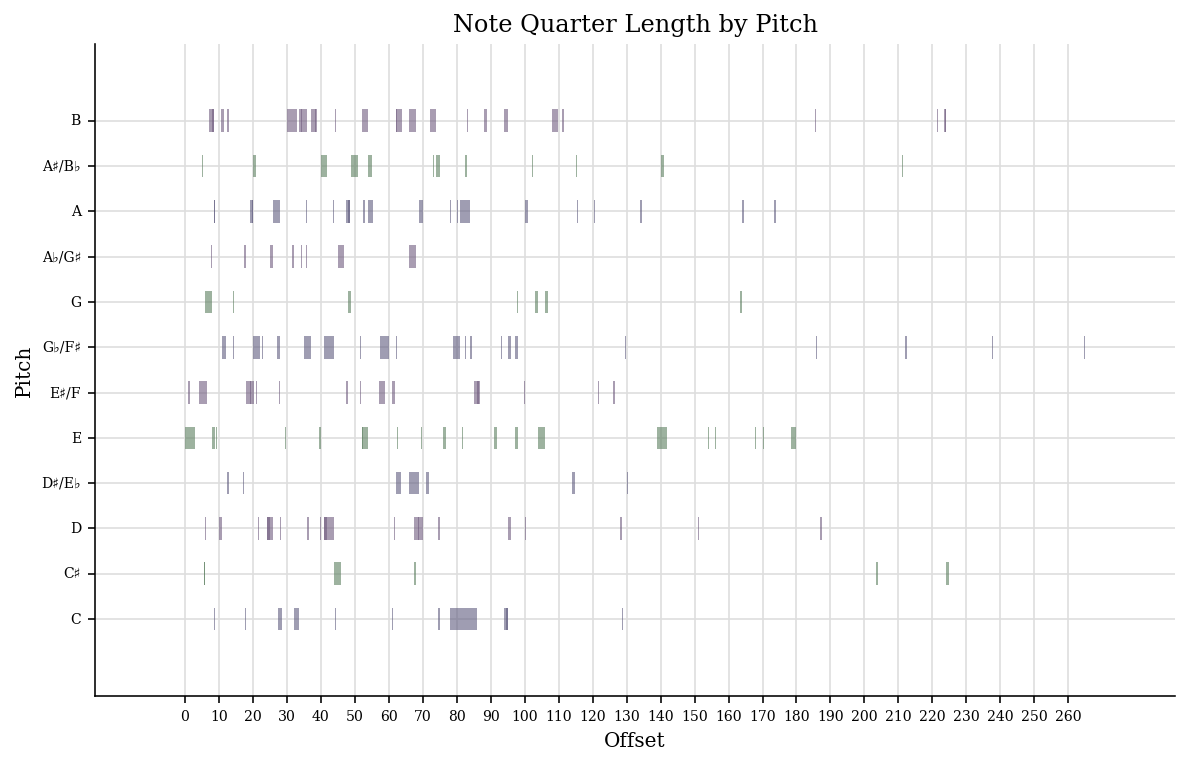

In [178]:
gr = graph.plot.HorizontalBarPitchSpaceOffset(s)
gr.extractData()
gr.run()

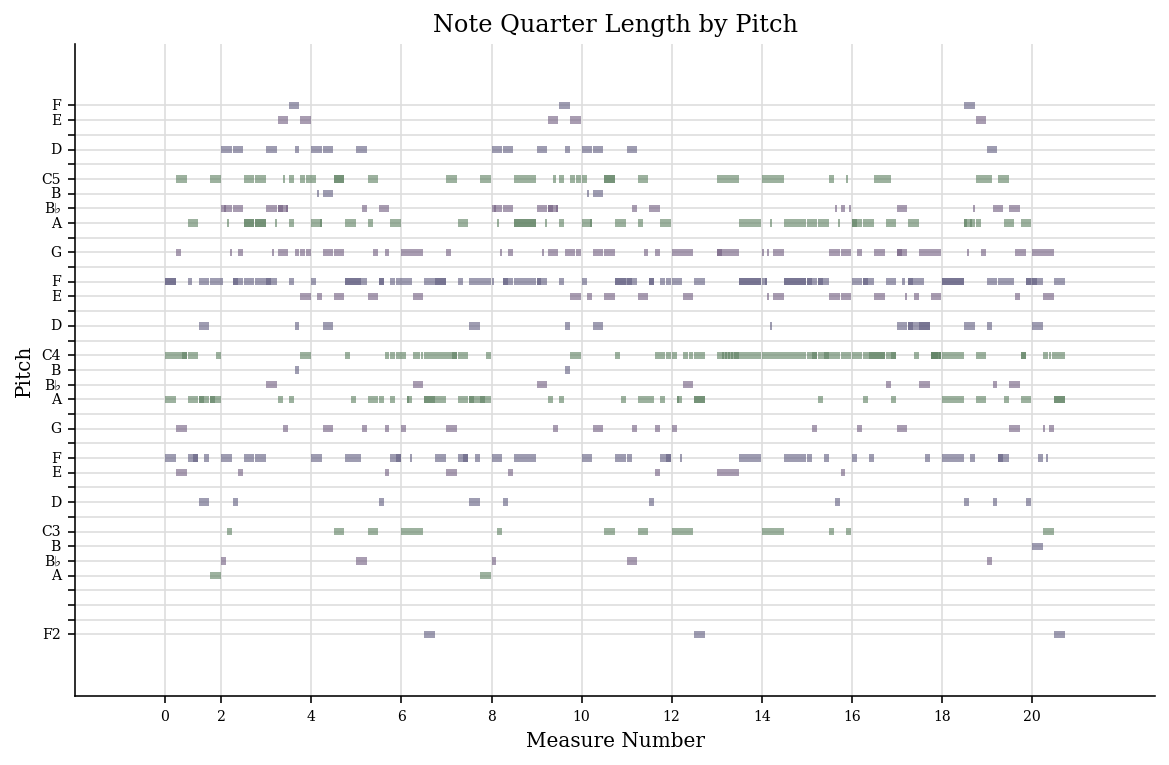

In [179]:
streamObj = corpus.parse(paths[0])
    
gr = graph.plot.HorizontalBarPitchSpaceOffset(streamObj)
gr.extractData()

gr.run()